In [1]:
import pandas as pd
import pymysql
import numpy as np
import requests

In [2]:
def __connect__():
    db_user = 'coin'
    db_password = 'dragonstone#123'
    db_name = 'master_data'
    db_host = 'localhost'
    return pymysql.connect(
        unix_socket=None,
        host=db_host,
        user=db_user,
        password=db_password,
        db=db_name,
        charset='latin1',
        cursorclass=pymysql.cursors.DictCursor)


def get_cursor(connection):
    if connection is None:
        connection = __connect__()
    connection.ping(reconnect=True)
    return connection.cursor()

### Today's Top Defi Coins (marcketCap) under 1100

In [3]:
# Configs

# CoinMarketCap.com API Key
api_key = "a86e3326-8c8d-434e-897a-5d6becbf1f35"
top_symbols_count = 1100
read_data_from_file = True

def fetch_top_n_market_cap_symbols_(n):
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    payload = {
        'convert':'USD',
        'aux':'cmc_rank',
        'limit':n,
        'tag':'defi'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key
    }
#     print(requests.get(url, params=payload, headers=headers).json())
    data = requests.get(url, params=payload, headers=headers).json()['data']
    return data

def parse_data(rows):
    parsed_data = []
    for data in rows:
        if data['cmc_rank'] < top_symbols_count:
            parsed_data.append([data['name'], data['symbol'],data['cmc_rank'], data['quote']['USD']['market_cap']])
    return parsed_data

data = fetch_top_n_market_cap_symbols_(top_symbols_count)
d = parse_data(data)
sybmol_rank_df = pd.DataFrame(d, columns = ['name','symbol', 'rank', 'market_cap'])
top_symbols = sybmol_rank_df['symbol'].values.tolist()

In [4]:
print(top_symbols)

['UNI', 'LINK', 'WBTC', 'LUNA', 'AAVE', 'CAKE', 'MKR', 'DAI', 'AVAX', 'RUNE', 'COMP', 'FEI', 'SNX', 'GRT', 'YFI', 'SUSHI', 'UMA', 'DFI', 'ZRX', 'BNT', 'RSR', 'FTM', 'REN', 'CRV', '1INCH', 'XVS', 'RENBTC', 'LRC', 'NXM', 'MDX', 'KNC', 'MIR', 'OCEAN', 'OGN', 'REEF', 'BAL', 'ALPHA', 'REP', 'KSP', 'DODO', 'RAY', 'AXS', 'TRIBE', 'BAND', 'NMR', 'SRM', 'SWAP', 'BTS', 'SXP', 'LINA', 'KAVA', 'GNO', 'XHV', 'INJ', 'USDN', 'KEEP', 'ORN', 'UQC', 'WAN', 'BADGER', 'BAKE', 'JST', 'AMPL', 'SCRT', 'VAI', 'COTI', 'BUNNY', 'RPL', 'MLN', 'RLC', 'POLS', 'EPS', 'RGT', 'SUSD', 'NRV', 'DIA', 'DAO', 'SFI', 'LON', 'RAMP', 'PERP', 'DDX', 'FRAX', 'BZRX', 'REQ', 'FARM', 'AKRO', 'FLM', 'OXEN', 'VSP', 'BEL', 'BIFI', 'BEAM', 'TRB', 'SURE', 'API3', 'STAKE', 'CHR', 'STRK', 'YFII', 'SWTH', 'STPT', 'FRM', 'HARD', 'DEGO', 'BOND', 'OM', 'SUKU', 'NEST', 'UNFI', 'AUCTION', 'BELT', 'FRONT', 'SWINGBY', 'FSN', 'IDEX', 'PHB', 'HEGIC', 'FIDA', 'BOR', 'CORE', 'CREAM', 'ESD', 'XPR', 'CVP', 'DEXE', 'WING', 'ERC20', 'NFTX', 'OCTO', 'CF

In [5]:
len(top_symbols)

213

In [6]:
df = pd.read_sql_query("select * from g_master_data_joins4 order by date", __connect__())

In [7]:
original_df = df.copy()
df = original_df.copy()

In [8]:
df.shape

(149538, 28)

### filtering only defi tagged coins

In [9]:
df = df[df['Symbol'].isin(top_symbols)]
df = df.reset_index()
del df['index']

In [10]:
df.shape

(25820, 28)

In [11]:
df[df['Symbol'] == 'AAVE'][['Users life-to-date duneanlytics','date']]

,Users life-to-date duneanlytics,date
0,32549.0,2020-12-21
241,32624.0,2020-12-22
296,32697.0,2020-12-23
542,32781.0,2020-12-24
600,32907.0,2020-12-25
...,...,...
24654,NaN,2021-04-18
25032,NaN,2021-04-19
25121,NaN,2021-04-20
25498,NaN,2021-04-21


### FFill : Dune Analytics Users Count

In [12]:

df.index = pd.DatetimeIndex(df['date'])

In [13]:
df['Users life-to-date duneanlytics'] = df.groupby(['Symbol','Name'])['Users life-to-date duneanlytics'].ffill()


In [14]:
df[df['Symbol'] == 'AAVE'][['Users life-to-date duneanlytics','date']]

,Users life-to-date duneanlytics,date
date,,
2020-12-21,32549.0,2020-12-21
2020-12-22,32624.0,2020-12-22
2020-12-23,32697.0,2020-12-23
2020-12-24,32781.0,2020-12-24
2020-12-25,32907.0,2020-12-25
...,...,...
2021-04-18,47936.0,2021-04-18
2021-04-19,47936.0,2021-04-19
2021-04-20,47936.0,2021-04-20


In [15]:
df = df.reset_index(drop=True)

In [16]:
df

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,Transaction GMV,Interest GMV,Price/Sale,Users 24hr Debank,Transactions Count Debank,Trading Volume Debank,Borrowing Volume Debank,Users life-to-date duneanlytics,CoinUrl,Tags
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,1.190984e+06,3.366851e+08,72.158217,NaN,NaN,NaN,NaN,32549.0,https://aave.com,"defi,dao,yield-farming,three-arrows-capital-po..."
1,2020-12-21,4056.0,Ampleforth,AMPL,0.820038,1.885767e+08,1.046414e+07,2.299609e+08,NaN,4.102788e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://ampleforth.org,"defi,rebase,arrington-xrp-capital,alameda-rese..."
2,2020-12-21,5892.0,Anyswap,ANY,0.198054,2.757083e+06,1.703378e+06,1.392088e+07,1.000000e+08,1.000000e+08,...,NaN,NaN,NaN,12.0,22.0,12187.952376,NaN,NaN,https://anyswap.exchange,"decentralized-exchange,defi,amm,binance-smart-..."
3,2020-12-21,7737.0,API3,API3,2.566508,3.553985e+07,2.176232e+07,1.384755e+07,1.000000e+08,1.000000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://api3.org,"oracles,coinfund-portfolio,dcg-portfolio,place..."
4,2020-12-21,7227.0,APY.Finance,APY,0.232858,2.661404e+06,2.651785e+05,1.142932e+07,NaN,1.000000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://apy.finance,"defi,yield-farming,yield-aggregator,alameda-re..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25815,2021-04-22,2606.0,Wanchain,WAN,1.486540,2.512677e+08,1.219949e+07,1.690286e+08,2.100000e+08,1.921286e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://wanchain.org,"marketplace,enterprise-solutions,defi,interope..."
25816,2021-04-22,3717.0,Wrapped Bitcoin,WBTC,51667.877282,8.051756e+09,3.336119e+08,1.558368e+05,NaN,1.558368e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://wbtc.network,"medium-of-exchange,defi,stablecoin,stablecoin-..."
25817,2021-04-22,2662.0,Haven Protocol,XHV,20.341945,2.862115e+08,2.900247e+06,1.407002e+07,NaN,1.407002e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://havenprotocol.org,"defi,privacy"
25818,2021-04-22,2363.0,Zap,ZAP,0.144719,3.417467e+07,1.381271e+06,2.361445e+08,NaN,5.200000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://zap.org,"defi,oracles"


### adding tags as columns in DF

In [17]:
required_tags = ['binance-smart-chain','polkadot-ecosystem','ethereum','cosmos-ecosystem','polkadot','solana-ecosystem','binance-chain','avalanche-ecosystem','heco','layer-2','eos','sidechain','cosmos','tron','defi','yield-farming','decentralized-exchange','governance','dao','gaming','stablecoin','asset-management','centralized-exchange','staking','yield-aggregator','oracles','lending-borowing','dex','options','launchpad','stablecoin-algorithmically-stabilized']
required_tags.sort()
tag_df = pd.DataFrame(df['Tags'].copy())

required_tags_map = {}
i = 0
for tag in required_tags:
    required_tags_map[tag] = i
    i = i + 1

all_symbol_tags = []
for index, row in tag_df.iterrows():
    tag = [''] * (len(required_tags))
    tags = row['Tags']
    tags = tags.split(',') if tags else []
    for t in tags:
        index = required_tags_map[t] if t in required_tags_map else -1
        if index > -1:
            tag[index] = 1
    all_symbol_tags.append(tag)

tag_columns = []
tag_columns.extend(required_tags)

tag_column_df = pd.DataFrame(all_symbol_tags, columns = tag_columns)
df = df.join(tag_column_df)
del df['Tags']
del df['CoinUrl']
df

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,polkadot,polkadot-ecosystem,sidechain,solana-ecosystem,stablecoin,stablecoin-algorithmically-stabilized,staking,tron,yield-aggregator,yield-farming
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,,,,,,,,,,1
1,2020-12-21,4056.0,Ampleforth,AMPL,0.820038,1.885767e+08,1.046414e+07,2.299609e+08,NaN,4.102788e+08,...,,,,,,,,,,
2,2020-12-21,5892.0,Anyswap,ANY,0.198054,2.757083e+06,1.703378e+06,1.392088e+07,1.000000e+08,1.000000e+08,...,,,,,,,,,,
3,2020-12-21,7737.0,API3,API3,2.566508,3.553985e+07,2.176232e+07,1.384755e+07,1.000000e+08,1.000000e+08,...,,,,,,,,,,
4,2020-12-21,7227.0,APY.Finance,APY,0.232858,2.661404e+06,2.651785e+05,1.142932e+07,NaN,1.000000e+08,...,,,,,,,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25815,2021-04-22,2606.0,Wanchain,WAN,1.486540,2.512677e+08,1.219949e+07,1.690286e+08,2.100000e+08,1.921286e+08,...,,,,,,,,,,
25816,2021-04-22,3717.0,Wrapped Bitcoin,WBTC,51667.877282,8.051756e+09,3.336119e+08,1.558368e+05,NaN,1.558368e+05,...,,,,,1,,,,,
25817,2021-04-22,2662.0,Haven Protocol,XHV,20.341945,2.862115e+08,2.900247e+06,1.407002e+07,NaN,1.407002e+07,...,,,,,,,,,,
25818,2021-04-22,2363.0,Zap,ZAP,0.144719,3.417467e+07,1.381271e+06,2.361445e+08,NaN,5.200000e+08,...,,,,,,,,,,


### only coins tagged to defi

In [18]:
df = df[(df['defi'] == 1)]
df['defi'].unique()

array([1], dtype=object)

In [19]:
len(df['Symbol'].unique())

168

In [20]:
df['Symbol'].unique()

array(['AAVE', 'AMPL', 'ANY', 'APY', 'BAND', 'BEPRO', 'BONDLY', 'BZRX',
       'CHR', 'COMP', 'CREAM', 'CRV', 'CUSD', 'CVP', 'DF', 'DODO', 'FOR',
       'IDEX', 'KAVA', 'KP3R', 'LTX', 'MARK', 'MIR', 'MTA', 'OGN', 'PEAK',
       'PERP', 'RAMP', 'RENBTC', 'SCRT', 'SHROOM', 'SOCKS', 'STAKE',
       'SWINGBY', 'TRB', 'TRU', 'UMA', 'VAI', 'WING', 'XPR', 'XVS',
       'YF-DAI', 'YFI', 'YFII', 'ZEE', 'ORN', 'POLS', 'RGT', 'RSR',
       'RUNE', 'SFI', 'SRM', 'STPT', 'SUKU', 'SURE', 'SUSHI', 'SUTER',
       'SXP', 'UNFI', 'UNI', 'USDN', 'AKRO', 'ALPHA', 'AVAX', 'BADGER',
       'BAKE', 'BAL', 'BEL', 'BOR', 'CAKE', 'CORE', 'COTI', 'DAI', 'DEC',
       'DEGO', 'DEXE', 'DFI', 'DHT', 'DIA', 'EASY', 'FARM', 'FIS', 'FLM',
       'FRM', 'FRONT', 'HEGIC', 'INJ', 'JST', 'KEEP', 'LUNA', 'MUSD',
       'NEX', 'NXM', 'OCEAN', 'OM', 'AST', 'BEAM', 'BNT', 'BTS', 'FSN',
       'FTM', 'GNO', 'KNC', 'LINK', 'LRC', 'MET', 'MKR', 'MLN', 'NMR',
       'PHB', 'REN', 'REP', 'REQ', 'RLC', 'SNX', 'SUSD', 'SWTH', 'UQC'

In [21]:
df.reset_index(inplace=True, drop=True)

In [22]:
original_df.columns

Index(['date', 'Id', 'Name', 'Symbol', 'Price', 'Marketcap CMC', 'Volume CMC',
       'Circulating supply CMC', 'MAX Supply CMC', 'Total Supply CMC',
       'TVL Debank', 'TVL Defipulse', 'Transaction Revenue',
       'Interest Revenue', 'Transaction Revenue Supply Side',
       'Interest Revenue Supply Side', 'Transaction Revenue Protocol',
       'Interest Revenue Protocol', 'Transaction GMV', 'Interest GMV',
       'Price/Sale', 'Users 24hr Debank', 'Transactions Count Debank',
       'Trading Volume Debank', 'Borrowing Volume Debank',
       'Users life-to-date duneanlytics', 'CoinUrl', 'Tags'],
      dtype='object')

In [23]:
df['TVL_max'] = df[['TVL Debank', 'TVL Defipulse']].max(axis=1)

<ipython-input-23-615ad563b3ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TVL_max'] = df[['TVL Debank', 'TVL Defipulse']].max(axis=1)


In [24]:
df['GMV'] = (df['Transaction GMV'].fillna(0) + df['Interest GMV'].fillna(0)).replace({'0':np.nan, 0:np.nan})
df['Defi Volume DeBank'] = (df['Trading Volume Debank'].fillna(0) + df['Borrowing Volume Debank'].fillna(0)).replace({'0':np.nan, 0:np.nan})

<ipython-input-24-c6d5e2bb4a4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GMV'] = (df['Transaction GMV'].fillna(0) + df['Interest GMV'].fillna(0)).replace({'0':np.nan, 0:np.nan})
<ipython-input-24-c6d5e2bb4a4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Defi Volume DeBank'] = (df['Trading Volume Debank'].fillna(0) + df['Borrowing Volume Debank'].fillna(0)).replace({'0':np.nan, 0:np.nan})


In [25]:
# add defi volume max as max of gmv from tokenterminal and defi volume debank
df['Defi Volume_max'] = df[['GMV', 'Defi Volume DeBank']].max(axis=1)

<ipython-input-25-fb777fdab8ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Defi Volume_max'] = df[['GMV', 'Defi Volume DeBank']].max(axis=1)


In [26]:
df[['GMV','date']].reset_index()

,index,GMV,date
0,0,3.378761e+08,2020-12-21
1,1,NaN,2020-12-21
2,2,NaN,2020-12-21
3,3,NaN,2020-12-21
4,4,NaN,2020-12-21
...,...,...,...
18934,18934,NaN,2021-04-22
18935,18935,NaN,2021-04-22
18936,18936,NaN,2021-04-22
18937,18937,NaN,2021-04-22


In [27]:
len(df['GMV'].unique())

2851

In [28]:
df

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,stablecoin,stablecoin-algorithmically-stabilized,staking,tron,yield-aggregator,yield-farming,TVL_max,GMV,Defi Volume DeBank,Defi Volume_max
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,,,,,,1,1.794887e+09,3.378761e+08,NaN,3.378761e+08
1,2020-12-21,4056.0,Ampleforth,AMPL,0.820038,1.885767e+08,1.046414e+07,2.299609e+08,NaN,4.102788e+08,...,,,,,,,NaN,NaN,NaN,NaN
2,2020-12-21,5892.0,Anyswap,ANY,0.198054,2.757083e+06,1.703378e+06,1.392088e+07,1.000000e+08,1.000000e+08,...,,,,,,,4.999804e+05,NaN,12187.952376,1.218795e+04
3,2020-12-21,7227.0,APY.Finance,APY,0.232858,2.661404e+06,2.651785e+05,1.142932e+07,NaN,1.000000e+08,...,,,,,1,1,9.500688e+06,NaN,NaN,NaN
4,2020-12-21,4679.0,Band Protocol,BAND,6.201058,1.270847e+08,7.327053e+07,2.049403e+07,NaN,1.000000e+08,...,,,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,2021-04-22,2606.0,Wanchain,WAN,1.486540,2.512677e+08,1.219949e+07,1.690286e+08,2.100000e+08,1.921286e+08,...,,,,,,,NaN,NaN,NaN,NaN
18935,2021-04-22,3717.0,Wrapped Bitcoin,WBTC,51667.877282,8.051756e+09,3.336119e+08,1.558368e+05,NaN,1.558368e+05,...,1,,,,,,NaN,NaN,NaN,NaN
18936,2021-04-22,2662.0,Haven Protocol,XHV,20.341945,2.862115e+08,2.900247e+06,1.407002e+07,NaN,1.407002e+07,...,,,,,,,NaN,NaN,NaN,NaN
18937,2021-04-22,2363.0,Zap,ZAP,0.144719,3.417467e+07,1.381271e+06,2.361445e+08,NaN,5.200000e+08,...,,,,,,,NaN,NaN,NaN,NaN


In [29]:
# add defi volume max as max of gmv from tokenterminal and defi volume debank
df['Defi Volume_max'] = df[['GMV', 'Defi Volume DeBank']].max(axis=1)

<ipython-input-29-fb777fdab8ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Defi Volume_max'] = df[['GMV', 'Defi Volume DeBank']].max(axis=1)


In [30]:
df['Defi Volume DeBank']

0                 NaN
1                 NaN
2        12187.952376
3                 NaN
4                 NaN
             ...     
18934             NaN
18935             NaN
18936             NaN
18937             NaN
18938             NaN
Name: Defi Volume DeBank, Length: 18939, dtype: float64

In [31]:
df['max_test'] = df[['MAX Supply CMC', 'Total Supply CMC']].max(axis=1)
df['fully_diluted_mkt_cap'] = df.max_test * df.Price

del df['max_test']

<ipython-input-31-28ed4bdc6395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_test'] = df[['MAX Supply CMC', 'Total Supply CMC']].max(axis=1)
<ipython-input-31-28ed4bdc6395>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fully_diluted_mkt_cap'] = df.max_test * df.Price


In [32]:
df["total_revenue"] = (df["Transaction Revenue"].fillna(0) + df["Interest Revenue"].fillna(0)).replace({'0':np.nan, 0:np.nan})
df["total_supply_revenue"] = (df["Transaction Revenue Supply Side"].fillna(0) + df["Interest Revenue Supply Side"].fillna(0)).replace({'0':np.nan, 0:np.nan})
df["total_protocol_revenue"] = (df["Interest Revenue Protocol"].fillna(0) + df["Transaction Revenue Protocol"].fillna(0)).replace({'0':np.nan, 0:np.nan})


<ipython-input-32-c3f5021f3958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_revenue"] = (df["Transaction Revenue"].fillna(0) + df["Interest Revenue"].fillna(0)).replace({'0':np.nan, 0:np.nan})
<ipython-input-32-c3f5021f3958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_supply_revenue"] = (df["Transaction Revenue Supply Side"].fillna(0) + df["Interest Revenue Supply Side"].fillna(0)).replace({'0':np.nan, 0:np.nan})
<ipython-input-32-c3f5021f3958>:3: SettingWithCopyWarning: 
A val

In [33]:
df[["total_revenue", "total_supply_revenue", "total_protocol_revenue"]]

,total_revenue,total_supply_revenue,total_protocol_revenue
0,51058.960937,50173.411248,885.549689
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
18934,NaN,NaN,NaN
18935,NaN,NaN,NaN
18936,NaN,NaN,NaN
18937,NaN,NaN,NaN


In [34]:
df[df['Name'] == 'Compound'][['Transaction Revenue', 'Interest Revenue', 'total_revenue']]

,Transaction Revenue,Interest Revenue,total_revenue
9,NaN,3.290080e+05,3.290080e+05
210,NaN,2.997162e+05,2.997162e+05
255,NaN,3.206756e+05,3.206756e+05
457,NaN,3.234628e+05,3.234628e+05
503,NaN,3.759938e+05,3.759938e+05
...,...,...,...
18114,NaN,1.680673e+06,1.680673e+06
18392,NaN,1.090810e+06,1.090810e+06
18448,NaN,8.109776e+05,8.109776e+05
18726,NaN,8.371591e+05,8.371591e+05


In [35]:
df = df.sort_values('date')

In [36]:
cmc_symbol_name_df = pd.read_sql_query("select distinct Symbol, Name from g_master_data_joins4 order by Symbol, Name", __connect__())

In [37]:
cmc_symbol_name_df = df[['Symbol', 'Name']].drop_duplicates().reset_index(drop=True)

In [38]:
cmc_symbol_name_df

,Symbol,Name
0,AAVE,Aave
1,MUSD,mStable USD
2,LUNA,Terra
3,KEEP,Keep Network
4,JST,JUST
...,...,...
163,DOWS,Shadows
164,XEND,Xend Finance
165,STRK,Strike
166,FEI,Fei Protocol


In [39]:
# cmc_symbol_name_df = cmc_symbol_name_df[cmc_symbol_name_df['Symbol'].isin(top_symbols)]

In [40]:
# add n day users
def calculate_nDay_users(df, days):
    column_name = f"total_users_{days}d"
    df[column_name] = 0
    for index, row in cmc_symbol_name_df.iterrows():
        symbol = row['Symbol']
        name = row['Name']
        temp_df = df[(df['Symbol'] == symbol) & (df['Name'] == name)].copy()
        temp_df['parent_index'] = temp_df.index
        temp_df.index = pd.DatetimeIndex(temp_df['date'])
        temp_df[column_name] = temp_df['Users 24hr Debank'].rolling(f"{days}d").sum()
        temp_df.index = temp_df["parent_index"]
        del temp_df['parent_index']
        for index, row in temp_df.iterrows():
            df.loc[index, column_name] = row[column_name]

In [41]:
def calculate_nDay_revenue(df, days):
    column_name = f"total_revenue_{days}d"
    df[column_name] = 0
    for index, row in cmc_symbol_name_df.iterrows():
        symbol = row['Symbol']
        name = row['Name']
        temp_df = df[(df['Symbol'] == symbol) & (df['Name'] == name)].copy()
        temp_df['parent_index'] = temp_df.index
        temp_df.index = pd.DatetimeIndex(temp_df['date'])
        temp_df[column_name] = temp_df['total_revenue'].rolling(f"{days}d").sum()
        temp_df.index = temp_df["parent_index"]
        del temp_df['parent_index']
        for index, row in temp_df.iterrows():
            df.loc[index, column_name] = row[column_name]
    

In [42]:
# function for defi volume sums
# substitute for volume cmc sum
# changing defi volume debank to Defi Volume_max
def calculate_nDay_defi_volume(df, days):
    column_name = f"total_defi_volume_{days}d"
    df[column_name] = 0
    for index, row in cmc_symbol_name_df.iterrows():
        symbol = row['Symbol']
        name = row['Name']
        temp_df = df[(df['Symbol'] == symbol) & (df['Name'] == name)].copy()
        temp_df['parent_index'] = temp_df.index
        temp_df.index = pd.DatetimeIndex(temp_df['date'])
        temp_df[column_name] = temp_df['Defi Volume_max'].rolling(f"{days}d").sum()
        temp_df.index = temp_df["parent_index"]
        del temp_df['parent_index']
        for index, row in temp_df.iterrows():
            df.loc[index, column_name] = row[column_name]
            

In [43]:
def calculate_nDay_change(df, days, column, column_name):
    df[column_name] = 0
    for index, row in cmc_symbol_name_df.iterrows():
        symbol = row['Symbol']
        name = row['Name']
        temp_df = df[(df['Symbol'] == symbol) & (df['Name'] == name)].copy()
        temp_df['parent_index'] = temp_df.index
        temp_df.index = pd.DatetimeIndex(temp_df['date'])
        temp_df[column_name] = temp_df[column].pct_change(days)
        temp_df.index = temp_df["parent_index"]
        del temp_df['parent_index']
        for index, row in temp_df.iterrows():
            df.loc[index, column_name] = row[column_name]
    
def calculate_nDay_std(df, days, column, column_name, div_by_column='Price'):
    df[column_name] = 0
    for index, row in cmc_symbol_name_df.iterrows():
        symbol = row['Symbol']
        name = row['Name']
        temp_df = df[(df['Symbol'] == symbol) & (df['Name'] == name)].copy()
        temp_df['parent_index'] = temp_df.index
        temp_df.index = pd.DatetimeIndex(temp_df['date'])
        temp_df[column_name] = temp_df[column].rolling(days).std() / temp_df[div_by_column]
        temp_df.index = temp_df["parent_index"]
        del temp_df['parent_index']
        for index, row in temp_df.iterrows():
            df.loc[index, column_name] = row[column_name]
    

In [44]:
calculate_nDay_revenue(df, 7)
calculate_nDay_revenue(df, 30)
#calculate_nDay_trading_volume(df, 30)
calculate_nDay_defi_volume(df, 30)

# add n day users
calculate_nDay_users(df, 30)

# add 1, 3, 7, 30 day defi volume pct change here
# added column calculations
#
calculate_nDay_change(df, 1, 'Defi Volume_max', 'Defi_volume_pct_chg_1d')
calculate_nDay_change(df, 3, 'Defi Volume_max', 'Defi_volume_pct_chg_3d')
calculate_nDay_change(df, 7, 'Defi Volume_max', 'Defi_volume_pct_chg_7d')
calculate_nDay_change(df, 30, 'Defi Volume_max', 'Defi_volume_pct_chg_30d')
#

In [45]:
df[df['Symbol'] == 'AAVE']['total_revenue_7d']

0        5.105896e+04
201      1.039415e+05
246      1.514182e+05
448      2.232560e+05
494      2.762748e+05
             ...     
18104    3.790275e+06
18382    3.719049e+06
18438    3.226605e+06
18716    2.766872e+06
18772    2.232212e+06
Name: total_revenue_7d, Length: 123, dtype: float64

In [46]:
df[df['Symbol'] == 'AAVE']['total_defi_volume_30d']

0        3.378761e+08
201      6.595928e+08
246      9.596765e+08
448      1.247095e+09
494      1.599726e+09
             ...     
18104    4.455083e+10
18382    4.473675e+10
18438    4.339909e+10
18716    4.204313e+10
18772    4.067763e+10
Name: total_defi_volume_30d, Length: 123, dtype: float64

In [47]:
df

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,total_supply_revenue,total_protocol_revenue,total_revenue_7d,total_revenue_30d,total_defi_volume_30d,total_users_30d,Defi_volume_pct_chg_1d,Defi_volume_pct_chg_3d,Defi_volume_pct_chg_7d,Defi_volume_pct_chg_30d
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,50173.411248,885.549689,51058.960937,5.105896e+04,3.378761e+08,NaN,NaN,NaN,NaN,NaN
90,2020-12-21,5747.0,mStable USD,MUSD,0.994678,2.666081e+07,5.591558e+05,2.680346e+07,NaN,2.680346e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2020-12-21,4172.0,Terra,LUNA,0.469171,1.799324e+08,2.403393e+07,3.835109e+08,NaN,9.951619e+08,...,27818.850023,NaN,27818.850023,2.781885e+04,3.765190e+06,NaN,NaN,NaN,NaN,NaN
88,2020-12-21,5566.0,Keep Network,KEEP,0.216681,9.678125e+07,1.328025e+06,4.466534e+08,1.000000e+09,9.998488e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-12-21,5488.0,JUST,JST,0.025701,5.809300e+07,6.149887e+07,2.260327e+09,9.900000e+09,9.900000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2021-04-22,9025.0,Tribe,TRIBE,1.342780,3.334987e+08,1.784841e+07,2.483644e+08,1.000000e+09,1.000000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18830,2021-04-22,8104.0,1inch,1INCH,4.600837,7.208205e+08,1.915656e+08,1.566716e+08,NaN,1.500000e+09,...,NaN,NaN,505778.404285,2.652129e+06,4.386403e+08,NaN,0.0,0.363191,0.208633,1.538019
18831,2021-04-22,4134.0,Akropolis,AKRO,0.043682,1.216256e+08,3.517399e+07,2.784328e+09,NaN,4.000000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18823,2021-04-22,6938.0,YFDAI.FINANCE,YF-DAI,3718.987322,1.482388e+07,4.575519e+06,3.986000e+03,2.100000e+04,2.100000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.columns

Index(['date', 'Id', 'Name', 'Symbol', 'Price', 'Marketcap CMC', 'Volume CMC',
       'Circulating supply CMC', 'MAX Supply CMC', 'Total Supply CMC',
       'TVL Debank', 'TVL Defipulse', 'Transaction Revenue',
       'Interest Revenue', 'Transaction Revenue Supply Side',
       'Interest Revenue Supply Side', 'Transaction Revenue Protocol',
       'Interest Revenue Protocol', 'Transaction GMV', 'Interest GMV',
       'Price/Sale', 'Users 24hr Debank', 'Transactions Count Debank',
       'Trading Volume Debank', 'Borrowing Volume Debank',
       'Users life-to-date duneanlytics', 'asset-management',
       'avalanche-ecosystem', 'binance-chain', 'binance-smart-chain',
       'centralized-exchange', 'cosmos', 'cosmos-ecosystem', 'dao',
       'decentralized-exchange', 'defi', 'dex', 'eos', 'ethereum', 'gaming',
       'governance', 'heco', 'launchpad', 'layer-2', 'lending-borowing',
       'options', 'oracles', 'polkadot', 'polkadot-ecosystem', 'sidechain',
       'solana-ecosystem', 's

In [49]:
# flip such that mc in numerator 
#df['VOL : MC'] = df['Volume CMC'] / df['Marketcap CMC']
df['MC : VOL'] = df['Marketcap CMC'] / df['Volume CMC'] 
# added column calculations
calculate_nDay_change(df, 1, 'MC : VOL', 'MC_VOL_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : VOL', 'MC_VOL_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : VOL', 'MC_VOL_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : VOL', 'MC_VOL_pct_chg_30d')
#

# flip such that mc in numerator
#df['VOL : DMC'] = df['Volume CMC'] / df['fully_diluted_mkt_cap']
df['DMC : VOL'] = df['fully_diluted_mkt_cap'] / df['Volume CMC']
# added column calculations
calculate_nDay_change(df, 1, 'DMC : VOL', 'DMC_VOL_pct_chg_1d')
calculate_nDay_change(df, 3, 'DMC : VOL', 'DMC_VOL_pct_chg_3d')
calculate_nDay_change(df, 7, 'DMC : VOL', 'DMC_VOL_pct_chg_7d')
calculate_nDay_change(df, 30, 'DMC : VOL', 'DMC_VOL_pct_chg_30d')
#



df['MC : TVL'] = df['Marketcap CMC'] / df['TVL_max']
# added column calculations
calculate_nDay_change(df, 1, 'MC : TVL', 'MC_TVL_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : TVL', 'MC_TVL_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : TVL', 'MC_TVL_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : TVL', 'MC_TVL_pct_chg_30d')
#


df['DMC : TVL'] = df['fully_diluted_mkt_cap'] / df['TVL_max']
# added column calculations
calculate_nDay_change(df, 1, 'DMC : TVL', 'DMC_TVL_pct_chg_1d')
calculate_nDay_change(df, 3, 'DMC : TVL', 'DMC_TVL_pct_chg_3d')
calculate_nDay_change(df, 7, 'DMC : TVL', 'DMC_TVL_pct_chg_7d')
calculate_nDay_change(df, 30, 'DMC : TVL', 'DMC_TVL_pct_chg_30d')
#


df['MC : users (1d)'] = df['Marketcap CMC'] / df['Users 24hr Debank']
# added column calculations
calculate_nDay_change(df, 1, 'MC : users (1d)', 'MC_users_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : users (1d)', 'MC_users_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : users (1d)', 'MC_users_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : users (1d)', 'MC_users_pct_chg_30d')
#




df['DMC : users (1d)'] = df['fully_diluted_mkt_cap'] / df['Users 24hr Debank']
# added column calculations
calculate_nDay_change(df, 1, 'DMC : users (1d)', 'DMC_users_pct_chg_1d')
calculate_nDay_change(df, 3, 'DMC : users (1d)', 'DMC_users_pct_chg_3d')
calculate_nDay_change(df, 7, 'DMC : users (1d)', 'DMC_users_pct_chg_7d')
calculate_nDay_change(df, 30, 'DMC : users (1d)', 'DMC_users_pct_chg_30d')
#



df['MC : transactions (1d)'] = df['Marketcap CMC'] / df['Transactions Count Debank']
# added column calculations
calculate_nDay_change(df, 1, 'MC : transactions (1d)', 'MC_transactions_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : transactions (1d)', 'MC_transactions_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : transactions (1d)', 'MC_transactions_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : transactions (1d)', 'MC_transactions_pct_chg_30d')
#

df['DMC : transactions (1d)'] = df['fully_diluted_mkt_cap'] / df['Transactions Count Debank']
# added column calculations
calculate_nDay_change(df, 1, 'DMC : transactions (1d)', 'DMC_transactions_pct_chg_1d')
calculate_nDay_change(df, 3, 'DMC : transactions (1d)', 'DMC_transactions_pct_chg_3d')
calculate_nDay_change(df, 7, 'DMC : transactions (1d)', 'DMC_transactions_pct_chg_7d')
calculate_nDay_change(df, 30, 'DMC : transactions (1d)', 'DMC_transactions_pct_chg_30d')
#

#df['MC : DEX Vol (1d)'] = df['Marketcap CMC'] / df['Trading Volume Debank']
# add
df['MC : Defi Vol (1d)'] = df['Marketcap CMC'] / df['Defi Volume_max']
# added column calculations
calculate_nDay_change(df, 1, 'MC : Defi Vol (1d)', 'MC_defi_volume_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : Defi Vol (1d)', 'MC_defi_volume_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : Defi Vol (1d)', 'MC_defi_volume_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : Defi Vol (1d)', 'MC_defi_volume_pct_chg_30d')
#


df['MC : Defi Vol (30d)'] = df['Marketcap CMC'] / df['total_defi_volume_30d']
#df['DMC : DEX Vol (1d)'] = df['fully_diluted_mkt_cap'] / df['Trading Volume Debank']
#df['DMC : DEX Vol (30d)'] = df['fully_diluted_mkt_cap'] / df['total_volume_30d']



df['MC : revenue'] = df['Marketcap CMC'] / df['total_revenue']
# added column calculations
calculate_nDay_change(df, 1, 'MC : revenue', 'MC_revenue_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : revenue', 'MC_revenue_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : revenue', 'MC_revenue_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : revenue', 'MC_revenue_pct_chg_30d')
#

df['DMC : revenue'] = df['fully_diluted_mkt_cap'] / df['total_revenue']
# added column calculations
calculate_nDay_change(df, 1, 'DMC : revenue', 'DMC_revenue_pct_chg_1d')
calculate_nDay_change(df, 3, 'DMC : revenue', 'DMC_revenue_pct_chg_3d')
calculate_nDay_change(df, 7, 'DMC : revenue', 'DMC_revenue_pct_chg_7d')
calculate_nDay_change(df, 30, 'DMC : revenue', 'DMC_revenue_pct_chg_30d')
#


df['MC : total_users_30d'] = df['Marketcap CMC'] / df['total_users_30d']
# added column calculations
calculate_nDay_change(df, 1, 'MC : total_users_30d', 'MC_total_users_30d_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : total_users_30d', 'MC_total_users_30d_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : total_users_30d', 'MC_total_users_30d_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : total_users_30d', 'MC_total_users_30d_pct_chg_30d')
#

df['DMC : total_users_30d'] = df['fully_diluted_mkt_cap'] / df['total_users_30d']
# added column calculations
calculate_nDay_change(df, 1, 'DMC : total_users_30d', 'DMC_total_users_30d_pct_chg_1d')
calculate_nDay_change(df, 3, 'DMC : total_users_30d', 'DMC_total_users_30d_pct_chg_3d')
calculate_nDay_change(df, 7, 'DMC : total_users_30d', 'DMC_total_users_30d_pct_chg_7d')
calculate_nDay_change(df, 30, 'DMC : total_users_30d', 'DMC_total_users_30d_pct_chg_30d')
#

df['MC : Users_life'] = df['Marketcap CMC'] / df['Users life-to-date duneanlytics']
# added column calculations
calculate_nDay_change(df, 1, 'MC : Users_life', 'MC_Users_life_pct_chg_1d')
calculate_nDay_change(df, 3, 'MC : Users_life', 'MC_Users_life_pct_chg_3d')
calculate_nDay_change(df, 7, 'MC : Users_life', 'MC_Users_life_pct_chg_7d')
calculate_nDay_change(df, 30, 'MC : Users_life', 'MC_Users_life_pct_chg_30d')
#
df['DMC : Users_life'] = df['fully_diluted_mkt_cap'] / df['Users life-to-date duneanlytics']
# added column calculations
calculate_nDay_change(df, 1, 'DMC : Users_life', 'DMC_Users_life_pct_chg_1d')
calculate_nDay_change(df, 3, 'DMC : Users_life', 'DMC_Users_life_pct_chg_3d')
calculate_nDay_change(df, 7, 'DMC : Users_life', 'DMC_Users_life_pct_chg_7d')
calculate_nDay_change(df, 30, 'DMC : Users_life', 'DMC_Users_life_pct_chg_30d')
#

In [50]:
df

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,MC : Users_life,MC_Users_life_pct_chg_1d,MC_Users_life_pct_chg_3d,MC_Users_life_pct_chg_7d,MC_Users_life_pct_chg_30d,DMC : Users_life,DMC_Users_life_pct_chg_1d,DMC_Users_life_pct_chg_3d,DMC_Users_life_pct_chg_7d,DMC_Users_life_pct_chg_30d
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,29977.058253,NaN,NaN,NaN,NaN,39970.229339,NaN,NaN,NaN,NaN
90,2020-12-21,5747.0,mStable USD,MUSD,0.994678,2.666081e+07,5.591558e+05,2.680346e+07,NaN,2.680346e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2020-12-21,4172.0,Terra,LUNA,0.469171,1.799324e+08,2.403393e+07,3.835109e+08,NaN,9.951619e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2020-12-21,5566.0,Keep Network,KEEP,0.216681,9.678125e+07,1.328025e+06,4.466534e+08,1.000000e+09,9.998488e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-12-21,5488.0,JUST,JST,0.025701,5.809300e+07,6.149887e+07,2.260327e+09,9.900000e+09,9.900000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2021-04-22,9025.0,Tribe,TRIBE,1.342780,3.334987e+08,1.784841e+07,2.483644e+08,1.000000e+09,1.000000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18830,2021-04-22,8104.0,1inch,1INCH,4.600837,7.208205e+08,1.915656e+08,1.566716e+08,NaN,1.500000e+09,...,4053.174082,-0.085006,-0.053521,-0.244750,0.099067,38805.758244,-0.085006,-0.053521,-0.244750,0.046390
18831,2021-04-22,4134.0,Akropolis,AKRO,0.043682,1.216256e+08,3.517399e+07,2.784328e+09,NaN,4.000000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18823,2021-04-22,6938.0,YFDAI.FINANCE,YF-DAI,3718.987322,1.482388e+07,4.575519e+06,3.986000e+03,2.100000e+04,2.100000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
calculate_nDay_change(df, 1, 'Price', 'Price_pct_chg_1d')
calculate_nDay_change(df, 3, 'Price', 'Price_pct_chg_3d')
calculate_nDay_change(df, 7, 'Price', 'Price_pct_chg_7d')
calculate_nDay_change(df, 30, 'Price', 'Price_pct_chg_30d')
calculate_nDay_std(df, 7, 'Price', 'Price_7day_volatility_pct', div_by_column='Price')
calculate_nDay_std(df, 30, 'Price', 'Price_30day_volatility_pct', div_by_column='Price')
calculate_nDay_std(df, 90, 'Price', 'Price_90day_volatility_pct', div_by_column='Price')

In [52]:
calculate_nDay_change(df, 1, 'Marketcap CMC', 'MC_pct_chg_1d')
calculate_nDay_change(df, 3, 'Marketcap CMC', 'MC_pct_chg_3d')
calculate_nDay_change(df, 7, 'Marketcap CMC', 'MC_pct_chg_7d')
calculate_nDay_change(df, 30, 'Marketcap CMC', 'MC_pct_chg_30d')
calculate_nDay_std(df, 30, 'Marketcap CMC', 'MC_30day_volatility_pct', div_by_column='Marketcap CMC')
calculate_nDay_std(df, 90, 'Marketcap CMC', 'MC_90day_volatility_pct', div_by_column='Marketcap CMC')

In [53]:
calculate_nDay_change(df, 1, 'fully_diluted_mkt_cap', 'DMC_pct_chg_1d')
calculate_nDay_change(df, 3, 'fully_diluted_mkt_cap', 'DMC_pct_chg_3d')
calculate_nDay_change(df, 7, 'fully_diluted_mkt_cap', 'DMC_pct_chg_7d')
calculate_nDay_change(df, 30, 'fully_diluted_mkt_cap', 'DMC_pct_chg_30d')
calculate_nDay_std(df, 30, 'fully_diluted_mkt_cap', 'DMC_30day_volatility_pct', div_by_column='fully_diluted_mkt_cap')
calculate_nDay_std(df, 90, 'fully_diluted_mkt_cap', 'DMC_90day_volatility_pct', div_by_column='fully_diluted_mkt_cap')

In [54]:
calculate_nDay_change(df, 1, 'Circulating supply CMC', 'CS_pct_chg_1d')
calculate_nDay_change(df, 3, 'Circulating supply CMC', 'CS_pct_chg_d')
calculate_nDay_change(df, 7, 'Circulating supply CMC', 'CS_pct_chg_7d')
calculate_nDay_change(df, 30, 'Circulating supply CMC', 'CS_pct_chg_30d')
calculate_nDay_std(df, 30, 'Circulating supply CMC', 'CS_30day_volatility_pct', div_by_column='Circulating supply CMC')
calculate_nDay_std(df, 90, 'Circulating supply CMC', 'CS_90day_volatility_pct', div_by_column='Circulating supply CMC')

In [55]:
calculate_nDay_change(df, 1, 'Volume CMC', 'Volume_pct_chg_1d')
calculate_nDay_change(df, 3, 'Volume CMC', 'Volume_pct_chg_3d')
calculate_nDay_change(df, 7, 'Volume CMC', 'Volume_pct_chg_7d')
calculate_nDay_change(df, 30, 'Volume CMC', 'Volume_pct_chg_30d')
calculate_nDay_std(df, 30, 'Volume CMC', 'Volume_30day_volatility_pct', div_by_column='Volume CMC')
calculate_nDay_std(df, 90, 'Volume CMC', 'Volume_90day_volatility_pct', div_by_column='Volume CMC')

In [56]:
calculate_nDay_change(df, 1, 'TVL_max', 'TVL_pct_chg_1d')
calculate_nDay_change(df, 3, 'TVL_max', 'TVL_pct_chg_3d')
calculate_nDay_change(df, 7, 'TVL_max', 'TVL_pct_chg_7d')
calculate_nDay_change(df, 30, 'TVL_max', 'TVL_pct_chg_30d')
calculate_nDay_std(df, 30, 'TVL_max', 'TVL_30day_volatility_pct', div_by_column='TVL_max')
calculate_nDay_std(df, 90, 'TVL_max', 'TVL_90day_volatility_pct', div_by_column='TVL_max')

In [57]:
calculate_nDay_change(df, 1, 'total_revenue', 'Rev_pct_chg_1d')
calculate_nDay_change(df, 3, 'total_revenue', 'Rev_pct_chg_3d')
calculate_nDay_change(df, 7, 'total_revenue', 'Rev_pct_chg_7d')
calculate_nDay_change(df, 30, 'total_revenue', 'Rev_pct_chg_30d')
calculate_nDay_std(df, 30, 'total_revenue', 'Rev_30day_volatility_pct', div_by_column='total_revenue')
calculate_nDay_std(df, 90, 'total_revenue', 'Rev_90day_volatility_pct', div_by_column='total_revenue')

In [58]:
# moved pct change to next to ratio so commenting these out

#calculate_nDay_change(df, 1, 'MC : TVL', 'MC : TVL_pct_chg_1d')
#calculate_nDay_change(df, 3, 'MC : TVL', 'MC : TVL_pct_chg_3d')
#calculate_nDay_change(df, 7, 'MC : TVL', 'MC : TVL_pct_chg_7d')
#calculate_nDay_change(df, 30, 'MC : TVL', 'MC : TVL_pct_chg_30d')
# commented out below 
# calculate_nDay_std(df, 30, 'Circulating supply CMC', 'Rev σ 30d')
# calculate_nDay_std(df, 90, 'Circulating supply CMC', 'Rev σ 90d')

In [59]:
# moved pct change to next to ratio so commenting these out

#calculate_nDay_change(df, 1, 'DMC : TVL', 'DMC : TVL_pct_chg_1d')
#calculate_nDay_change(df, 3, 'DMC : TVL', 'DMC : TVL_pct_chg_3d')
#calculate_nDay_change(df, 7, 'DMC : TVL', 'DMC : TVL_pct_chg_7d')
#calculate_nDay_change(df, 30, 'DMC : TVL', 'DMC : TVL_pct_chg_30d')
# calculate_nDay_std(df, 30, 'Circulating supply CMC', 'CS σ 30d')
# calculate_nDay_std(df, 90, 'Circulating supply CMC', 'CS σ 90d')

In [60]:
df['Annual revenue (estimate)'] = df['total_revenue_30d'] * (1 + df['Rev_pct_chg_30d'])*12

In [61]:
df['Annual revenue (estimate)'].unique()

array([           nan, 2.02762697e+08, 4.56209630e+07, ...,
       1.16820757e+08, 3.58580268e+07, 8.47482825e+06])

In [62]:
columns = df.columns.tolist()

In [63]:
df[df['defi'] == 1]

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,TVL_pct_chg_30d,TVL_30day_volatility_pct,TVL_90day_volatility_pct,Rev_pct_chg_1d,Rev_pct_chg_3d,Rev_pct_chg_7d,Rev_pct_chg_30d,Rev_30day_volatility_pct,Rev_90day_volatility_pct,Annual revenue (estimate)
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2020-12-21,5747.0,mStable USD,MUSD,0.994678,2.666081e+07,5.591558e+05,2.680346e+07,NaN,2.680346e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,2020-12-21,4172.0,Terra,LUNA,0.469171,1.799324e+08,2.403393e+07,3.835109e+08,NaN,9.951619e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2020-12-21,5566.0,Keep Network,KEEP,0.216681,9.678125e+07,1.328025e+06,4.466534e+08,1.000000e+09,9.998488e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-12-21,5488.0,JUST,JST,0.025701,5.809300e+07,6.149887e+07,2.260327e+09,9.900000e+09,9.900000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2021-04-22,9025.0,Tribe,TRIBE,1.342780,3.334987e+08,1.784841e+07,2.483644e+08,1.000000e+09,1.000000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18830,2021-04-22,8104.0,1inch,1INCH,4.600837,7.208205e+08,1.915656e+08,1.566716e+08,NaN,1.500000e+09,...,0.896209,0.245150,1.796172,0.0,-0.366922,-0.061621,0.126706,NaN,NaN,3.585803e+07
18831,2021-04-22,4134.0,Akropolis,AKRO,0.043682,1.216256e+08,3.517399e+07,2.784328e+09,NaN,4.000000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18823,2021-04-22,6938.0,YFDAI.FINANCE,YF-DAI,3718.987322,1.482388e+07,4.575519e+06,3.986000e+03,2.100000e+04,2.100000e+04,...,-0.173736,0.103888,0.185644,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
len(columns)

193

In [65]:
for tag in tag_columns:
    columns.remove(tag)

columns.extend(tag_columns)

In [66]:
columns

['date',
 'Id',
 'Name',
 'Symbol',
 'Price',
 'Marketcap CMC',
 'Volume CMC',
 'Circulating supply CMC',
 'MAX Supply CMC',
 'Total Supply CMC',
 'TVL Debank',
 'TVL Defipulse',
 'Transaction Revenue',
 'Interest Revenue',
 'Transaction Revenue Supply Side',
 'Interest Revenue Supply Side',
 'Transaction Revenue Protocol',
 'Interest Revenue Protocol',
 'Transaction GMV',
 'Interest GMV',
 'Price/Sale',
 'Users 24hr Debank',
 'Transactions Count Debank',
 'Trading Volume Debank',
 'Borrowing Volume Debank',
 'Users life-to-date duneanlytics',
 'TVL_max',
 'GMV',
 'Defi Volume DeBank',
 'Defi Volume_max',
 'fully_diluted_mkt_cap',
 'total_revenue',
 'total_supply_revenue',
 'total_protocol_revenue',
 'total_revenue_7d',
 'total_revenue_30d',
 'total_defi_volume_30d',
 'total_users_30d',
 'Defi_volume_pct_chg_1d',
 'Defi_volume_pct_chg_3d',
 'Defi_volume_pct_chg_7d',
 'Defi_volume_pct_chg_30d',
 'MC : VOL',
 'MC_VOL_pct_chg_1d',
 'MC_VOL_pct_chg_3d',
 'MC_VOL_pct_chg_7d',
 'MC_VOL_pct_c

In [67]:
tmp = df[columns]

In [68]:
tmp

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,polkadot,polkadot-ecosystem,sidechain,solana-ecosystem,stablecoin,stablecoin-algorithmically-stabilized,staking,tron,yield-aggregator,yield-farming
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,,,,,,,,,,1
90,2020-12-21,5747.0,mStable USD,MUSD,0.994678,2.666081e+07,5.591558e+05,2.680346e+07,NaN,2.680346e+07,...,,,,,1,,,,,
89,2020-12-21,4172.0,Terra,LUNA,0.469171,1.799324e+08,2.403393e+07,3.835109e+08,NaN,9.951619e+08,...,,,,1,,1,,,,
88,2020-12-21,5566.0,Keep Network,KEEP,0.216681,9.678125e+07,1.328025e+06,4.466534e+08,1.000000e+09,9.998488e+08,...,,,,,,,,,,
87,2020-12-21,5488.0,JUST,JST,0.025701,5.809300e+07,6.149887e+07,2.260327e+09,9.900000e+09,9.900000e+09,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2021-04-22,9025.0,Tribe,TRIBE,1.342780,3.334987e+08,1.784841e+07,2.483644e+08,1.000000e+09,1.000000e+09,...,,,,,,,,,,
18830,2021-04-22,8104.0,1inch,1INCH,4.600837,7.208205e+08,1.915656e+08,1.566716e+08,NaN,1.500000e+09,...,,,,,,,,,,
18831,2021-04-22,4134.0,Akropolis,AKRO,0.043682,1.216256e+08,3.517399e+07,2.784328e+09,NaN,4.000000e+09,...,,1,,,,,,,1,
18823,2021-04-22,6938.0,YFDAI.FINANCE,YF-DAI,3718.987322,1.482388e+07,4.575519e+06,3.986000e+03,2.100000e+04,2.100000e+04,...,,,,,,,,,,1


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import numpy as np
import pymysql
import traceback2


def read_csv_as_df():
    df = pd.read_csv('/tmp/coins_data.csv')
    df.index = pd.DatetimeIndex(df['time'])
    del df['time']
    df = df[df.index >= datetime(2020, 12, 26)]
    return df

def __connect__():
    db_user = 'coin'
    db_password = 'dragonstone#123'
    db_name = 'master_data'
    db_host = 'localhost'
    return pymysql.connect(
        unix_socket=None,
        host=db_host,
        user=db_user,
        password=db_password,
        db=db_name,
        charset='latin1',
        cursorclass=pymysql.cursors.DictCursor)


def get_cursor(connection):
    if connection is None:
        connection = __connect__()
    connection.ping(reconnect=True)
    return connection.cursor()


def insert_defi_neg_div_score(df, date):
    connection = __connect__()
    cursor = get_cursor(connection)
    dt = date.timestamp()
    for i, row in df.iterrows():
        try:
            sys_name = row["Symbol"]
            name = sys_name.split("###")[1]
            symbol = sys_name.split("###")[0]
            print(dt, date, symbol, name, row['C_Price'], row['3_Day_LB'], row['5_Day_LB'])
            sql = "INSERT INTO `defi_neg_div_score` (`timestamp_dt`, `symbol`, `name`, `price`, `3_Day_LB`, `5_Day_LB`) VALUES (FROM_UNIXTIME(%s), %s, %s, %s, %s, %s)"
            cursor.execute(sql, (dt, symbol, name, row['C_Price'], row['3_Day_LB'], row['5_Day_LB']))
        except Exception:
            print(traceback2.format_exc())
    connection.commit()
    cursor.close()
    connection.close()

def clean_data(df):
    index = df.index.values
#     print(index)
    if 'USDT' in index:
        del df['USDT']
    if 'USDC' in index:
        del df['USDC']
    if 'DAI' in index:
        del df['DAI']
    if 'BUSD' in index:
        del df['BUSD']
    if 'HUSD' in index:
        del df['HUSD']
    if 'TUSD' in index:
        del df['TUSD']
    if 'BTC' in index:
        del df['BTC']
    data_values_df = pd.DataFrame(df.isna().sum(), columns=['nan_count'])
    tmp_df = pd.DataFrame(df.count(), columns=['values_count'])
    data_values_df['values_count'] = tmp_df['values_count']
    data_values_df['rows_count'] = data_values_df['values_count'] + data_values_df['nan_count']
#     print(data_values_df)
    delete_coin_df = data_values_df[data_values_df['nan_count'] > (data_values_df['values_count'] * .20)]
    delete_coin_df.sort_values(['nan_count'])
    symbols_del = delete_coin_df.index.tolist()
    for symbol in symbols_del:
        print(f'Deleteing Coin: {symbol}')
        del df[symbol]
    df.ffill(inplace=True)
    df = df.dropna(axis=1)
    df.index = df.index
    return df


def get_todays_portfolio_balance(trades):
    balance = 0
    for symbol in trades:
        balance = balance + trades[symbol][3]
    return balance


def make_entry_symbol(df, trading_date, symbol, last_trade, fund):
    last_trade = last_trade.copy()
    todays_close = get_close_price_on(df, symbol, trading_date)
    if not len(last_trade):
        last_trade = [trading_date, todays_close, fund / todays_close, fund, 0]
        return last_trade
    last_trade[0] = trading_date
    last_trade[1] = todays_close
    last_trade[3] = last_trade[2] * todays_close
    last_trade[4] = last_trade[4] + 1
#     print(last_trade)
    return last_trade


def make_exit_symbol(df, trading_date, symbol, last_trade):
    quantity = last_trade[2]
    todays_close = get_close_price_on(df, symbol, trading_date)
    return quantity * todays_close


def get_not_in_list(new_list, old_list):
    not_in_new = []
    for symbol in old_list:
        if symbol not in new_list:
            not_in_new.append(symbol)
    return not_in_new


def get_commons(symbols1, symbols2):
    symbols_list = []
    for symbol in symbols2:
        if symbol in symbols1:
            symbols_list.append(symbol)
    return symbols_list


def get_joins(symbols1, symbols2):
    symbols_list = symbols1.copy()
    for symbol in symbols2:
        if symbol not in symbols1:
            symbols_list.append(symbol)
    return symbols_list


def get_todays_top_n_coin(df, trade_date, top_n, order='tail'):
    data = df.loc[trade_date]
    data = pd.DataFrame(data)
    data = data.rename(columns={data.columns[0]: 'C'})
    todays_close_df = pd.DataFrame(data)
    if order == 'head':
        todays_close_df = todays_close_df.sort_values(['C']).head(top_n)
    else:
        todays_close_df = todays_close_df.sort_values(['C']).tail(top_n)
    return todays_close_df.index.values.tolist()


def get_next_trading_day_as_index(start_date, hour):
    return pd.to_datetime((start_date + timedelta(days=1)).replace(hour=hour, minute=0, second=0).strftime("%Y %m %d %H:%M:00"))


def get_close_price_on(df, symbol, trade_date):
    data = df.loc[trade_date]
    data = pd.DataFrame(data)
    data = data.rename(columns={data.columns[0]: 'C'})
    todays_close_df = pd.DataFrame(data)
    try:
        return todays_close_df.loc[symbol]['C']
    except Exception:
        return 0


def get_qualified_coins(trade_date, factors_df, factors_count):
    factors_symbols = []
    index = 0
    for factor_df in factors_df:
        s1 = get_todays_top_n_coin(factor_df, trade_date, factors_count[index])
        index = index + 1
        factors_symbols.append(s1)
    symbols = factors_symbols[0]
    for index in range(1, len(factors_symbols)):
        symbols = get_commons(symbols, factors_symbols[index])
    return symbols


def update_coins_performance(coins_performence, todays_trading_symbols):
    symbol_performance = [0, 0]
    for symbol in todays_trading_symbols:
        if symbol in coins_performence:
            symbol_performance = coins_performence[symbol]
        else:
            symbol_performance = [0, 0]
            coins_performence[symbol] = symbol_performance
        symbol_performance[0] = symbol_performance[0] + 1


def update_total_days_count_in_coin_performance(coins_performence, days_count):
    for symbol in coins_performence:
        coins_performence[symbol][1] = days_count


def plot_portfolio_performence(trade_date, df, factors_df, factors_count):
    trades = {}
    trades['c-f'] = [trade_date, 0, 0, 0]
    last_day_trading_symbols = []
    is_first_day_trading = True
    portfolio_performence = []
    end_time = df.index.values.max()
    end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    coins_performence = {}
    days_count = 0
    while trade_date.timestamp() < end_time:
        days_count = days_count + 1
        todays_trading_symbols = get_qualified_coins(trade_date, factors_df, factors_count)
        update_coins_performance(coins_performence, todays_trading_symbols)
        if is_first_day_trading:
            is_first_day_trading = False
            if not len(todays_trading_symbols):
                trades['c-f'][3] = 100000
                continue
            fund = 100000 / len(todays_trading_symbols)
            for symbol in todays_trading_symbols:
                trade = make_entry_symbol(df, trade_date, symbol, [], fund)
                trades[symbol] = trade
#             is_first_day_trading = False
            last_day_trading_symbols = todays_trading_symbols.copy()
            continue
        tmp_trades = trades

        trades = {}
        exit_fund = tmp_trades['c-f'][3]
        todays_exit_symbols = get_not_in_list(todays_trading_symbols, last_day_trading_symbols)
        todays_common_symbols = get_commons(todays_trading_symbols, last_day_trading_symbols)
        todays_new_entry_symbols = get_not_in_list(todays_common_symbols, todays_trading_symbols)

        new_symbol = []
        for symbol_c in todays_common_symbols:
            trade = tmp_trades[symbol_c]
            if trade[4] > 5:
                exit_fund = exit_fund + make_exit_symbol(df, trade_date, symbol_c, trade)
                if symbol_c in todays_trading_symbols:
                    todays_new_entry_symbols.append(symbol_c)
                continue
            trade = make_entry_symbol(df, trade_date, symbol_c, trade, 0)
            trades[symbol_c] = trade

        for exit_symbol in todays_exit_symbols:
            exit_trade = tmp_trades[exit_symbol]
            fund = make_exit_symbol(df, trade_date, exit_symbol, exit_trade)
            exit_fund = exit_fund + fund
        if len(todays_new_entry_symbols):
            new_entry_fund = exit_fund / len(todays_new_entry_symbols)
            exit_fund = 0
            for entry_symbol in todays_new_entry_symbols:
                trade = make_entry_symbol(df, trade_date, entry_symbol, [], new_entry_fund)
                trades[entry_symbol] = trade
                new_symbol.append(entry_symbol)
        tmp_trades['c-f'][3] = exit_fund
        tmp_trades['c-f'][0] = trade_date
        trades['c-f'] = tmp_trades['c-f']
#         if tmp_trades['c-f'][3] > 0:
#             print(f"Uninvested amount as on {tmp_trades['c-f'][0]} is {tmp_trades['c-f'][3]}")
        portfolio_performence.append([get_todays_portfolio_balance(trades), trade_date])
        trade_date = get_next_trading_day_as_index(trade_date, trade_date.hour)
        last_day_trading_symbols = get_joins(todays_common_symbols, new_symbol)
    update_total_days_count_in_coin_performance(coins_performence, days_count)
    print(f'Last Trading Day: {trade_date}. Currently Coins in Portfolio: \n {todays_trading_symbols}')
    return [portfolio_performence, todays_trading_symbols, coins_performence]


def plot_portfolio_for_config(close_df, factors_pct, factors_df):
    total_symbols_count = len(close_df.columns.values.tolist())
    factors_count = []
    for factor_pct in factors_pct:
        factors_count.append(int(total_symbols_count / 100 * factor_pct))

    start_time = factors_df[0].index.values.min()
    start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    start_time = datetime.utcfromtimestamp(start_time_secs)
    trade_date = start_time + timedelta(days=0)
    trade_date = get_next_trading_day_as_index(trade_date, trade_date.hour)
    print(f'Trading Start Date: {trade_date}')
    portfolio = plot_portfolio_performence(trade_date, close_df, factors_df, factors_count)
    portfolio_performence = portfolio[0]
    performance_df = pd.DataFrame(portfolio_performence, columns=['balance', 'time'])
    performance_df.index = pd.DatetimeIndex(performance_df['time'])
    del performance_df['time']
    performance_df.plot(figsize=[18, 10])
#     plt.savefig(f'/tmp/portfolio_{"_".join(str(x) for x in factors_pct)}.png')

    print(f'Current Portfilio Balance: {portfolio_performence[-1][0]}')
    return portfolio[1:]


def get_rsq(x):
    X = x.values.reshape(-1, 1)
    Y = np.arange(1, len(X) + 1).reshape(-1, 1)
    linear_regressor = LinearRegression(fit_intercept=True)
    linear_regressor.fit(Y, X)
    return linear_regressor.score(Y, X)
#     return r2_score(Y, X)


def get_portfolio_version_coins(close_df, factors_df):
    # factors_df = [_7_days_pct_change_df, _days_sumed_pct_change_df, _6_hour_rsq_df, _pure_div_score]
    factors = [25, 10, 10, 99]
    coins_performance = plot_portfolio_for_config(close_df, factors, factors_df)
    coin_performance_df = pd.DataFrame.from_dict(coins_performance[1], orient='index', columns=['Occurrences', 'Total Trading Day'])
    coin_performance_df = coin_performance_df.sort_values(['Occurrences'], ascending=True)
#     coin_performance_df.to_csv(f'/tmp/portfolio_{"_".join(str(x) for x in factors)}_coin_performance.csv')
    s1 = coins_performance[0]
    factors = [25, 99, 50, 7.5]
    coins_performance = plot_portfolio_for_config(close_df, factors, factors_df)
    coin_performance_df = pd.DataFrame.from_dict(coins_performance[1], orient='index', columns=['Occurrences', 'Total Trading Day'])
    coin_performance_df = coin_performance_df.sort_values(['Occurrences'], ascending=True)
#     coin_performance_df.to_csv(f'/tmp/portfolio_{"_".join(str(x) for x in factors)}_coin_performance.csv')
    s2 = coins_performance[0]
    return get_joins(s1, s2)


def run_portfolio_version(close_df, factors_df, _6_hour_resampled_df, day):
    _7_days_pct_change_df = _6_hour_resampled_df.pct_change(periods=day * 4)
    factors_df[0] = _7_days_pct_change_df
    return get_portfolio_version_coins(close_df, factors_df)


def get_coins_price(close_df, symbols):
    df = close_df.iloc[[-1]]
    symbols_price = f"As On {df.index.values[0]}<br>"
    for symbol in symbols:
        symbols_price = f'{symbols_price} {symbol}: ${df.iloc[0][symbol]},'
    return symbols_price


def get_lookback_df(close_df, lookback_symbols):
    close_df = close_df.iloc[[-1]]
    symbols = []
    for lookback in lookback_symbols:
        symbols = get_joins(symbols, lookback_symbols[lookback])
    data = []
    for symbol in symbols:
        data.append([
            symbol,
            close_df.iloc[0][symbol],
            symbol in lookback_symbols[3],
            symbol in lookback_symbols[5]
        ])
    df = pd.DataFrame(data, columns=['Symbol', 'C_Price', '3_Day_LB', '5_Day_LB'])
    return df


def run_algo(close_df):
    _6_hour_resampled_df = close_df.resample('6H').last()
    _6_hour_pct_change = _6_hour_resampled_df.pct_change(periods=1)
    _days_sumed_pct_change_df = _6_hour_pct_change.rolling(window=4).sum()
    _pure_div_score = _6_hour_pct_change.applymap(lambda x: x if x < 0 else 0)
    _pure_div_score = _pure_div_score.rolling(window=4).sum()
    _6_hour_rsq_df = _6_hour_resampled_df.rolling(window=28).apply(get_rsq)
    factors_df = [None, _days_sumed_pct_change_df, _6_hour_rsq_df, _pure_div_score]
    # return run_portfolio_version(close_df, factors_df, _6_hour_resampled_df, 7)
    days = [3, 4, 5, 7]
    msg = ""
    lookback_symbols = {}
    for day in days:
        msg = f'{msg}<br> {day}-day Lookback. <br>Coins Symbol in Portfolio are as below:<br>'
        symbols = run_portfolio_version(close_df, factors_df, _6_hour_resampled_df, day)
        lookback_symbols[day] = symbols
        msg = f'{msg} {get_coins_price(close_df, symbols)}<br><br>'
    lookback_df = get_lookback_df(close_df, lookback_symbols)
    return lookback_df


def delete_unnessecary_columns(df):
    df = df.drop_duplicates(keep='first')
    return df


def convert_symbols_to_columns(df):
    df = df.pivot(columns='symbol', values='C')
    return df


def get_symbols_close(ids):
    connection = __connect__()
    s = ",".join([f'{s}' for s in ids])
    sql = f"select * from cmc_coin_ohlc2 where id in ({s})"
    print(sql)
    df = pd.read_sql(sql, connection)
    connection.close()
    return df

def get_symbols_close_data_df(data_df):
    ids = data_df['Id'].unique().tolist()
    df = get_symbols_close(ids)
    df['sym-name']  = df['symbol'] +'###'+df['name']
    df['symbol'] = df['sym-name']
    df = df[['symbol', 'C', 'timestamp_dt'] ].copy()
    df['timestamp_dt'] = pd.to_datetime(df['timestamp_dt'])
    df.index = pd.DatetimeIndex(df['timestamp_dt'])
    df.index = df.index + timedelta(seconds=60)
    df = df[df.index >= datetime(2021, 1, 15)]
    df = delete_unnessecary_columns(df)
    df = convert_symbols_to_columns(df)
    return df


def run_backtest(close_df):
    df = clean_data(close_df)
    print(f'1st Trading Day: {df.index.min()}. Last Trading Day: {df.index.max()}')
    symbols_neg_div_df = run_algo(df)
    return symbols_neg_div_df

def generate_defi_neg_div_score(data_df, start_date):
    close_df = get_symbols_close_data_df(data_df)
    close_df = close_df[close_df.index < start_date].copy()
    symbols_neg_div_df = run_backtest(close_df)
    date = datetime(start_date.year, start_date.month, start_date.day)
    insert_defi_neg_div_score(symbols_neg_div_df, date)
    
    


select * from cmc_coin_ohlc2 where id in (7278.0,5747.0,4172.0,5566.0,5488.0,7226.0,6929.0,5893.0,4228.0,7150.0,5882.0,6859.0,7332.0,6138.0,7094.0,5804.0,7326.0,7087.0,5835.0,4943.0,3992.0,7242.0,7186.0,7509.0,6928.0,5728.0,7064.0,7859.0,5830.0,5805.0,3911.0,2058.0,1896.0,2363.0,2662.0,3717.0,2606.0,2273.0,2620.0,2927.0,2586.0,1637.0,2071.0,1104.0,2539.0,2112.0,1732.0,1552.0,1518.0,2873.0,1934.0,1975.0,1982.0,1659.0,3513.0,2530.0,463.0,1727.0,3702.0,6536.0,7232.0,3829.0,5068.0,5777.0,7463.0,6950.0,5354.0,5117.0,5748.0,7857.0,7765.0,7616.0,7535.0,4846.0,3928.0,4118.0,5604.0,7224.0,6669.0,7236.0,6538.0,6193.0,5692.0,3978.0,5810.0,7931.0,5062.0,4679.0,7227.0,5892.0,4134.0,4758.0,6891.0,4056.0,4006.0,7083.0,7672.0,4279.0,4841.0,6758.0,5113.0,6180.0,7095.0,6187.0,7617.0,4157.0,7486.0,7208.0,3964.0,7438.0,5601.0,5922.0,4944.0,7725.0,5631.0,7824.0,5617.0,5350.0,7288.0,6938.0,5864.0,5957.0,7048.0,7228.0,8104.0,6953.0,8120.0,6951.0,5794.0,7512.0,6901.0,7022.0,6622.0,5919.0,2341.0,1660.0,6407.0,

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-14 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['UQC###Uquid Coin']
Current Portfilio Balance: 10193736.369822666
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['SCRT###Secret', 'OXEN###Oxen']
Current Portfilio Balance: 64352670.827432506
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['UQC###Uquid Coin']
Current Portfilio Balance: 10880654.622425854
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['SCRT###Secret', 'OXEN###Oxen']
Current Portfilio Balance: 90834336.94579747
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['UQC###Uquid Coin']
Current Portfilio Balance: 10694644.825397681
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['SCRT###Secret', 'OXEN###Oxen']
Current Portfilio Balance: 50859095.40448755
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['UQC###Uquid Coin']
Current Portfilio Balance: 10418116.312156018
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-15 00:00:00. Currently Coins in Portfolio: 
 ['SCRT###Secret', 'TKN###Monolith', 'OXEN###Oxen']
Current Portfilio Balance: 79490474.46125254
1618444800.0 2021-04-15 00:00:00 UQC Uquid Coin 25.2992714271 True True
Traceback (most recent call last):
  File "<ipython-input-69-712e06368498>", line 50, in insert_defi_neg_div_score
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 148, in execute
    result = self._query(query)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 310, in _query
    conn.query(q)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 548, in query
    self._affected_rows = self._read_query_result(unbuffered=unbuffered)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 775, in _read_query_result
    result.read()
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 1156, in re

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-15 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10547283.135027528
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 ['RUNE###THORChain', 'NXM###NXM', 'LINK###Chainlink', 'PICKLE###Pickle Finance', 'AVAX###Avalanche', 'MKR###Maker']
Current Portfilio Balance: 63195905.12587877
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 11258025.598632187
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 ['RUNE###THORChain', 'NXM###NXM', 'LINK###Chainlink', 'PICKLE###Pickle Finance', 'AVAX###Avalanche', 'MKR###Maker']
Current Portfilio Balance: 89201552.41407168
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 11065564.471134998
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 ['RUNE###THORChain', 'NXM###NXM', 'LINK###Chainlink', 'PICKLE###Pickle Finance', 'AVAX###Avalanche', 'MKR###Maker']
Current Portfilio Balance: 49944882.26586394
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10779445.189818058
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-16 00:00:00. Currently Coins in Portfolio: 
 ['RUNE###THORChain', 'NXM###NXM', 'LINK###Chainlink', 'PICKLE###Pickle Finance', 'AVAX###Avalanche', 'MKR###Maker']
Current Portfilio Balance: 79869789.80927604
1618531200.0 2021-04-16 00:00:00 RUNE THORChain 14.9707779766 True True
Traceback (most recent call last):
  File "<ipython-input-69-712e06368498>", line 50, in insert_defi_neg_div_score
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 148, in execute
    result = self._query(query)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 310, in _query
    conn.query(q)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 548, in query
    self._affected_rows = self._read_query_result(unbuffered=unbuffered)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 775, in _read_query_result
    result.read()
  File "/home/ubuntu/.local/lib/

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-16 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['RGT###Rari Governance Token']
Current Portfilio Balance: 10547283.135027528
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['RGT###Rari Governance Token', 'CRV###Curve DAO Token', 'DDX###DerivaDAO']
Current Portfilio Balance: 68547024.12587886
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['XVS###Venus', 'RGT###Rari Governance Token']
Current Portfilio Balance: 11258025.598632187
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['RGT###Rari Governance Token', 'CRV###Curve DAO Token', 'DDX###DerivaDAO']
Current Portfilio Balance: 96754701.95756917
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['XVS###Venus', 'RGT###Rari Governance Token']
Current Portfilio Balance: 11065564.471134998
Trading Start Date: 2021-01-16 00:00:00


/home/ubuntu/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['RGT###Rari Governance Token', 'CRV###Curve DAO Token', 'DDX###DerivaDAO']
Current Portfilio Balance: 54173969.70298949
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['XVS###Venus', 'RGT###Rari Governance Token']
Current Portfilio Balance: 10779445.189818058
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-17 00:00:00. Currently Coins in Portfolio: 
 ['RGT###Rari Governance Token', 'CRV###Curve DAO Token']
Current Portfilio Balance: 86632771.50758567
1618617600.0 2021-04-17 00:00:00 RGT Rari Governance Token 24.074969914 True True
Traceback (most recent call last):
  File "<ipython-input-69-712e06368498>", line 50, in insert_defi_neg_div_score
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 148, in execute
    result = self._query(query)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 310, in _query
    conn.query(q)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 548, in query
    self._affected_rows = self._read_query_result(unbuffered=unbuffered)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 775, in _read_query_result
    result.read()
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", 

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-17 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9493376.698616264
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 ['BAND###Band Protocol', 'SUTER###suterusu']
Current Portfilio Balance: 69301434.75507466
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10140219.514029205
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 ['LDO###Lido DAO Token', 'BAND###Band Protocol', 'SUTER###suterusu']
Current Portfilio Balance: 97819558.91543534
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9966867.795857932
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 ['BAND###Band Protocol', 'SUTER###suterusu']
Current Portfilio Balance: 54770194.25235307
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9709157.214696832
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-18 00:00:00. Currently Coins in Portfolio: 
 ['BAND###Band Protocol', 'SUTER###suterusu']
Current Portfilio Balance: 81030643.57488936
1618704000.0 2021-04-18 00:00:00 BAND Band Protocol 20.8344542302 True True
Traceback (most recent call last):
  File "<ipython-input-69-712e06368498>", line 50, in insert_defi_neg_div_score
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 148, in execute
    result = self._query(query)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 310, in _query
    conn.query(q)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 548, in query
    self._affected_rows = self._read_query_result(unbuffered=unbuffered)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 775, in _read_query_result
    result.read()
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 1156, in read

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-18 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 ['MTRG###Meter Governance']
Current Portfilio Balance: 9493376.698616264
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 ['DEXE###DeXe', 'MARK###Benchmark Protocol', 'SUSD###sUSD']
Current Portfilio Balance: 73360402.23542866
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10140219.514029205
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 ['DEXE###DeXe', 'SUSD###sUSD']
Current Portfilio Balance: 100314101.61888438
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9966867.795857932
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 ['SUSD###sUSD']
Current Portfilio Balance: 57978070.657057576
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9709157.214696832
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-19 00:00:00. Currently Coins in Portfolio: 
 ['SUSD###sUSD']
Current Portfilio Balance: 85776587.84494717
1618790400.0 2021-04-19 00:00:00 MTRG Meter Governance 5.168050468 True False
Traceback (most recent call last):
  File "<ipython-input-69-712e06368498>", line 50, in insert_defi_neg_div_score
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 148, in execute
    result = self._query(query)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 310, in _query
    conn.query(q)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 548, in query
    self._affected_rows = self._read_query_result(unbuffered=unbuffered)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 775, in _read_query_result
    result.read()
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 1156, in read
    first_packet = self.co

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-19 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 ['BEPRO###BEPRO Network']
Current Portfilio Balance: 8091020.19197674
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 ['SOCKS###Unisocks', 'FRM###Ferrum Network']
Current Portfilio Balance: 68544286.10554498
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10140219.514029205
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 ['SOCKS###Unisocks']
Current Portfilio Balance: 92486991.48943737
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9966867.795857932
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 ['SOCKS###Unisocks']
Current Portfilio Balance: 57587994.38671105
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9709157.214696832
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-20 00:00:00. Currently Coins in Portfolio: 
 ['SOCKS###Unisocks']
Current Portfilio Balance: 85199483.241596
1618876800.0 2021-04-20 00:00:00 BEPRO BEPRO Network 0.0127812822 True False
Traceback (most recent call last):
  File "<ipython-input-69-712e06368498>", line 50, in insert_defi_neg_div_score
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 148, in execute
    result = self._query(query)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 310, in _query
    conn.query(q)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 548, in query
    self._affected_rows = self._read_query_result(unbuffered=unbuffered)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 775, in _read_query_result
    result.read()
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 1156, in read
    first_packet = self.

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-20 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 8059335.2548128925
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 ['SUKU###SUKU', 'MARK###Benchmark Protocol']
Current Portfilio Balance: 68452259.1350548
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10140219.514029205
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 ['MARK###Benchmark Protocol']
Current Portfilio Balance: 92280548.30639628
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9966867.795857932
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 ['MARK###Benchmark Protocol']
Current Portfilio Balance: 57459450.37555135
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9709157.214696832
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-21 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 85009306.73968373
1618963200.0 2021-04-21 00:00:00 SUKU SUKU 0.6507300423 True False
Traceback (most recent call last):
  File "<ipython-input-69-712e06368498>", line 50, in insert_defi_neg_div_score
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 148, in execute
    result = self._query(query)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/cursors.py", line 310, in _query
    conn.query(q)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 548, in query
    self._affected_rows = self._read_query_result(unbuffered=unbuffered)
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 775, in _read_query_result
    result.read()
  File "/home/ubuntu/.local/lib/python3.8/site-packages/pymysql/connections.py", line 1156, in read
    first_packet = self.connection._read_packet()


<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-21 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 8059335.2548128925
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 75770370.00179678
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10140219.514029205
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 111306910.16113941
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9966867.795857932
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 69306413.95437655
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9709157.214696832
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-22 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 85009306.73968373
select * from cmc_coin_ohlc2 where id in (7278.0,5747.0,4172.0,5566.0,5488.0,7226.0,6929.0,5893.0,4228.0,7150.0,5882.0,6859.0,7332.0,6138.0,7094.0,5804.0,7326.0,7087.0,5835.0,4943.0,3992.0,7242.0,7186.0,7509.0,6928.0,5728.0,7064.0,7859.0,5830.0,5805.0,3911.0,2058.0,1896.0,2363.0,2662.0,3717.0,2606.0,2273.0,2620.0,2927.0,2586.0,1637.0,2071.0,1104.0,2539.0,2112.0,1732.0,1552.0,1518.0,2873.0,1934.0,1975.0,1982.0,1659.0,3513.0,2530.0,463.0,1727.0,3702.0,6536.0,7232.0,3829.0,5068.0,5777.0,7463.0,6950.0,5354.0,5117.0,5748.0,7857.0,7765.0,7616.0,7535.0,4846.0,3928.0,4118.0,5604.0,7224.0,6669.0,7236.0,6538.0,6193.0,5692.0,3978.0,5810.0,7931.0,5062.0,4679.0,7227.0,5892.0,4134.0,4758.0,6891.0,4056.0,4006.0,7083.0,7672.0,4279.0,4841.0,6758.0,5113.0,6180.0,7095.0,6187.0,7617.0,4157.0,7486.0,7208.0,3964.0,7438.0,5601.0,5922.0,4944.0,7725.0,5631.0,7824.0,5617.0,5350.0,7288.0,6938.0,

<ipython-input-69-712e06368498>:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDT' in index:
<ipython-input-69-712e06368498>:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'USDC' in index:
<ipython-input-69-712e06368498>:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'DAI' in index:
<ipython-input-69-712e06368498>:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'BUSD' in index:
<ipython-input-69-712e06368498>:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'HUSD' in index:
<ipython-input-69-712e06368498>:70: FutureWarning: elementwise comparison failed;

Deleteing Coin: APYS###APYSwap
Deleteing Coin: AUCTION###Bounce Token
Deleteing Coin: AUTO###Auto
Deleteing Coin: DAO###DAO Maker
Deleteing Coin: DOWS###Shadows
Deleteing Coin: EGG###Goose Finance
Deleteing Coin: FEI###Fei Protocol
Deleteing Coin: MATTER###AntiMatter
Deleteing Coin: MTA###Meta
Deleteing Coin: POLK###Polkamarkets
Deleteing Coin: RAY###Raydium
Deleteing Coin: STRK###Strike
Deleteing Coin: TRIBE###Tribe
Deleteing Coin: UMB###Umbrella Network
Deleteing Coin: VSP###Vesper
Deleteing Coin: XEND###Xend Finance
1st Trading Day: 2021-01-15 00:00:00. Last Trading Day: 2021-04-22 23:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Trading Start Date: 2021-01-16 00:00:00
Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 8059335.2548128925
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 ['FXS###Frax Share']
Current Portfilio Balance: 75770370.00179678
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 10140219.514029205
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 111306910.16113941
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9966867.795857932
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 69306413.95437655
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 9709157.214696832
Trading Start Date: 2021-01-16 00:00:00


<ipython-input-69-712e06368498>:274: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time_secs = (start_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-69-712e06368498>:205: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  end_time = (end_time - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Last Trading Day: 2021-04-23 00:00:00. Currently Coins in Portfolio: 
 []
Current Portfilio Balance: 85009306.73968373
1619136000.0 2021-04-23 00:00:00 FXS Frax Share 5.3521032139 True False


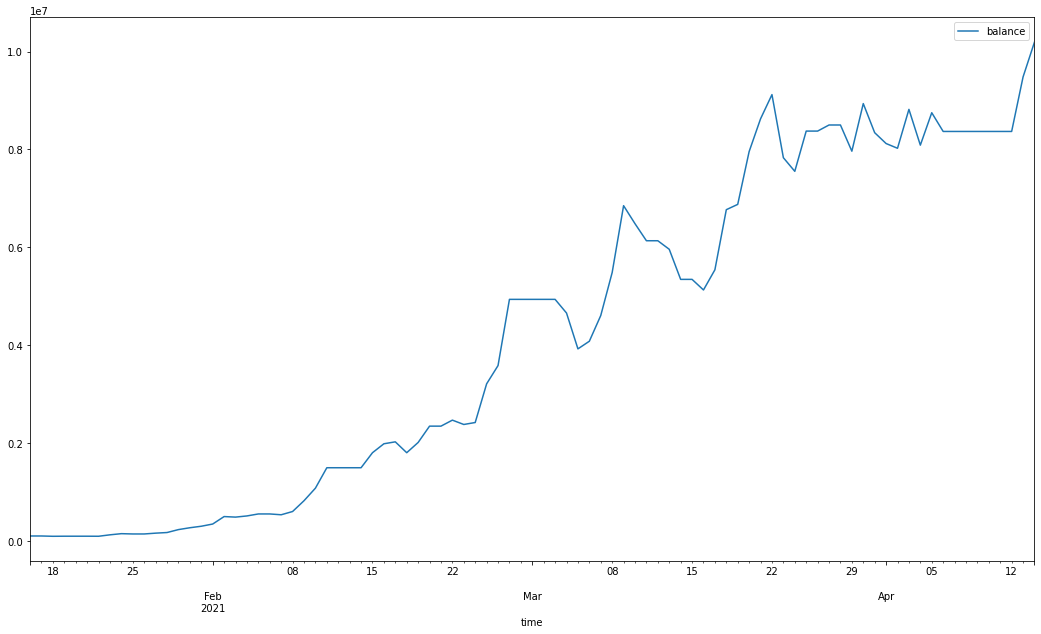

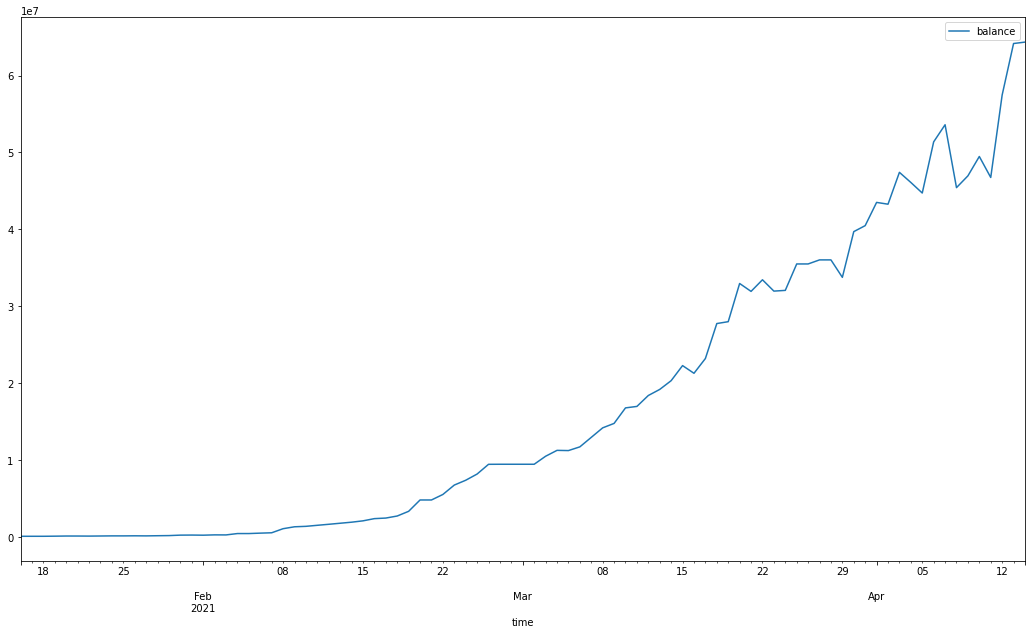

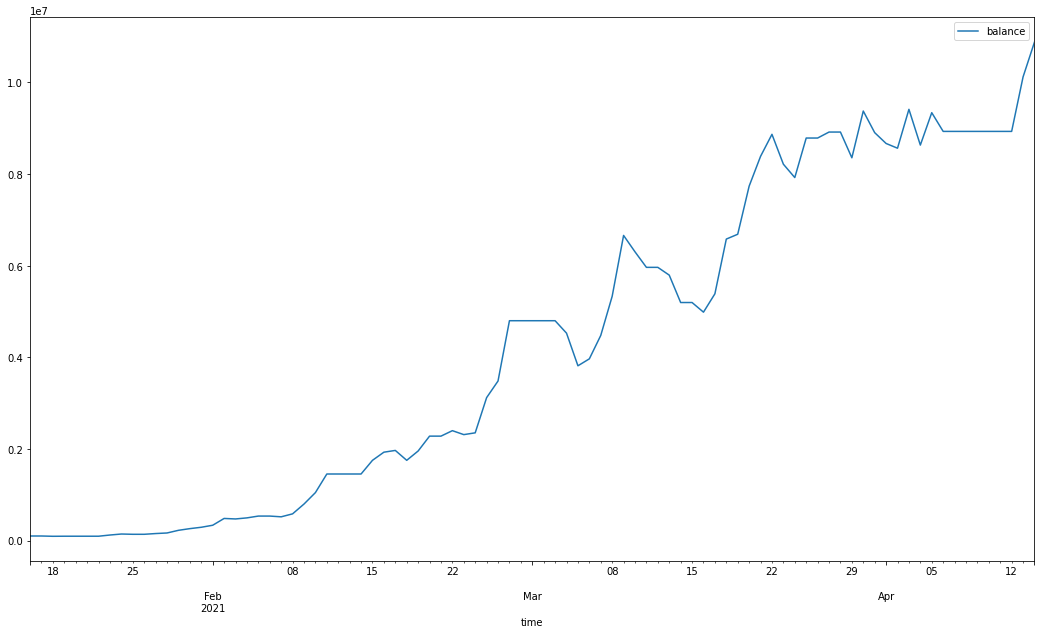

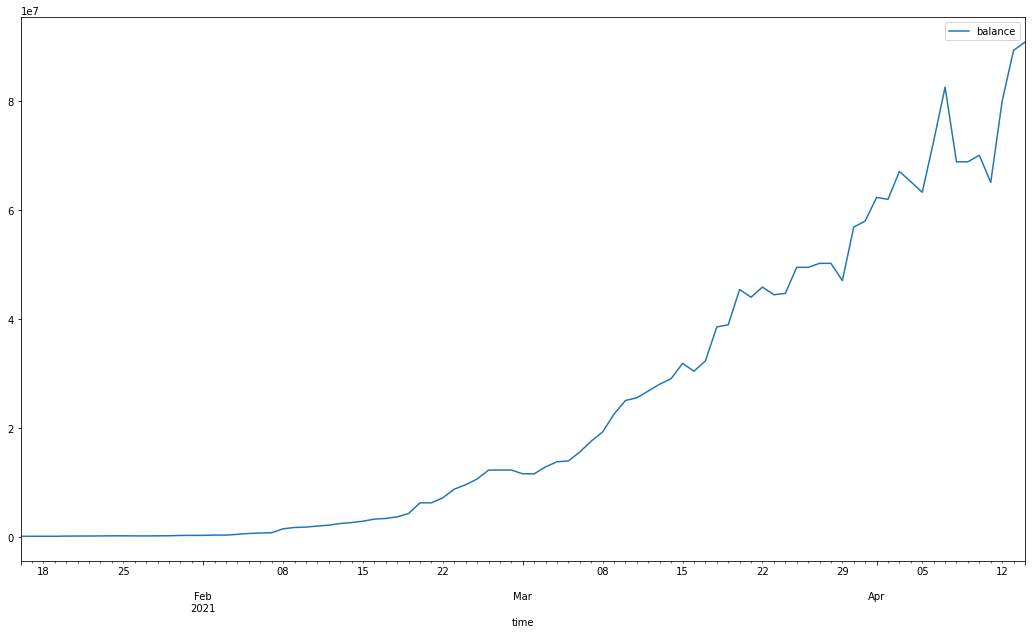

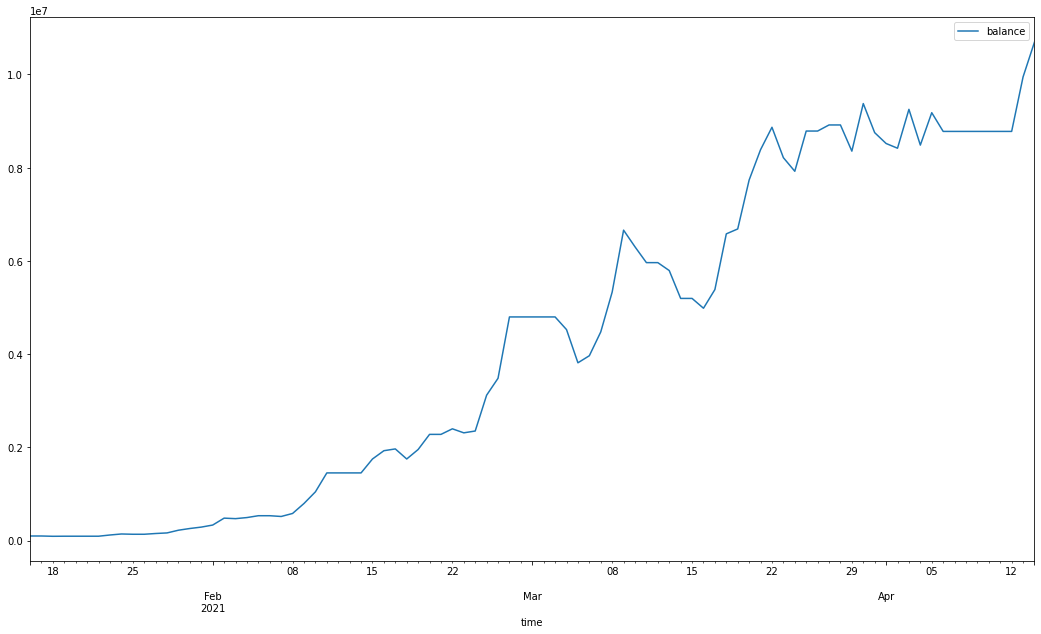

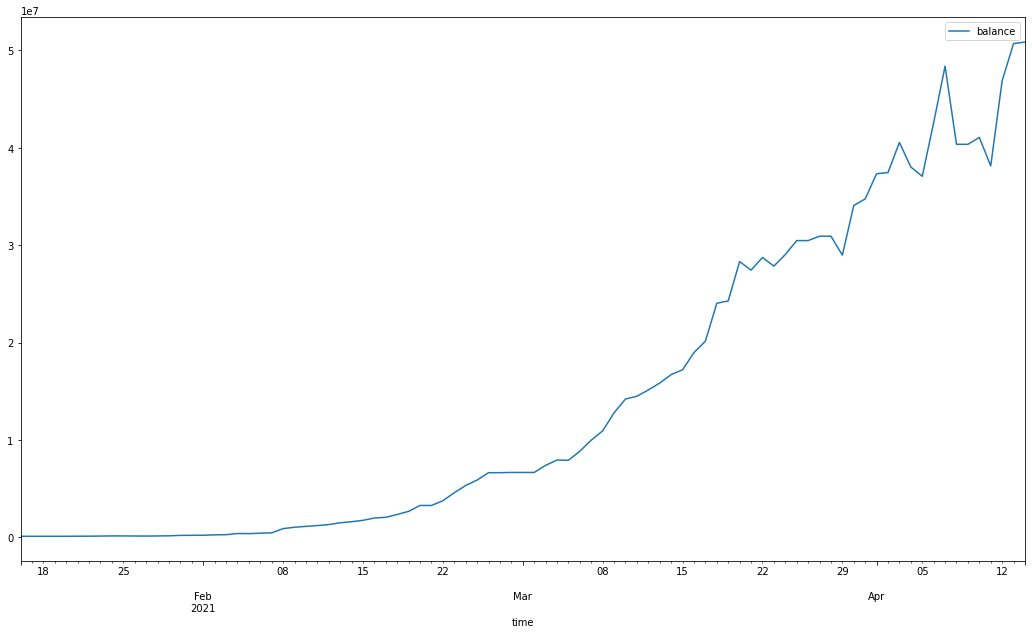

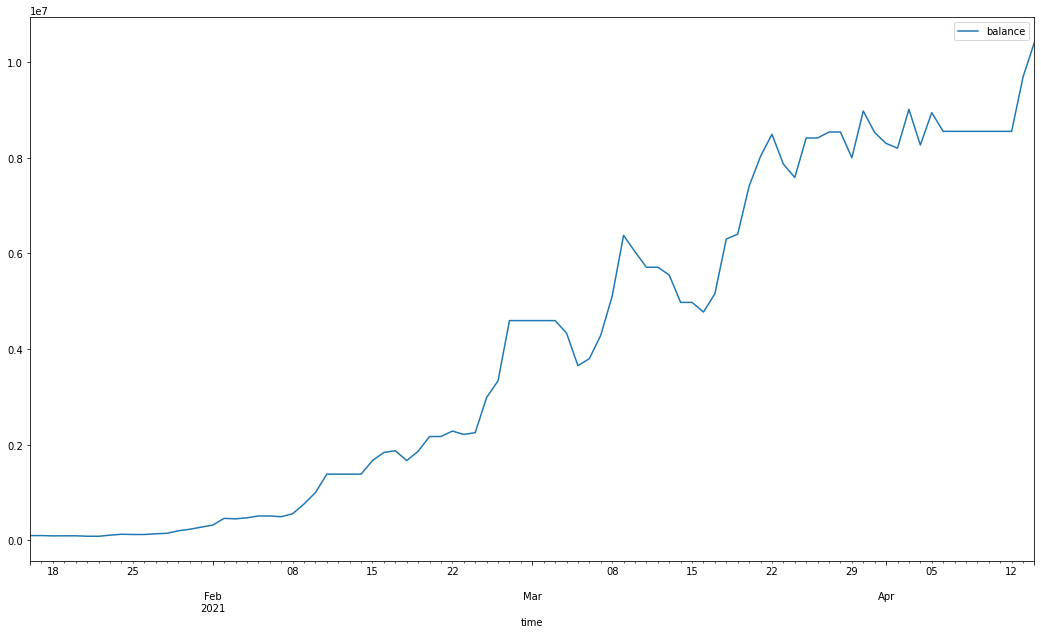

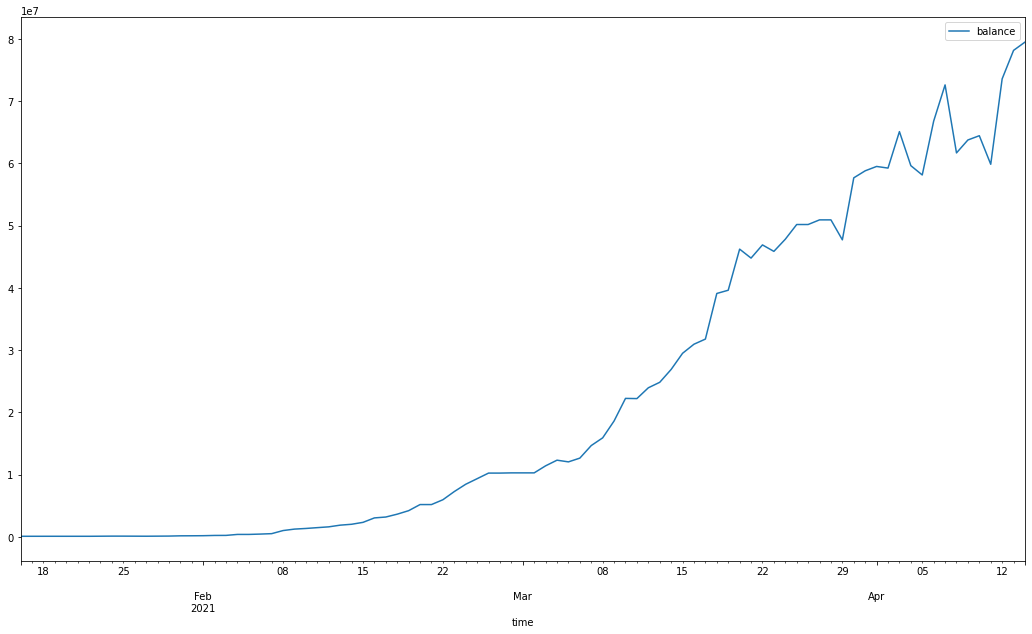

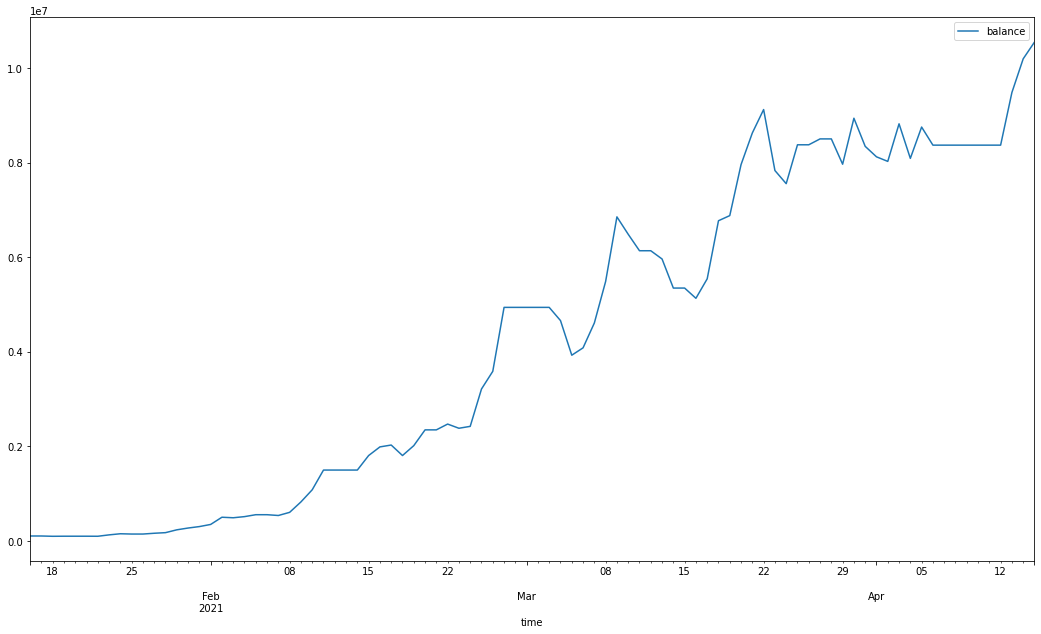

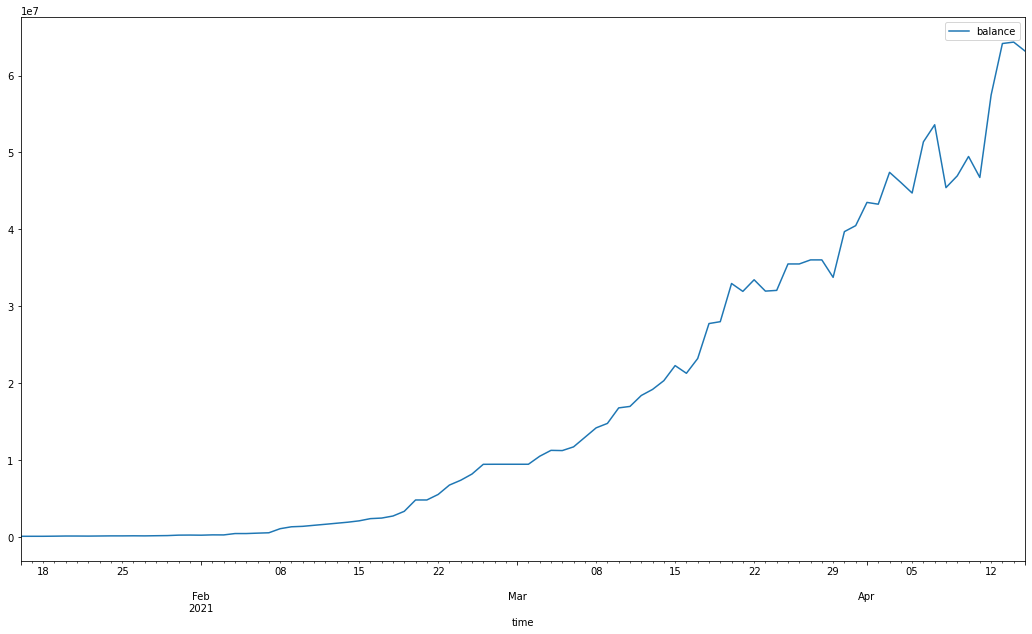

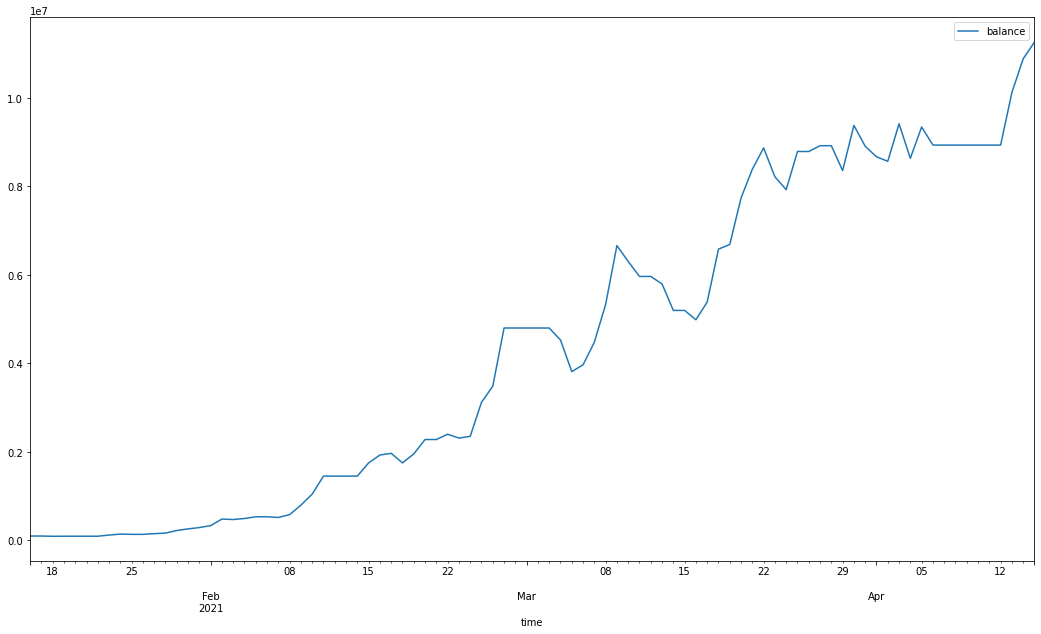

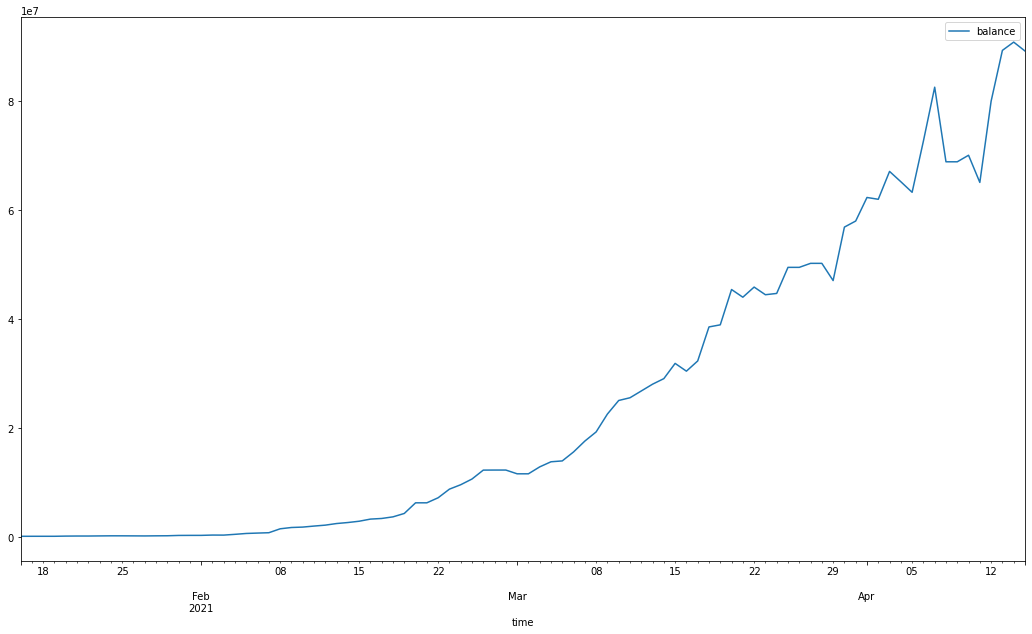

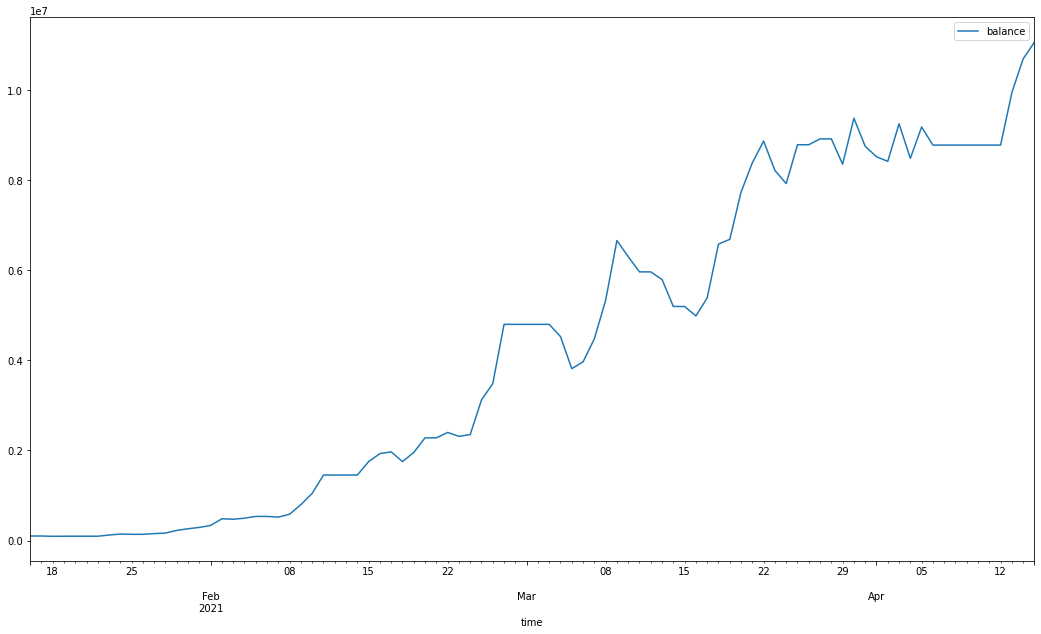

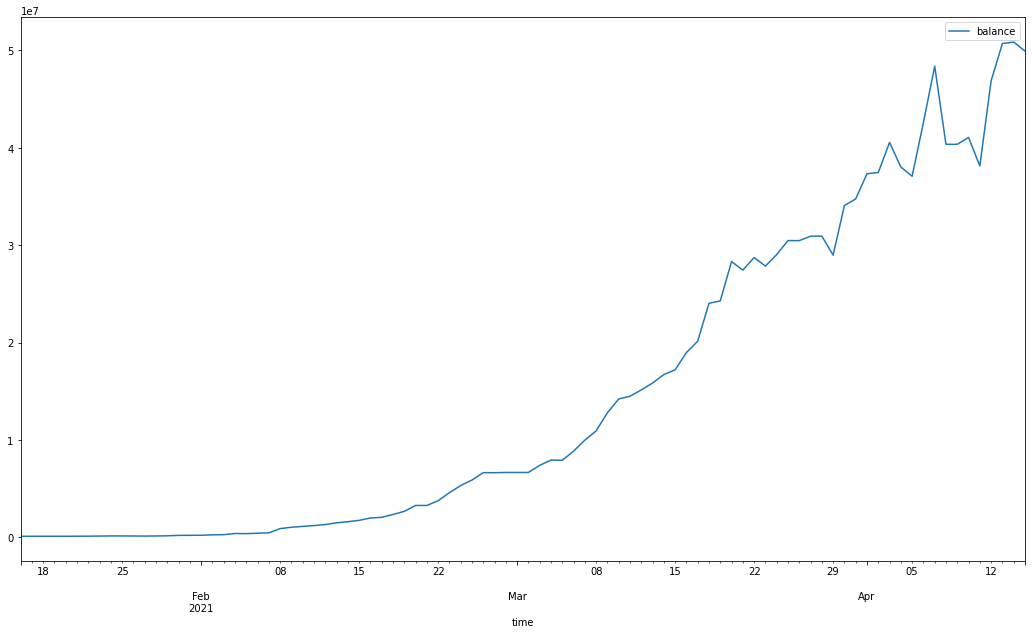

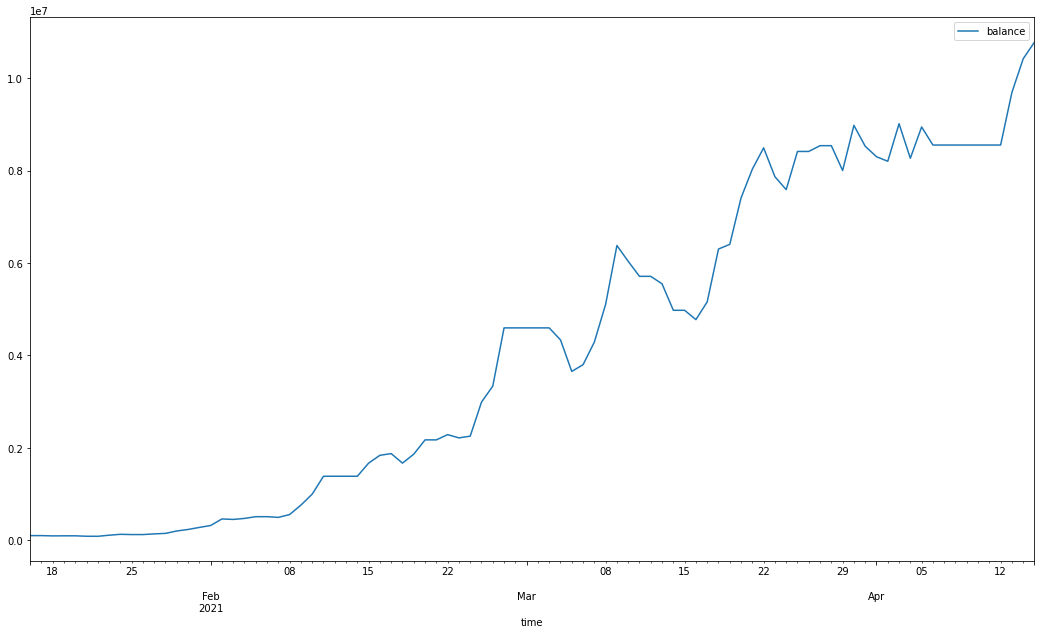

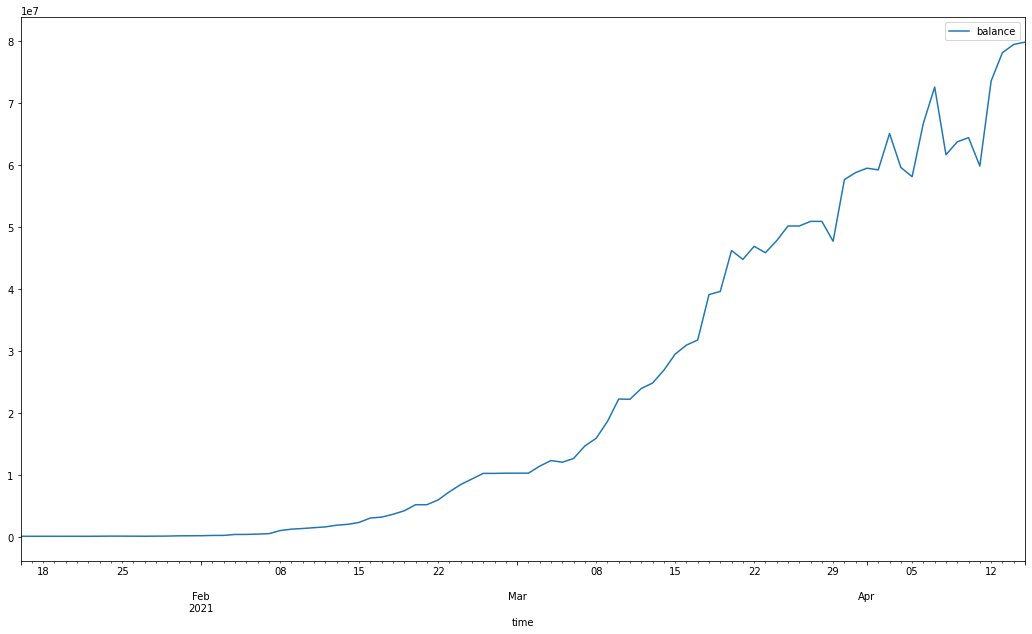

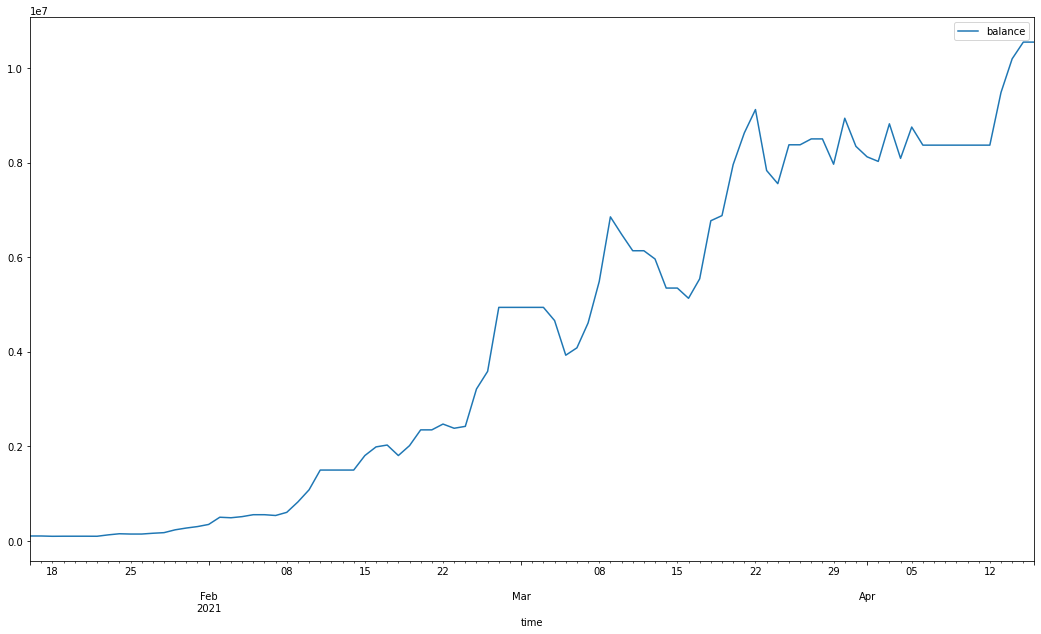

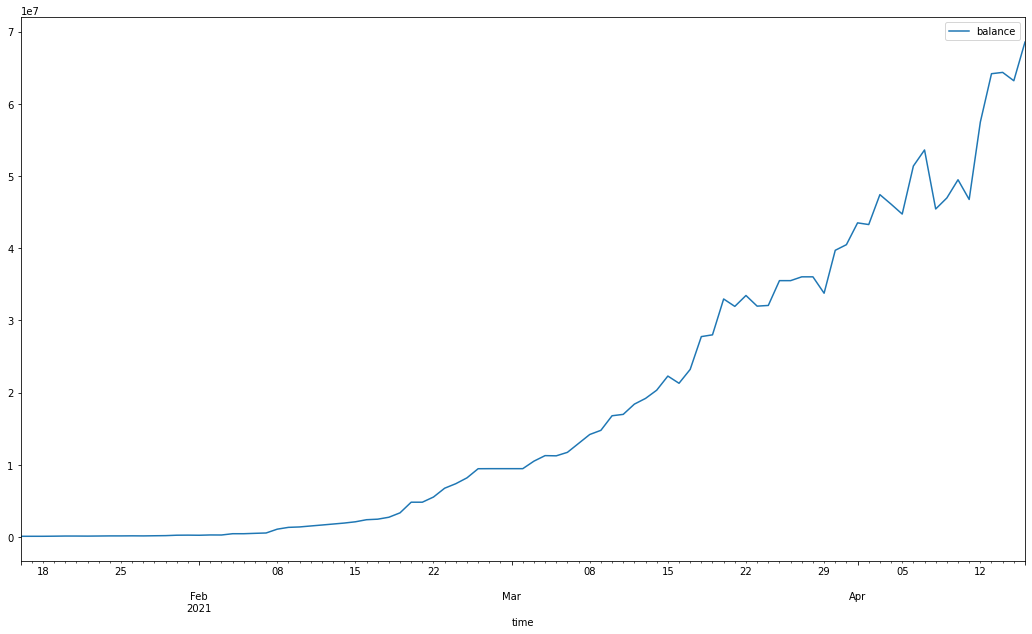

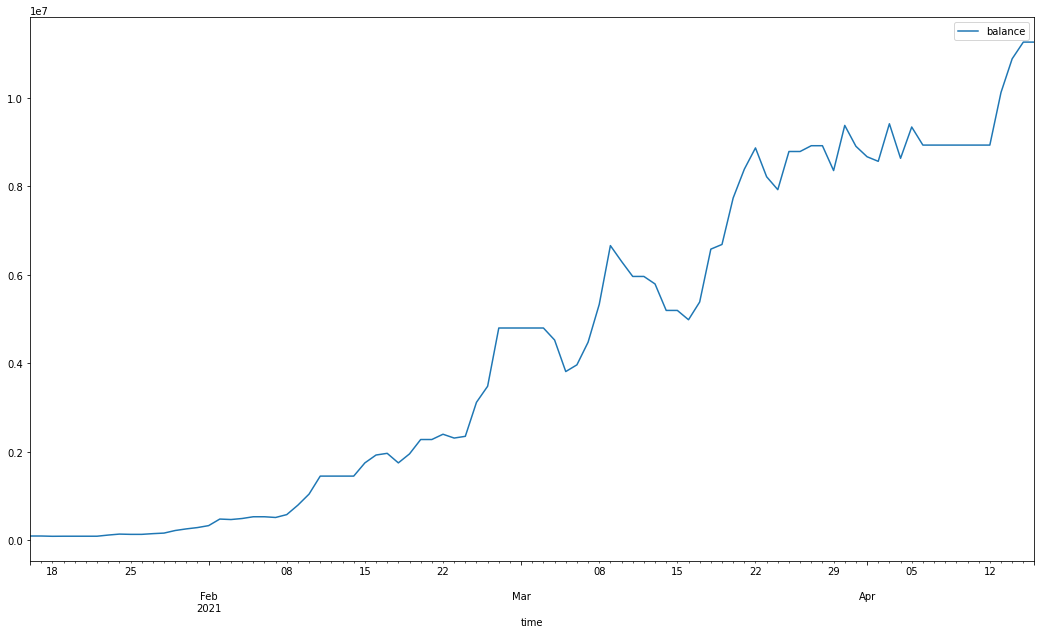

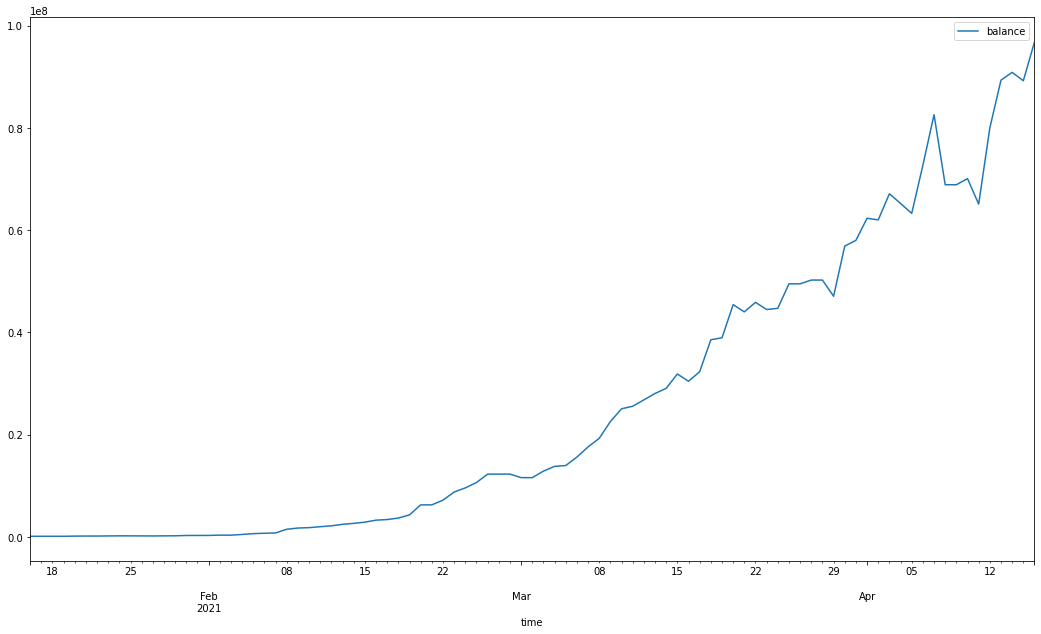

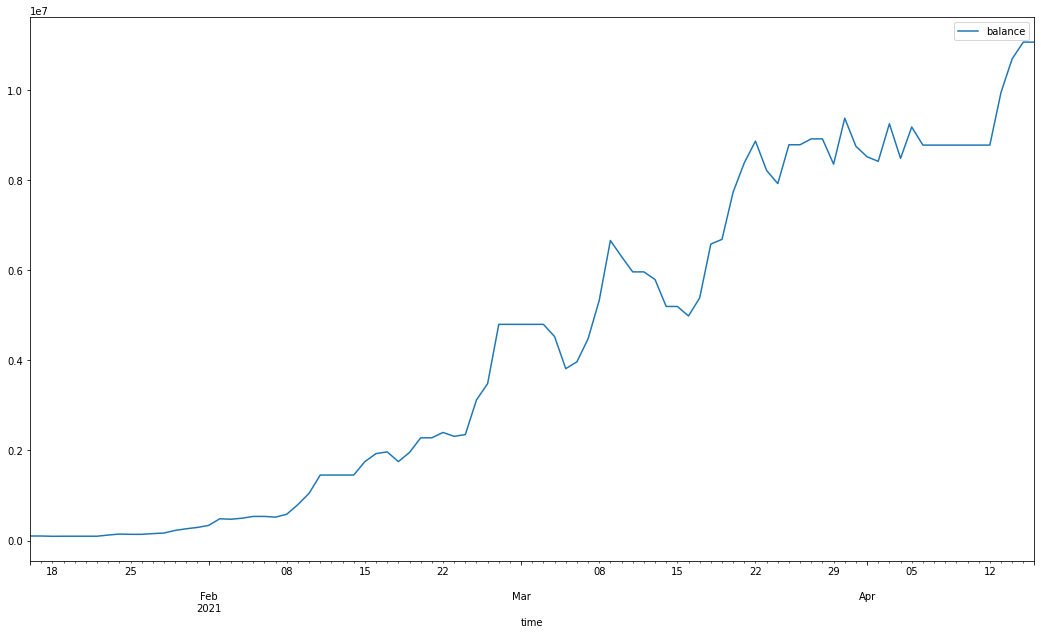

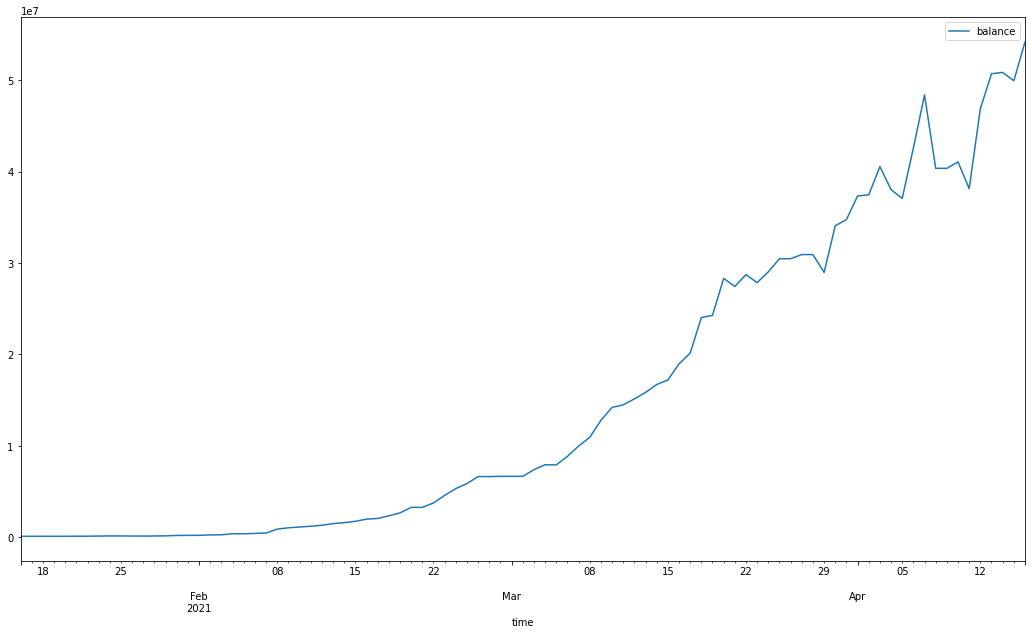

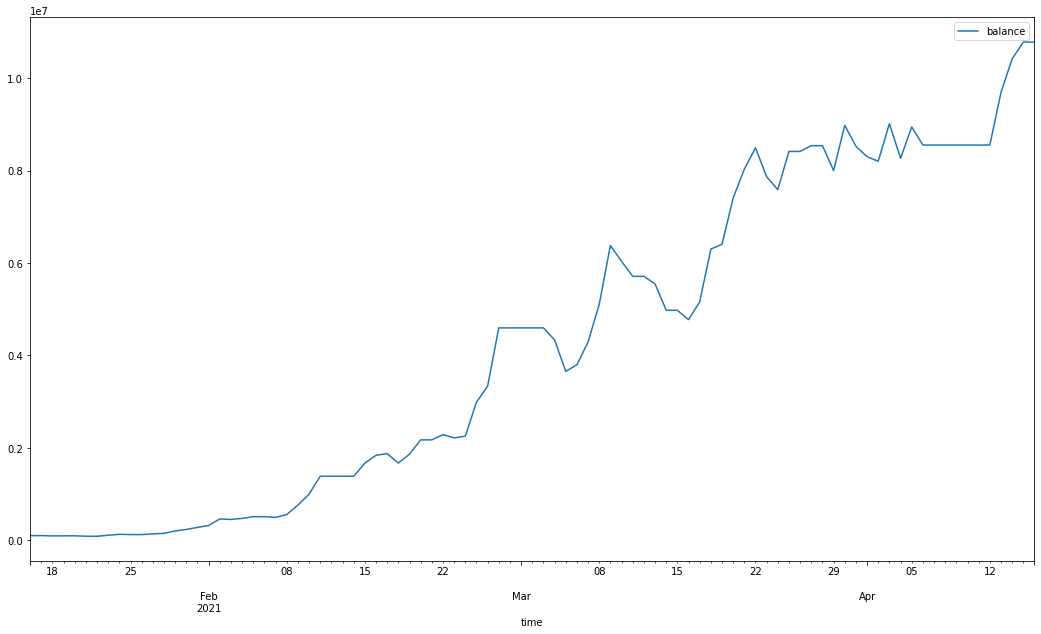

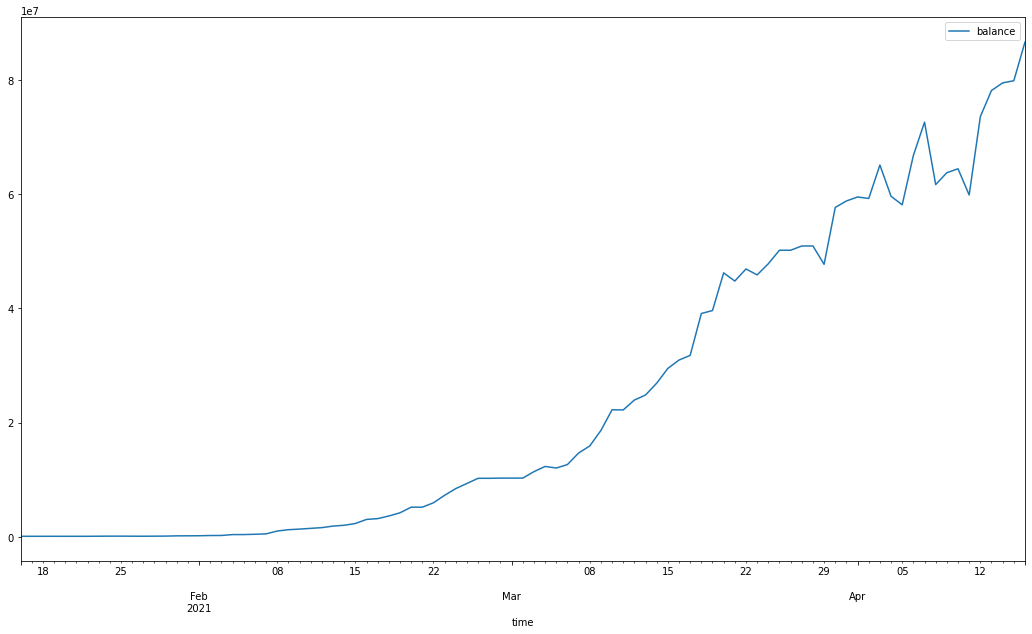

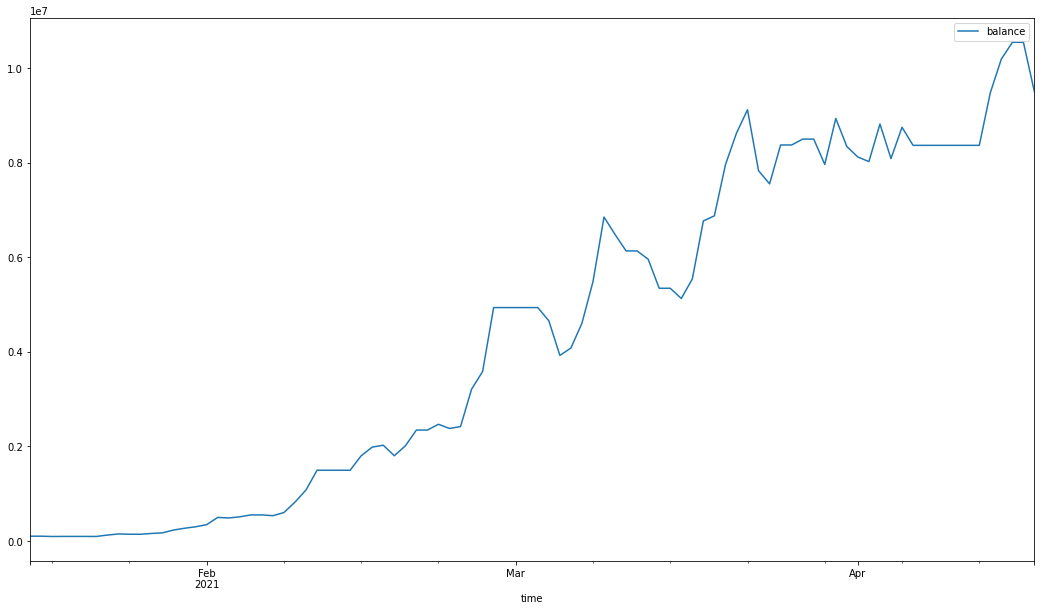

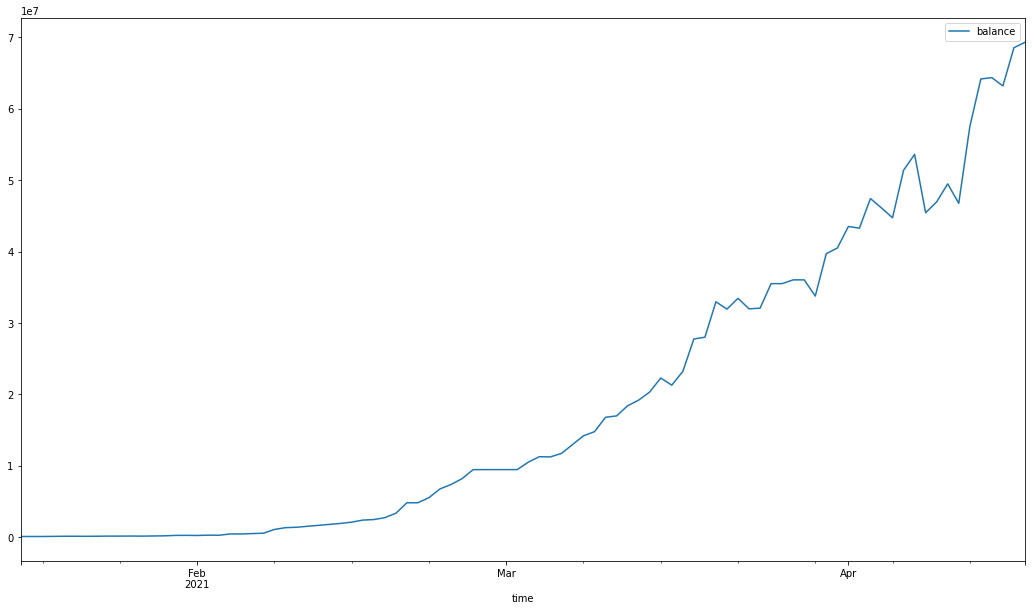

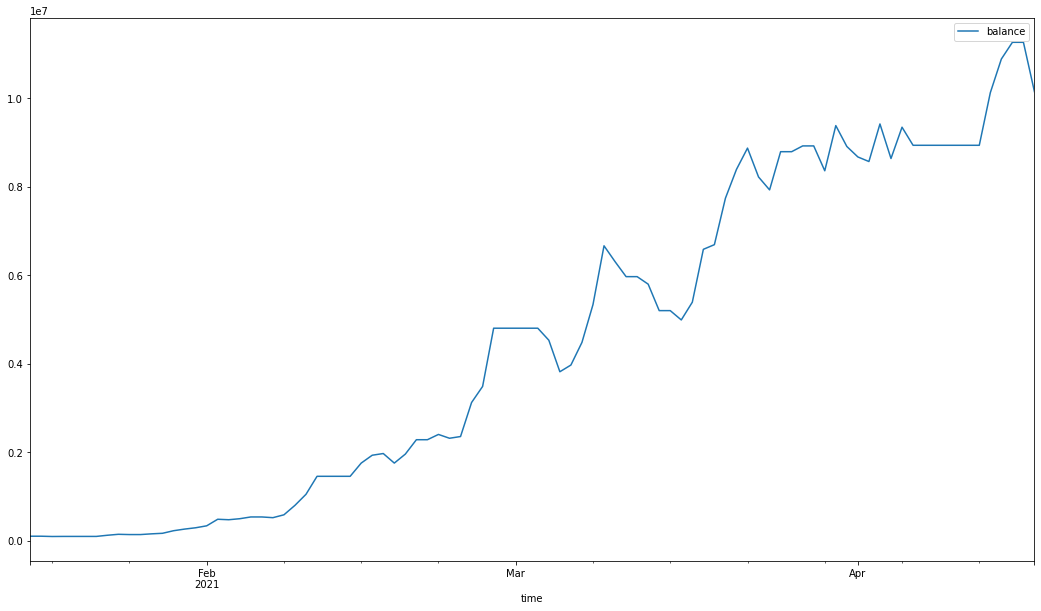

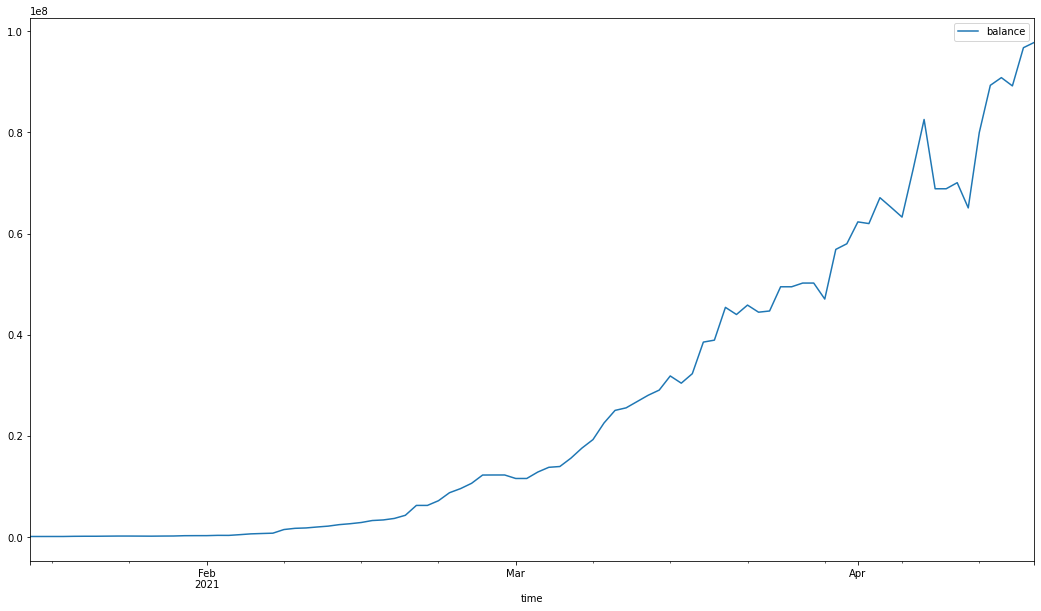

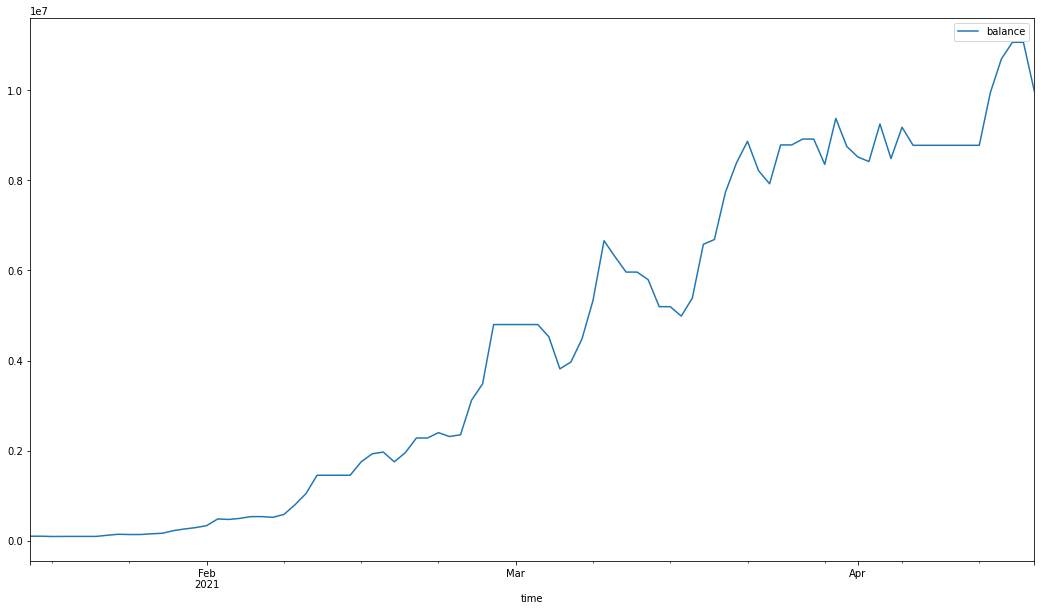

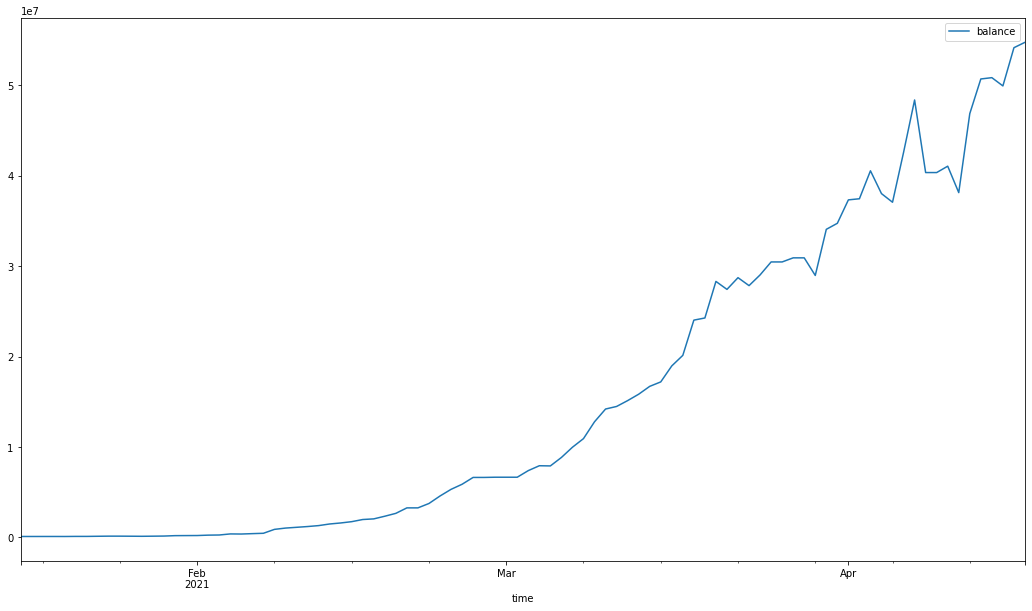

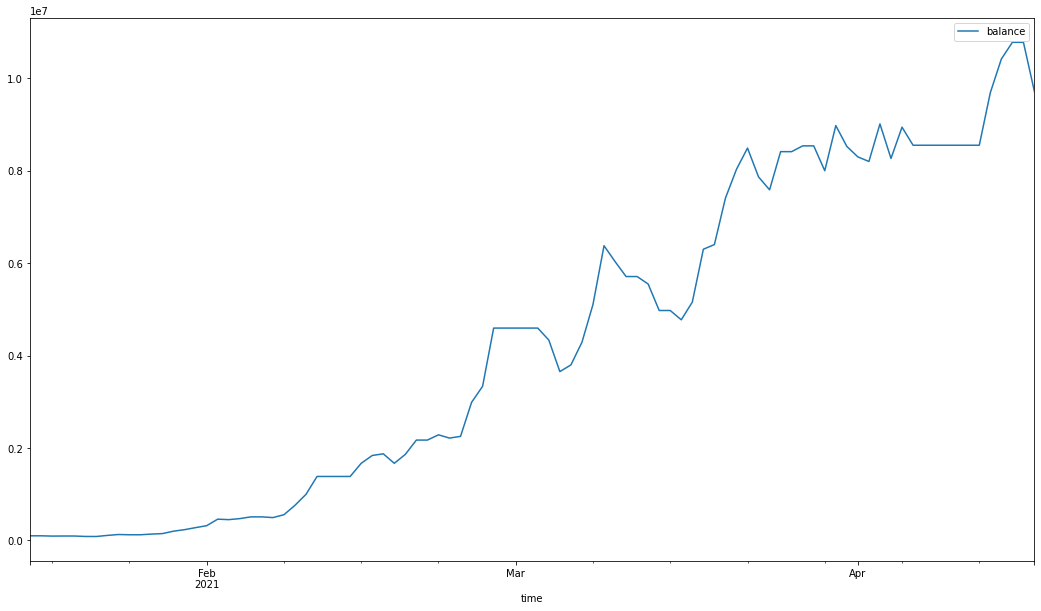

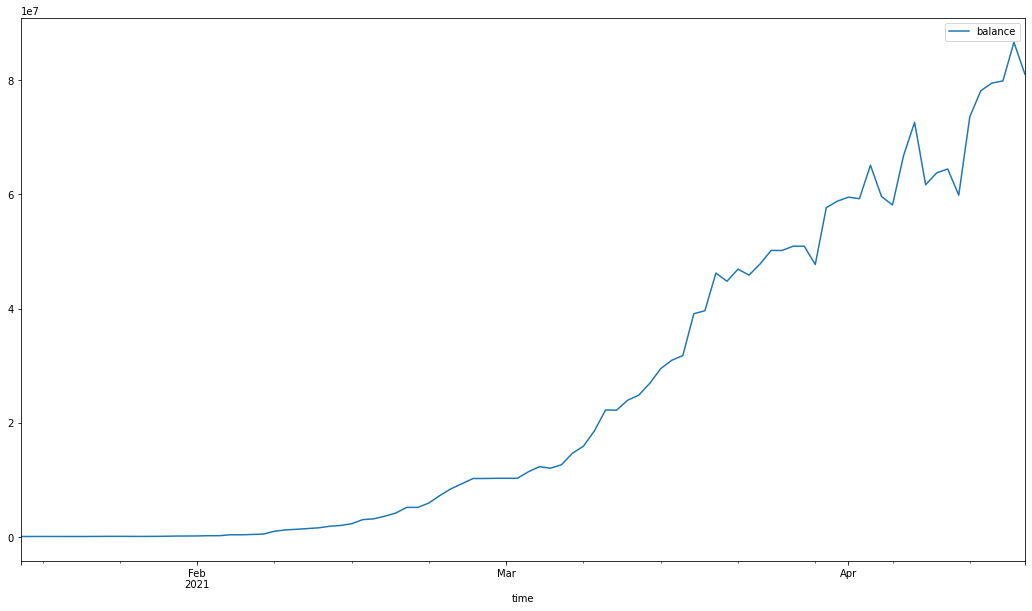

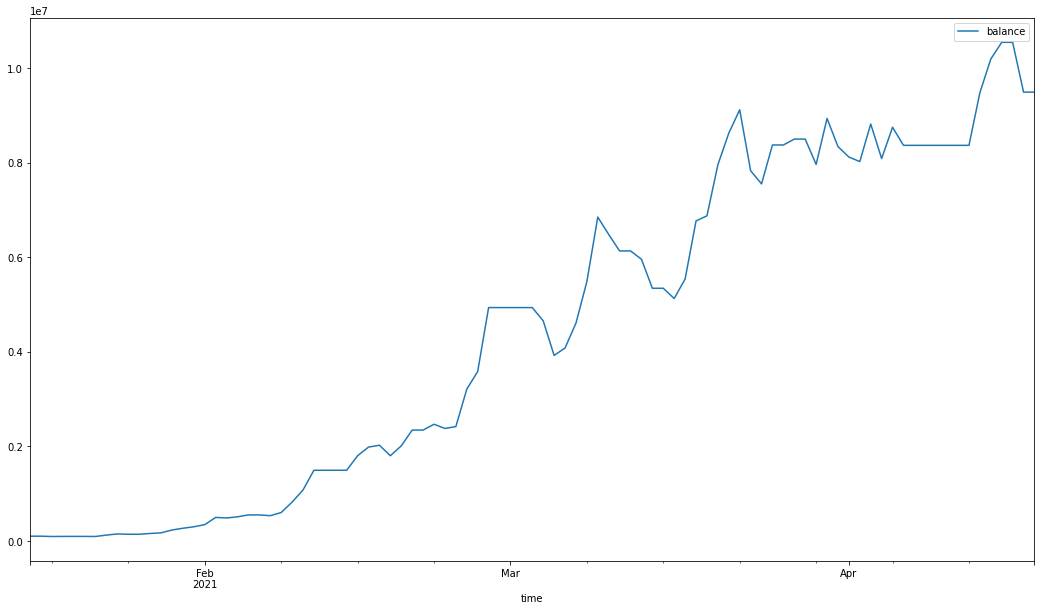

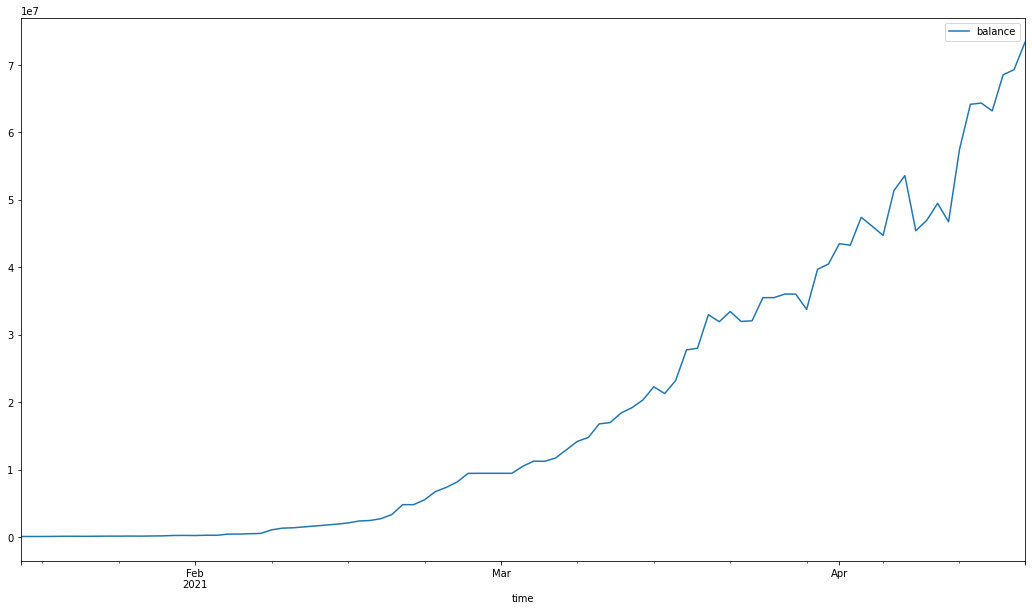

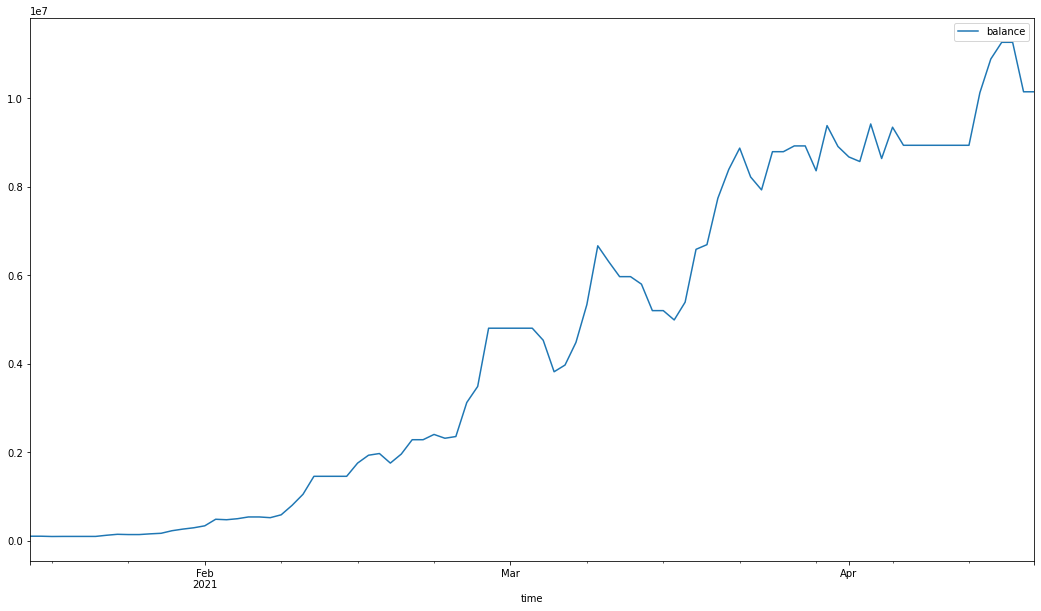

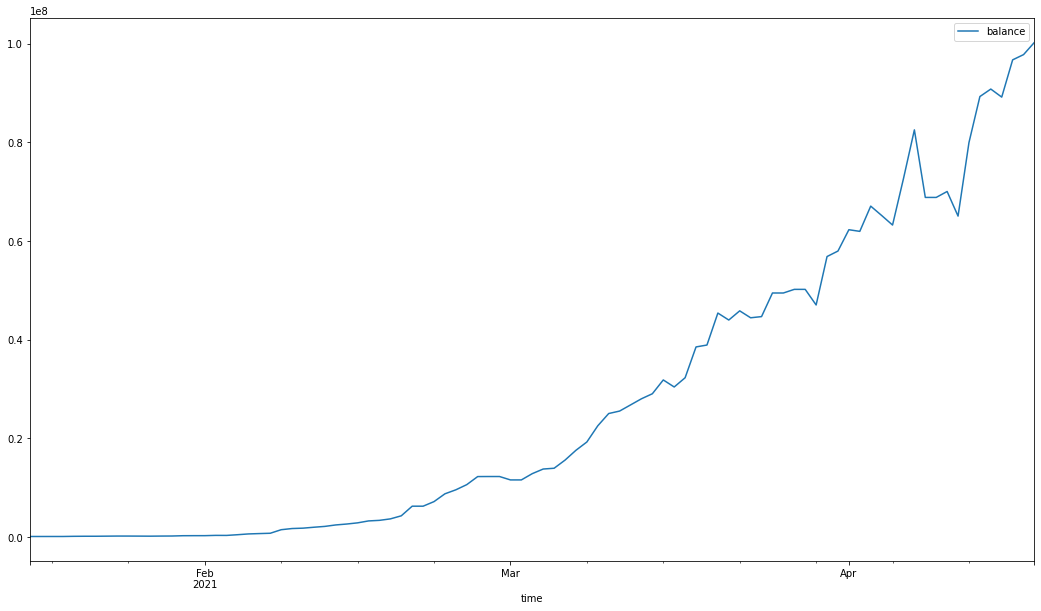

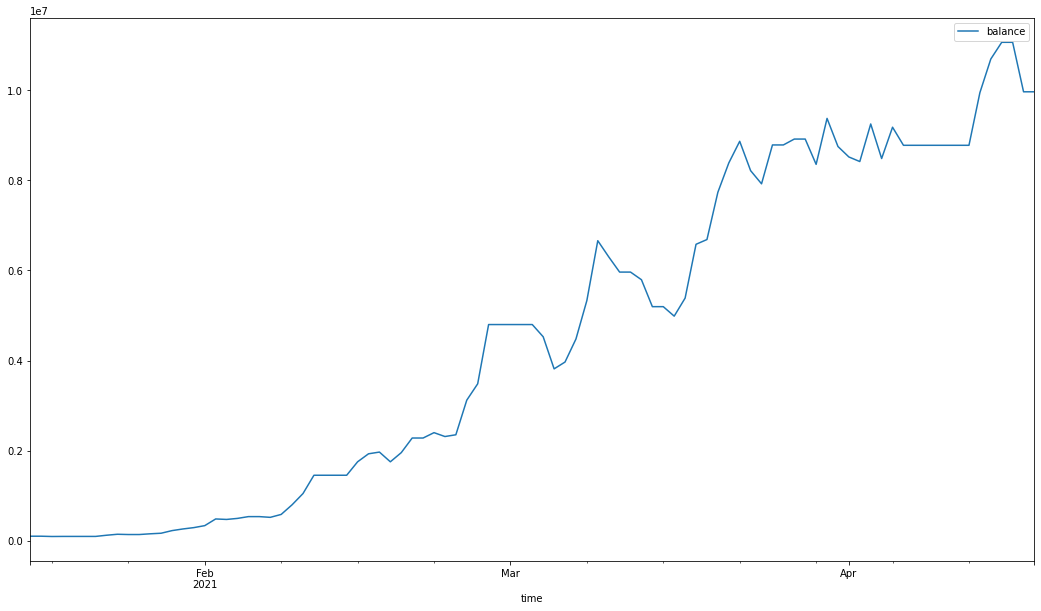

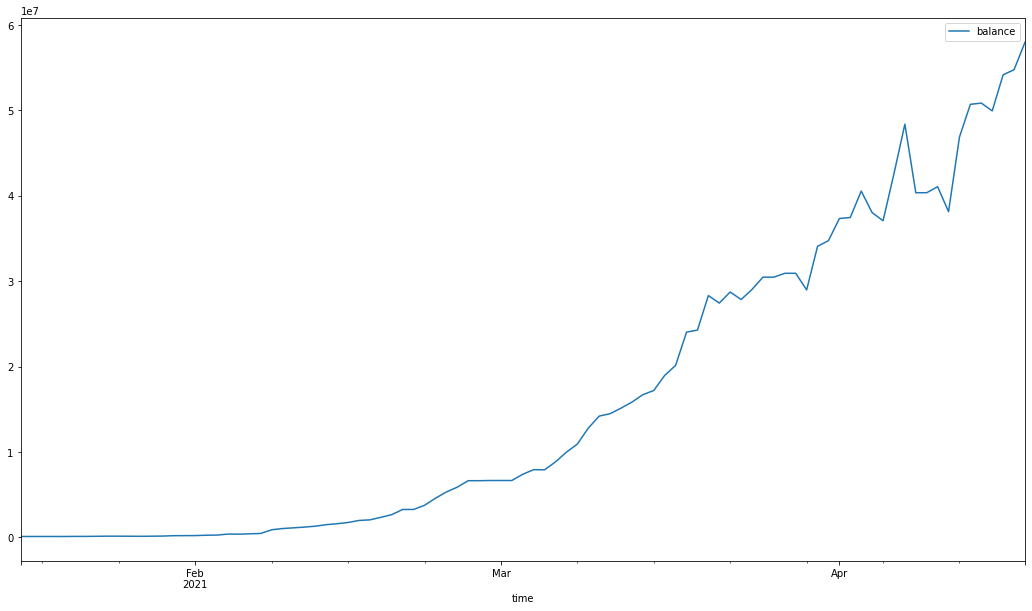

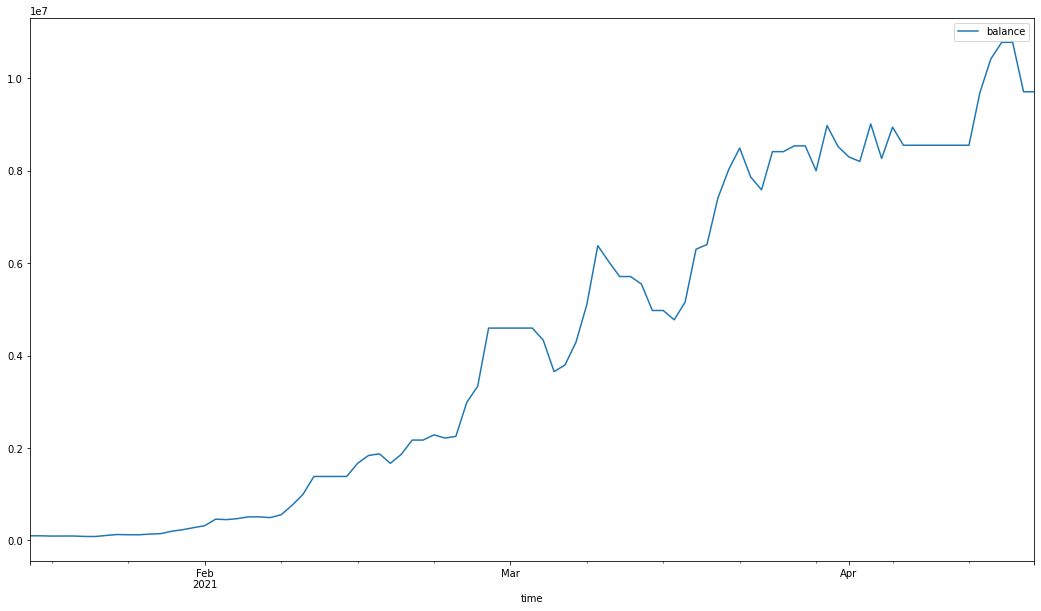

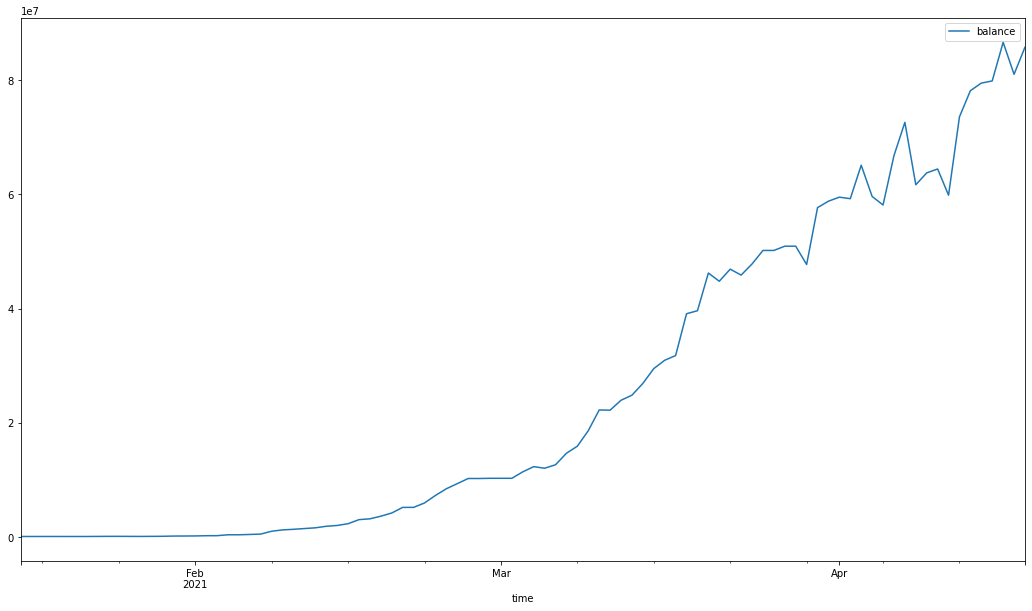

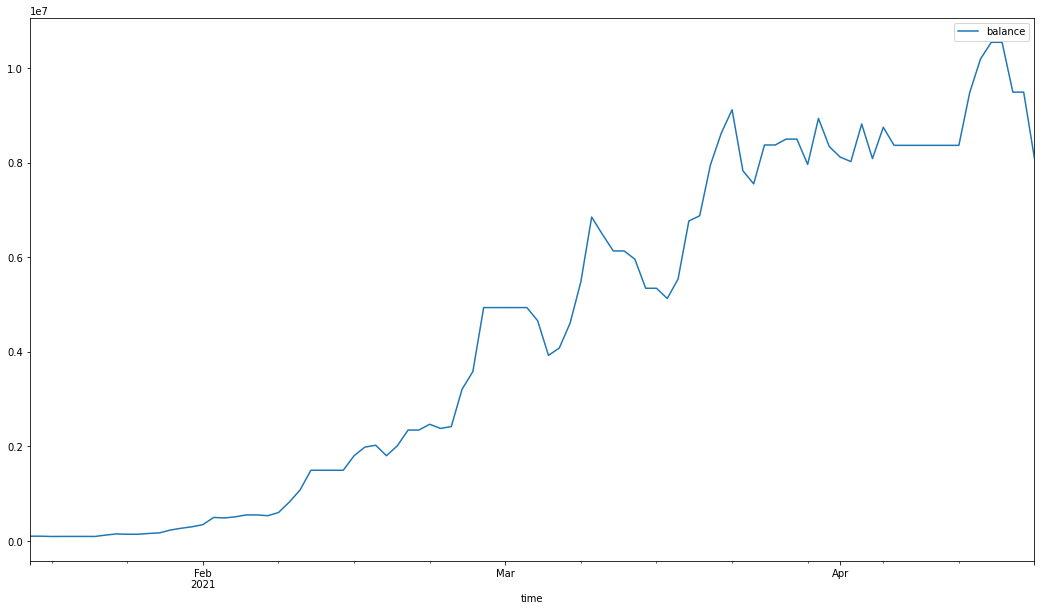

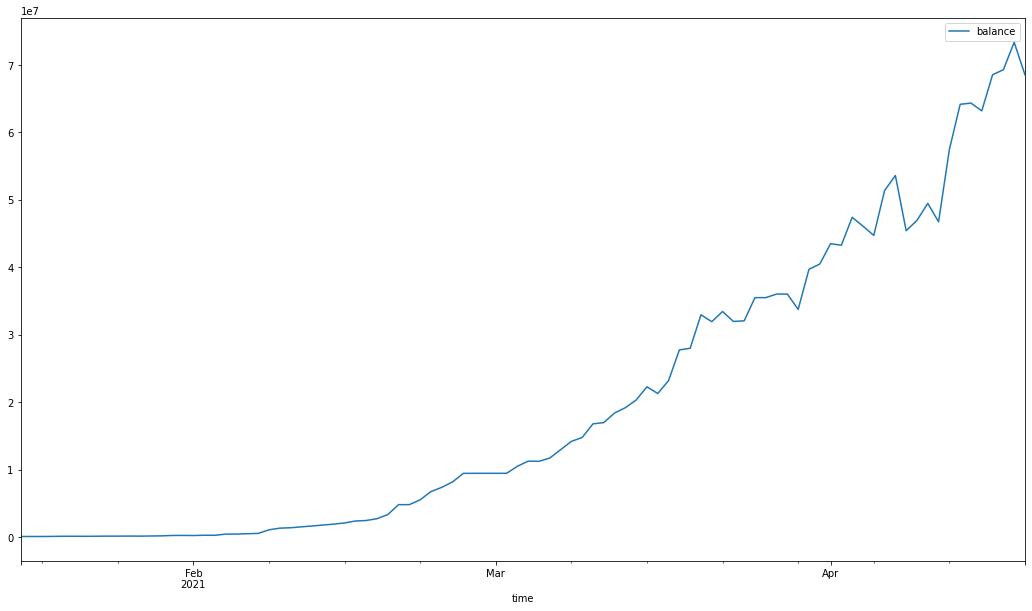

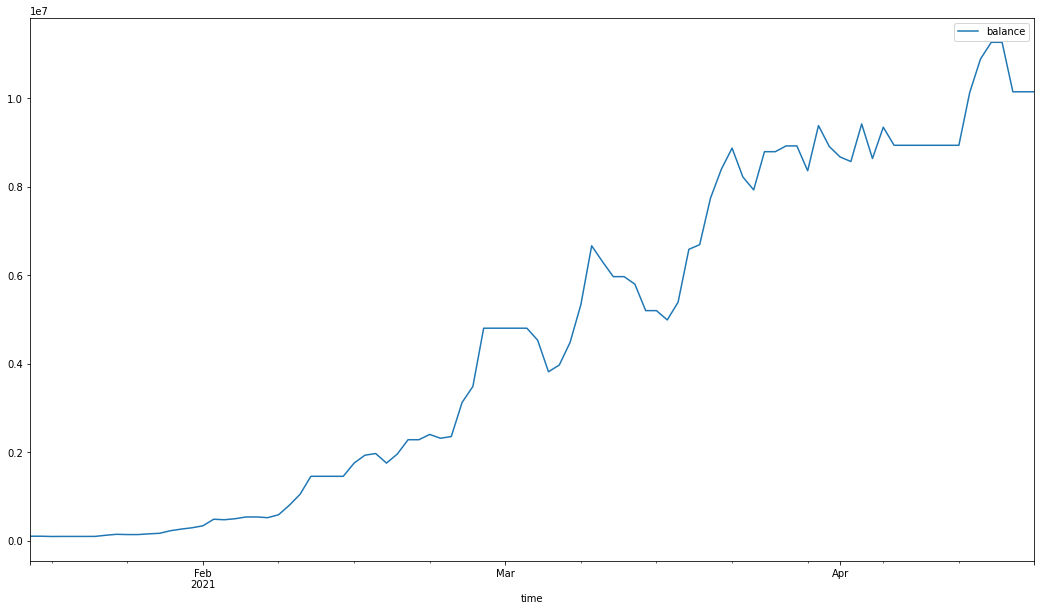

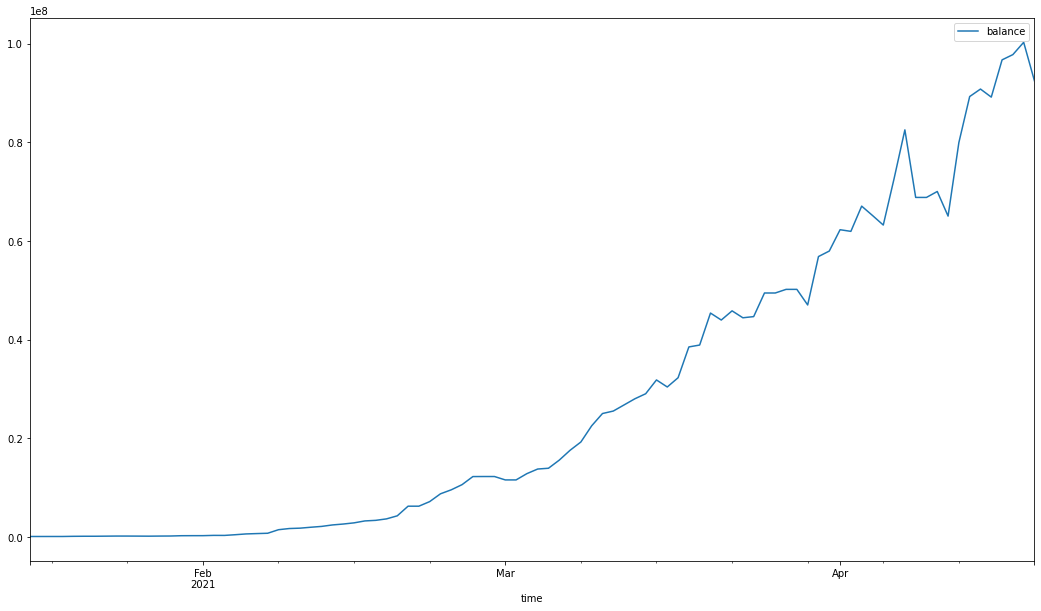

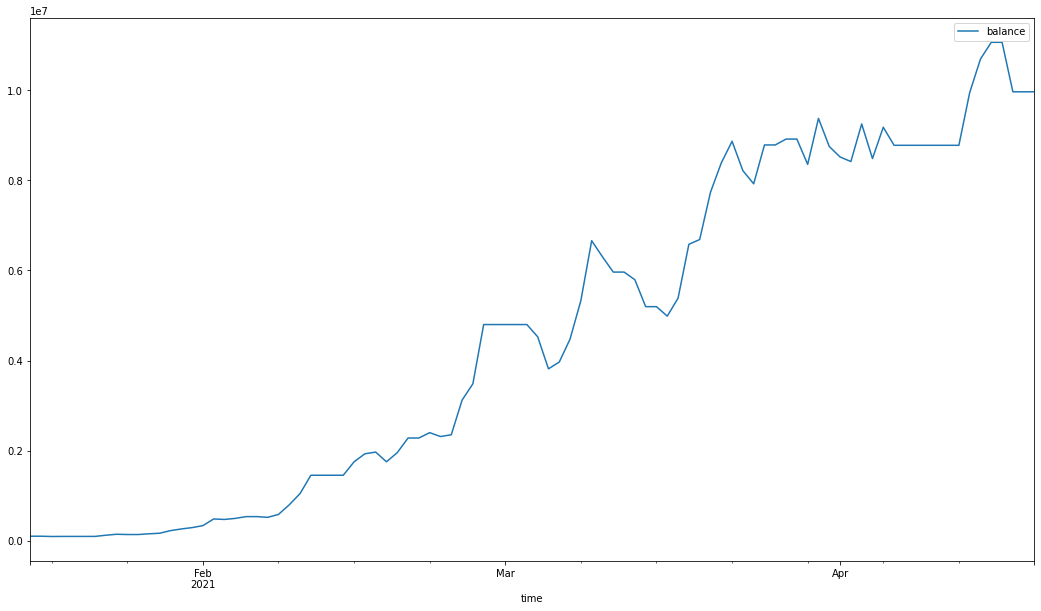

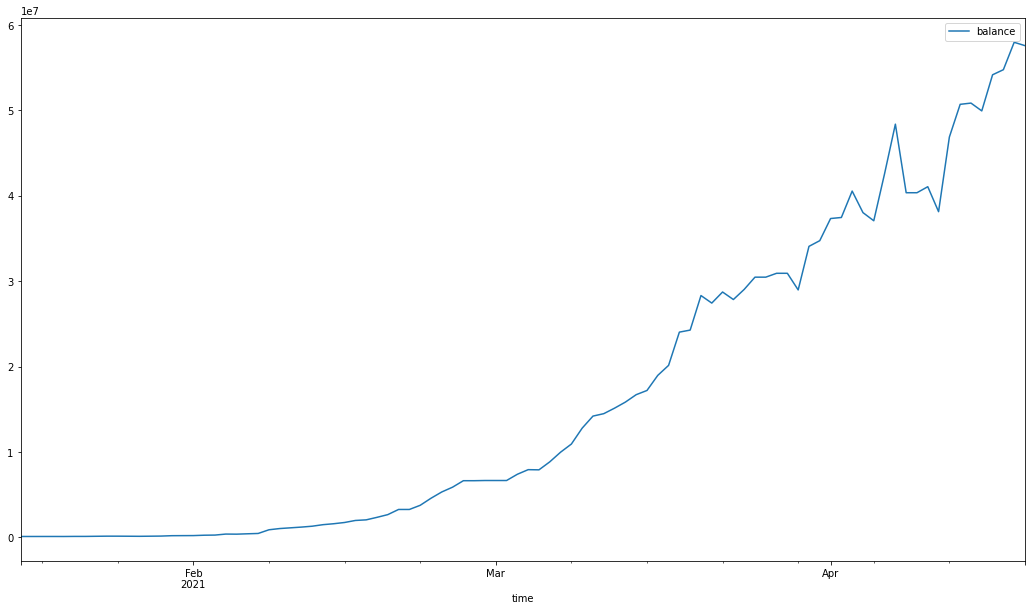

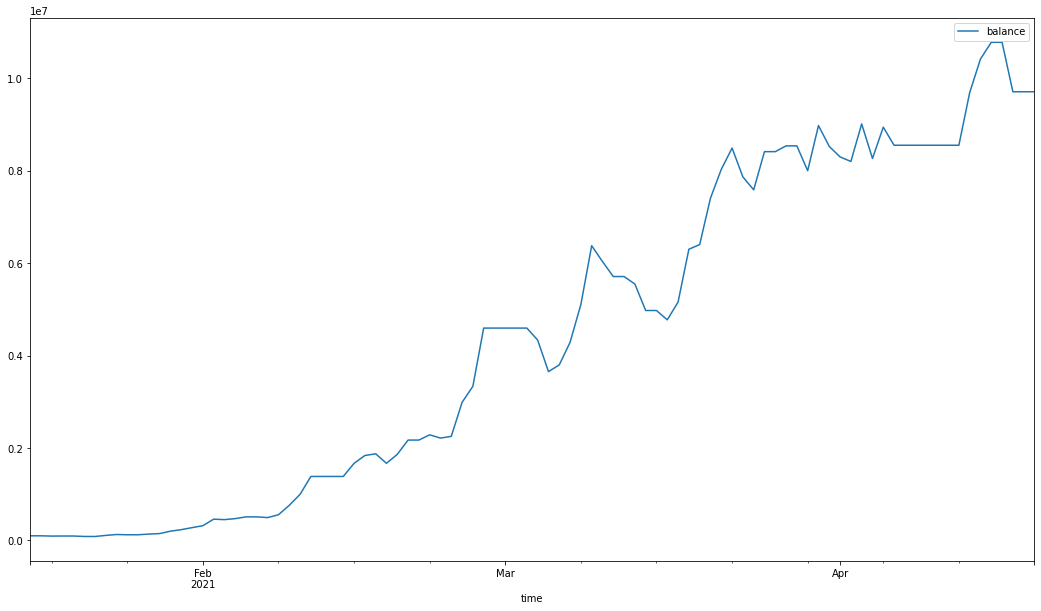

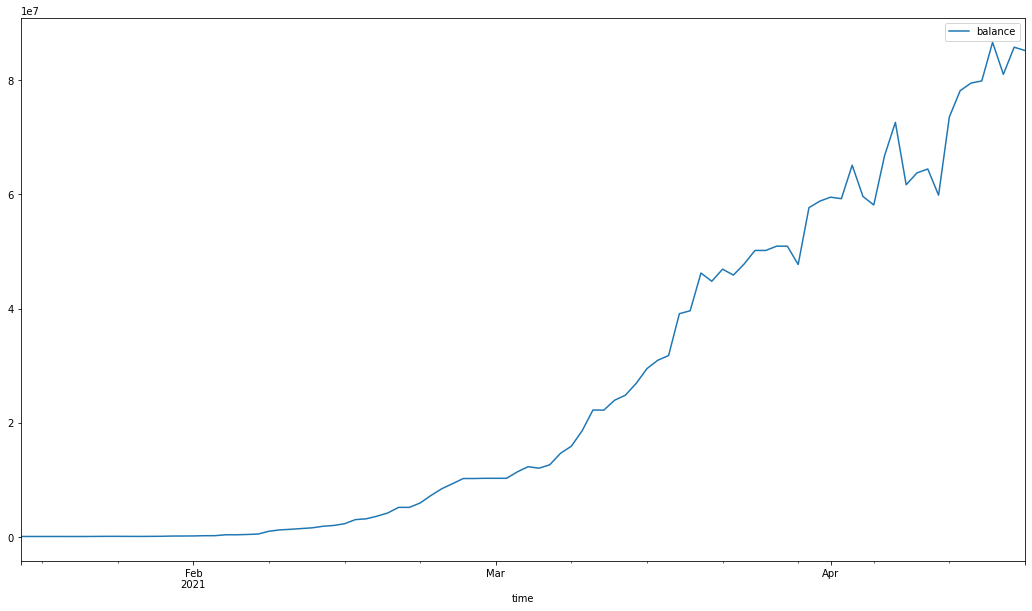

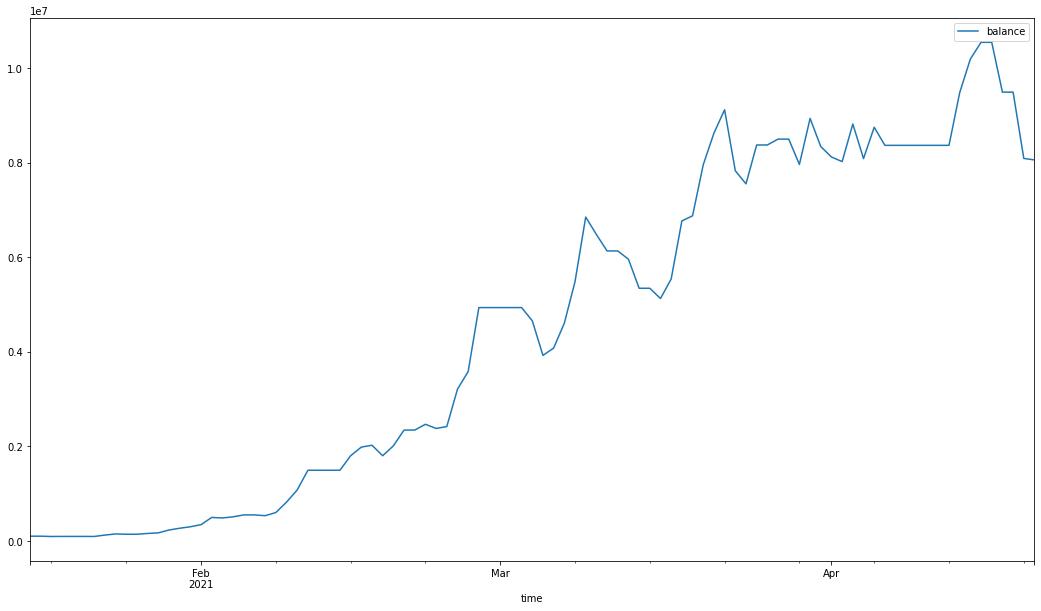

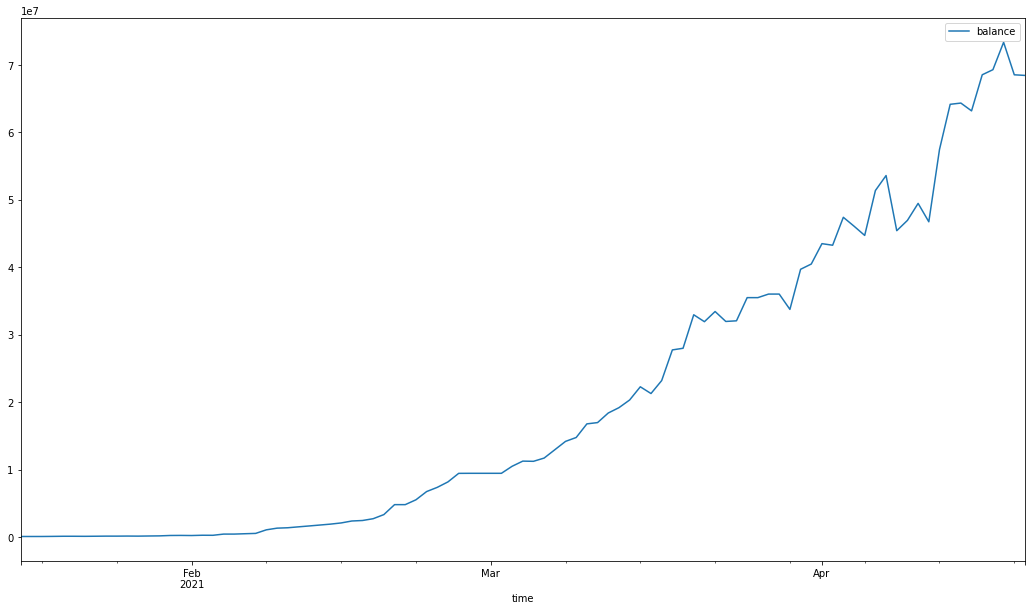

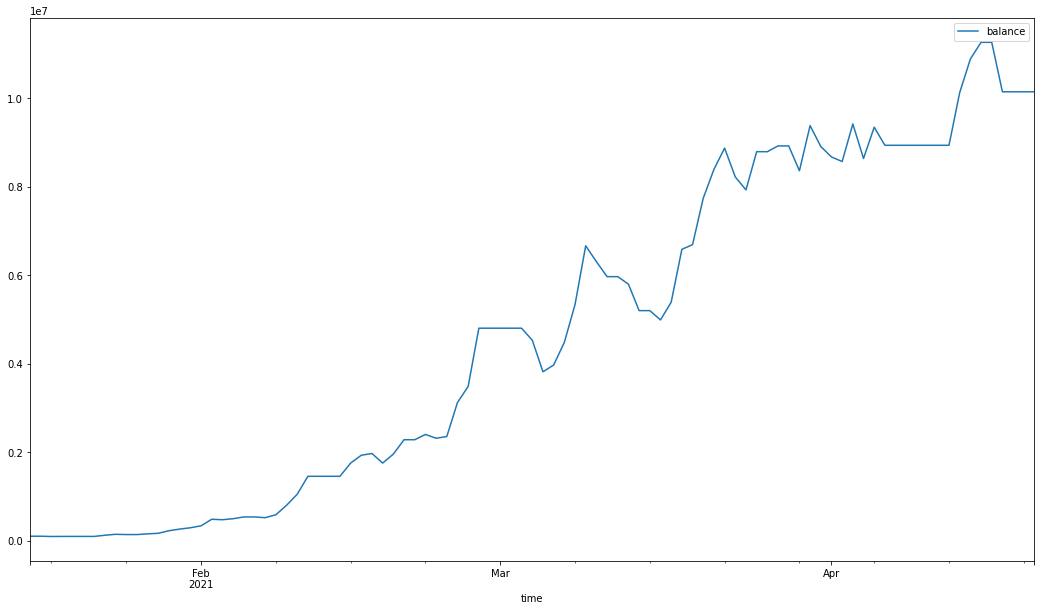

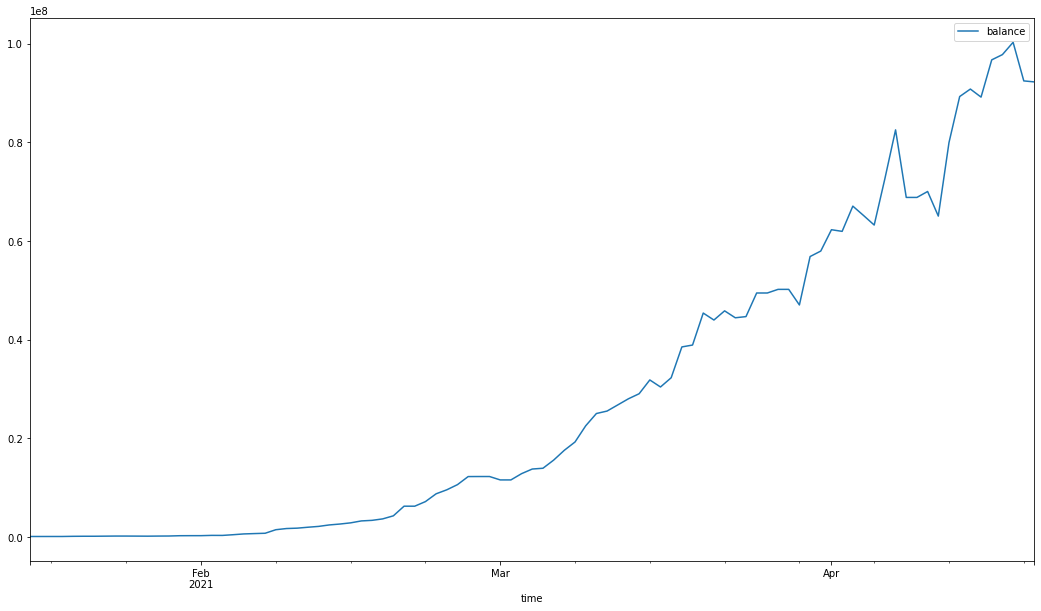

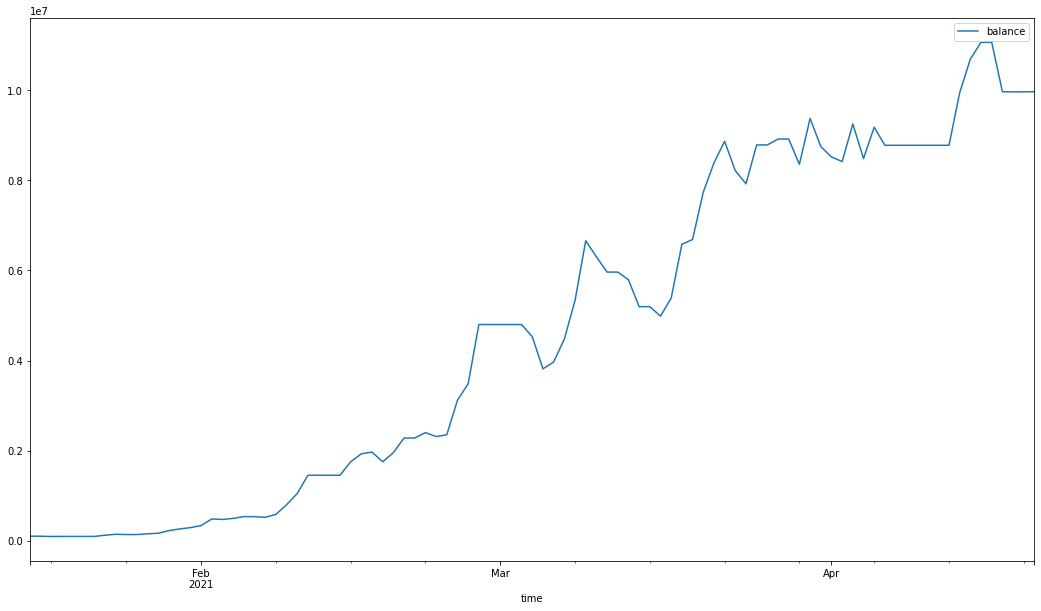

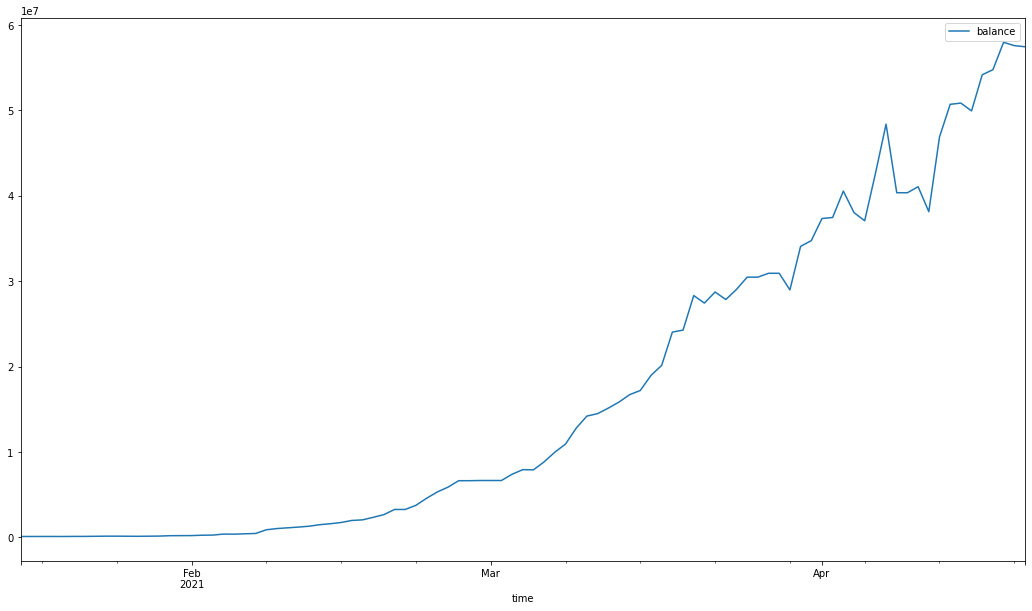

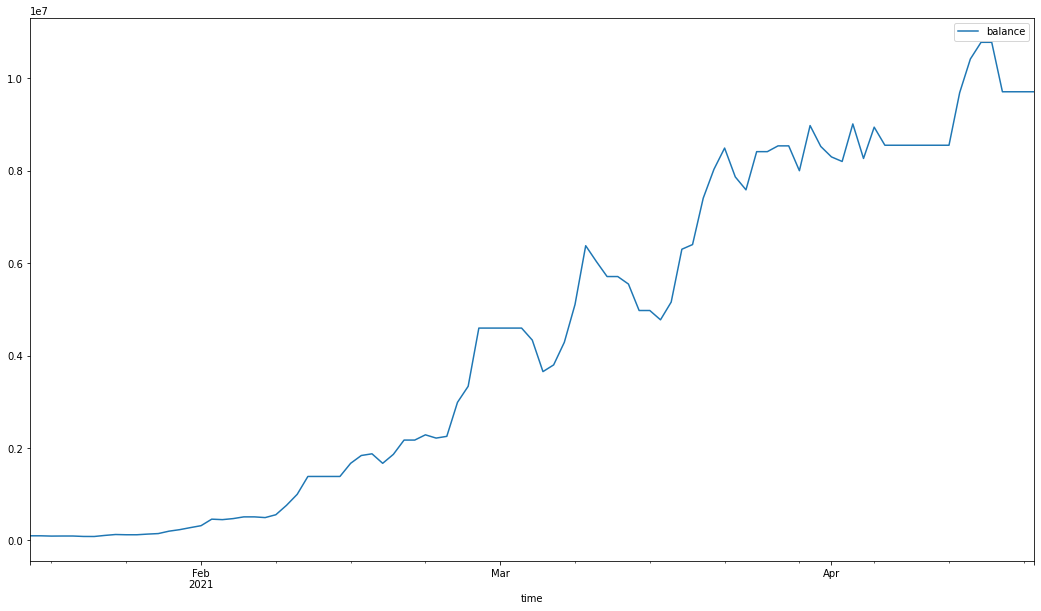

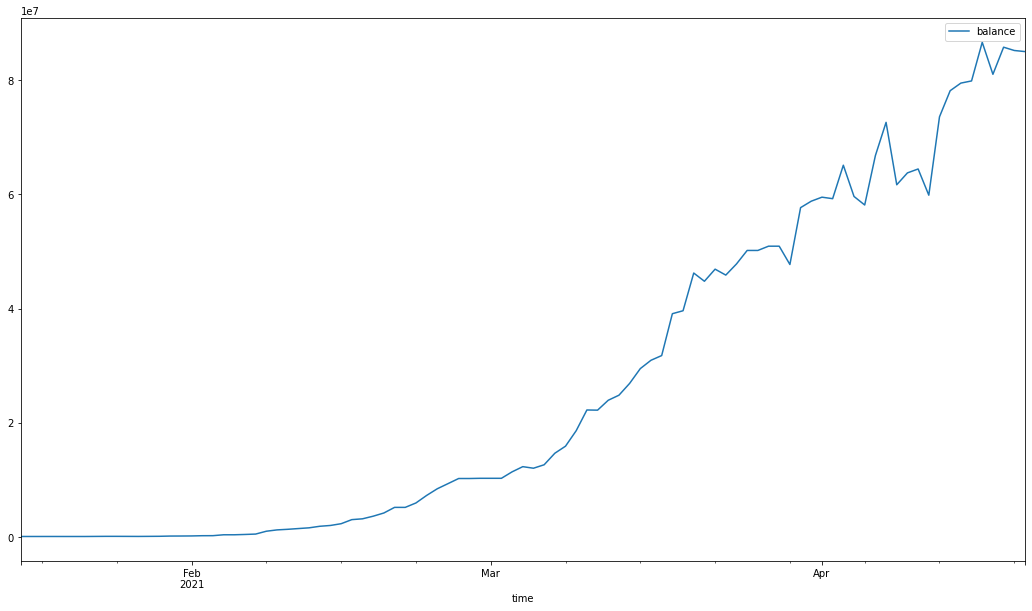

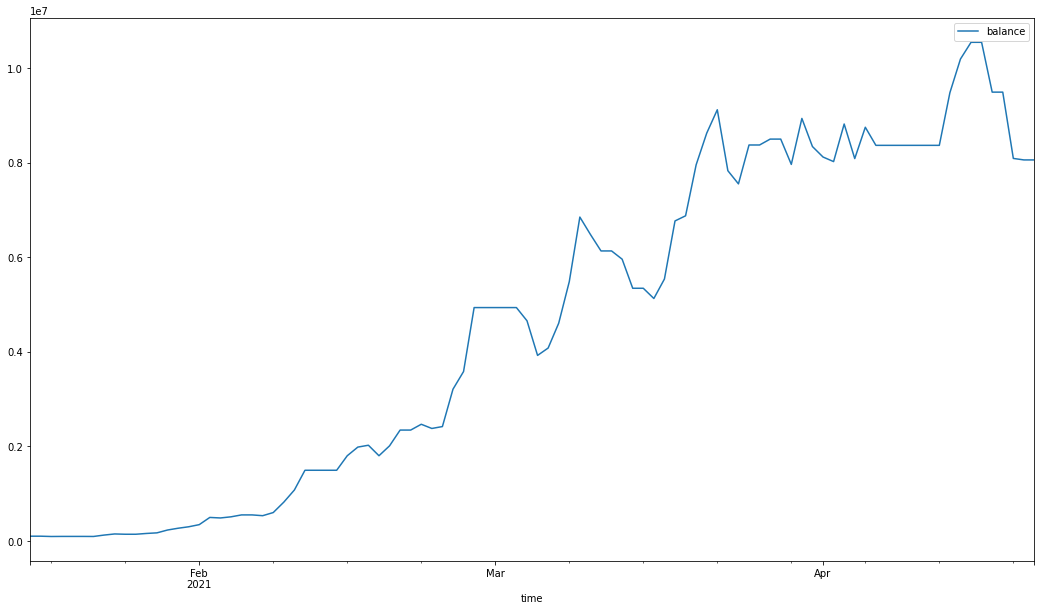

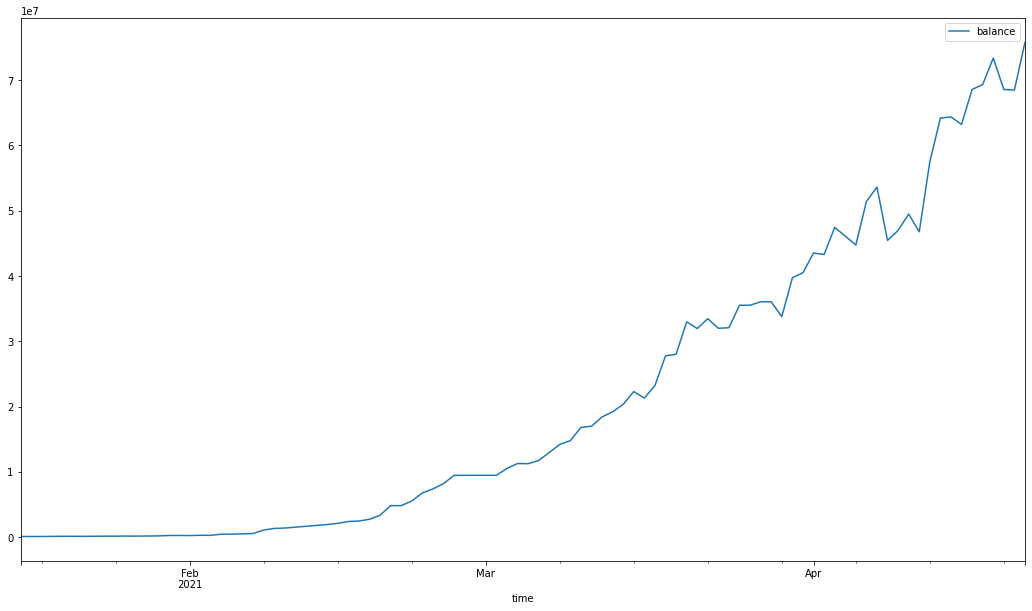

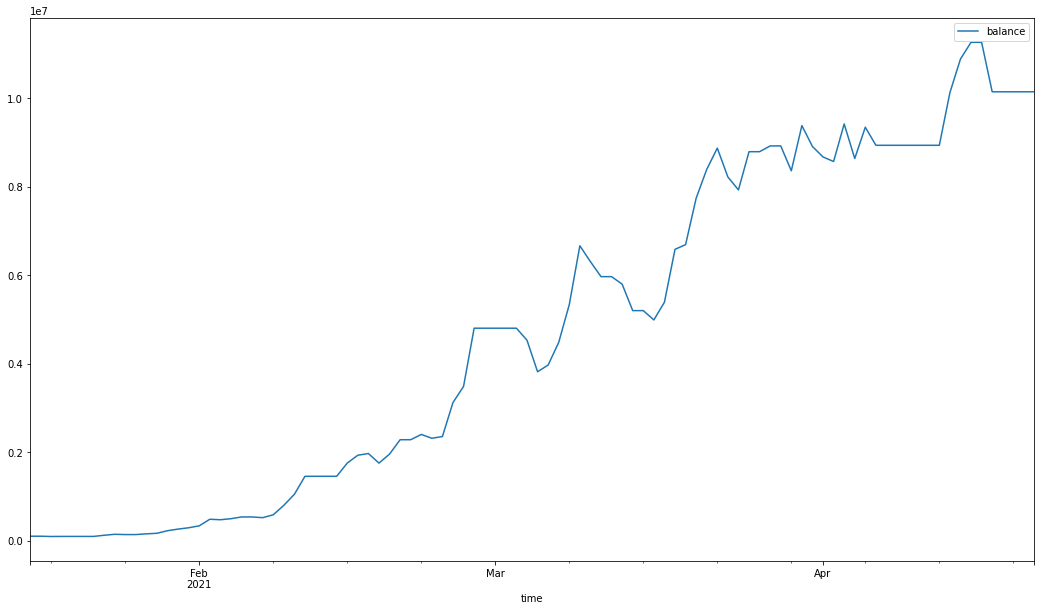

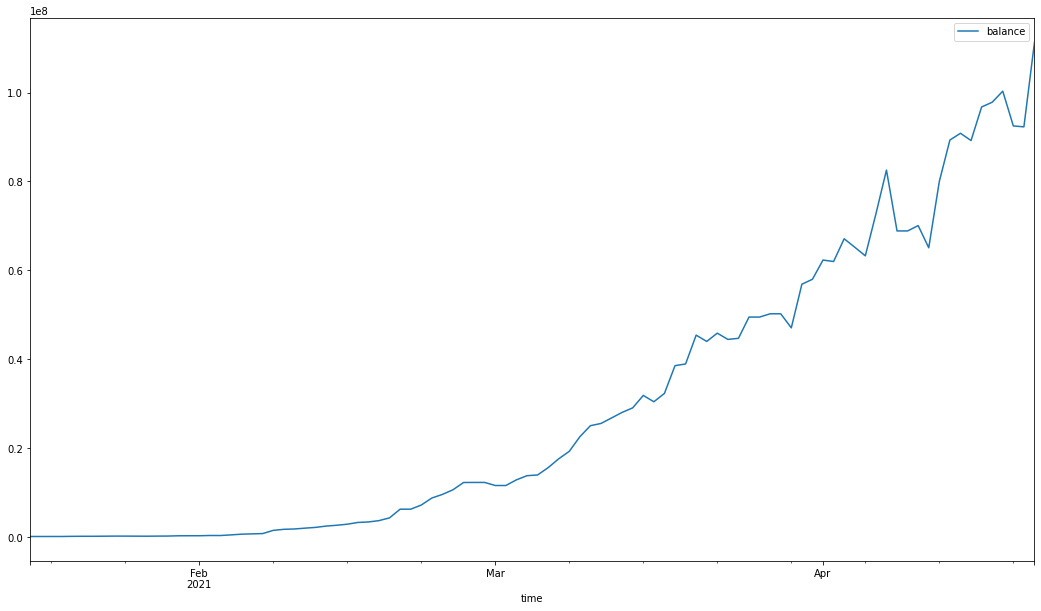

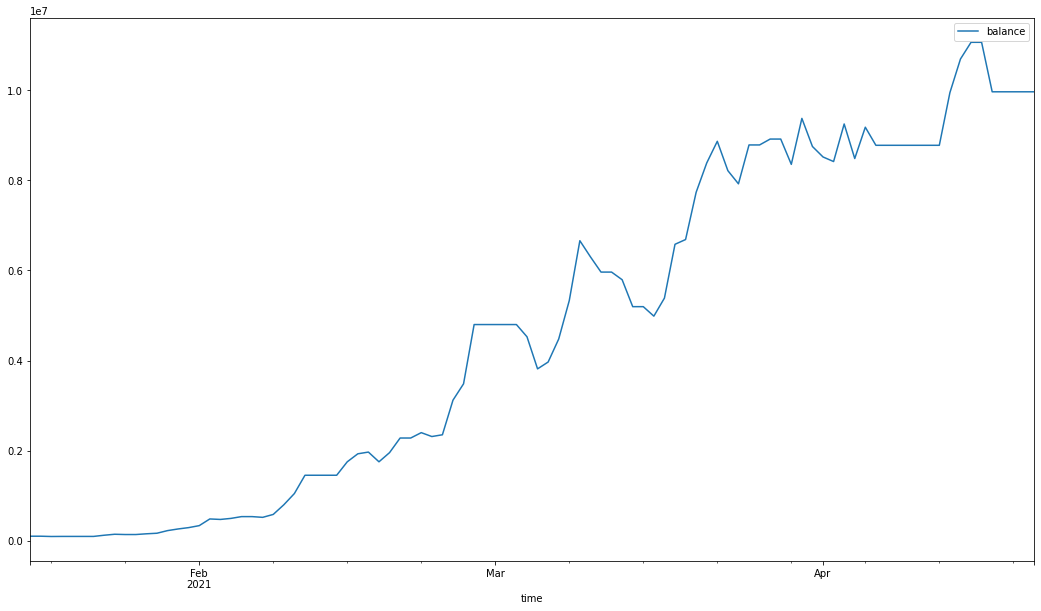

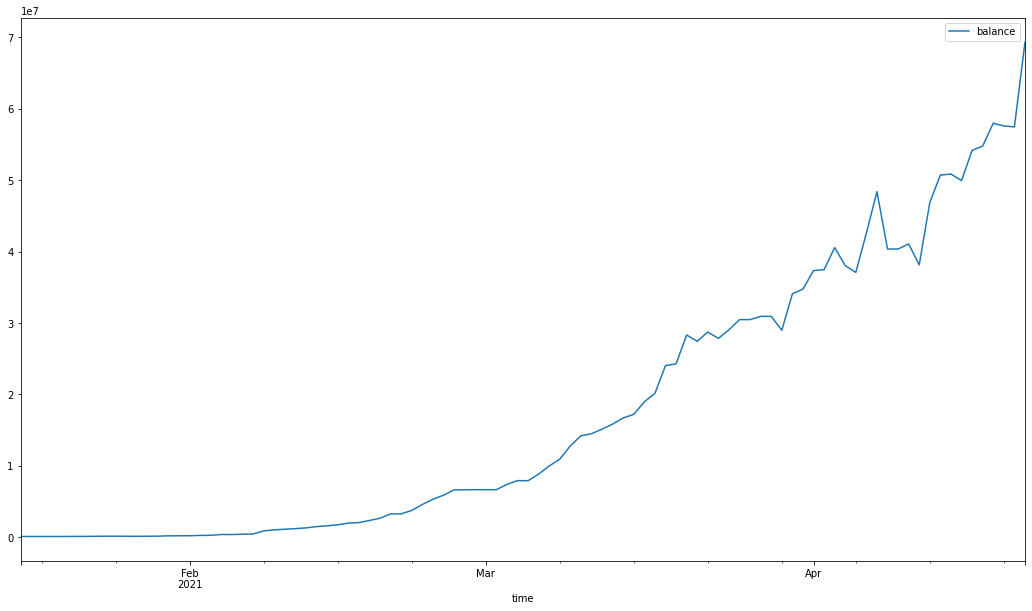

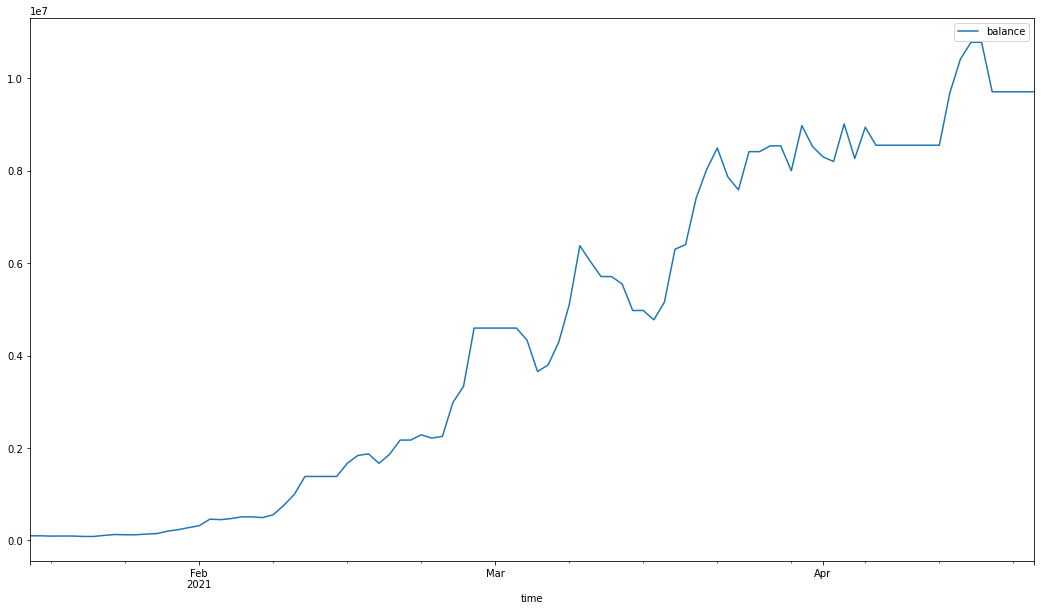

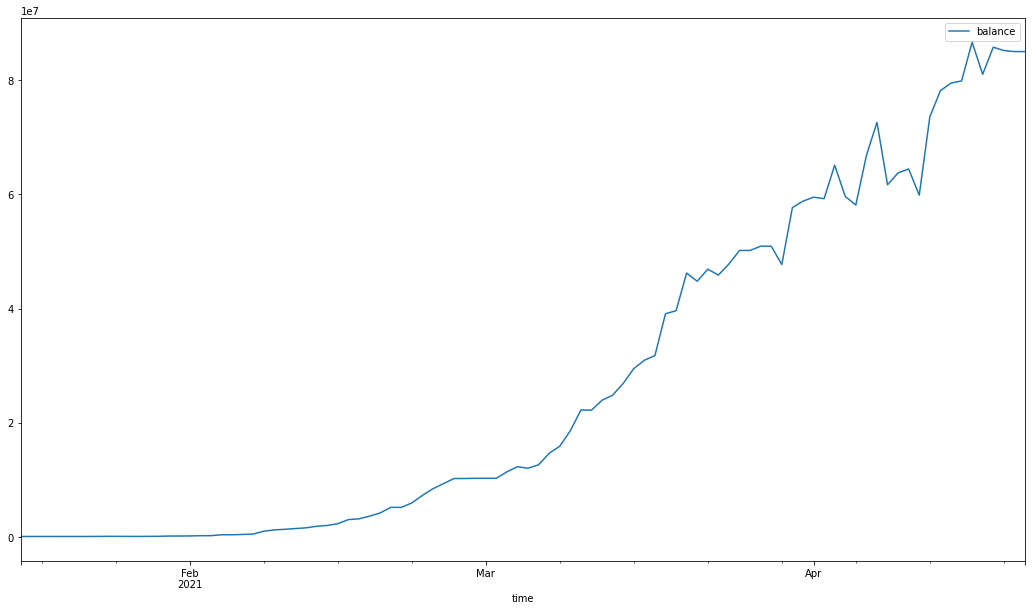

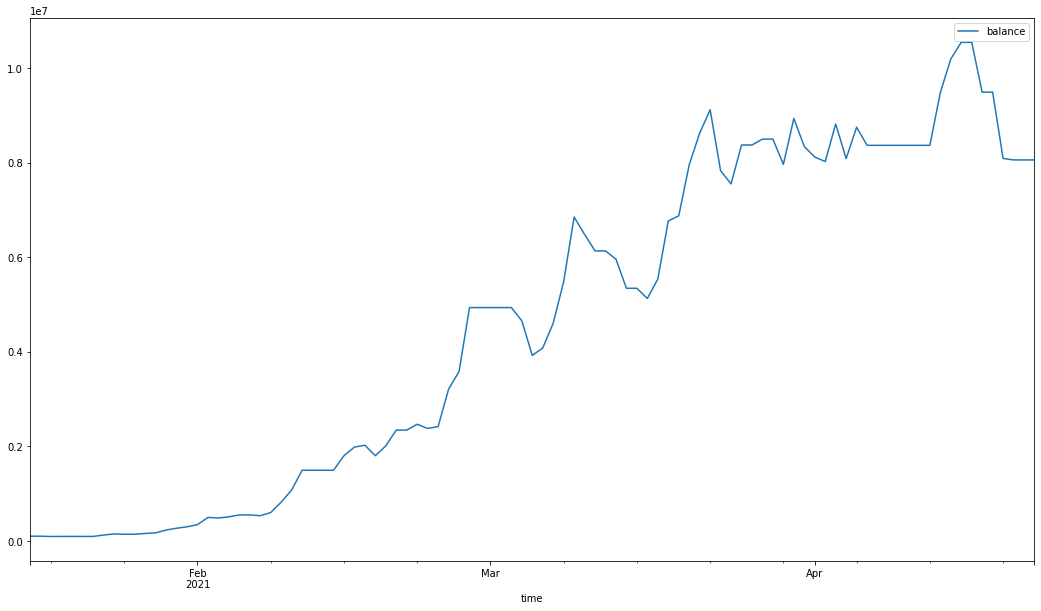

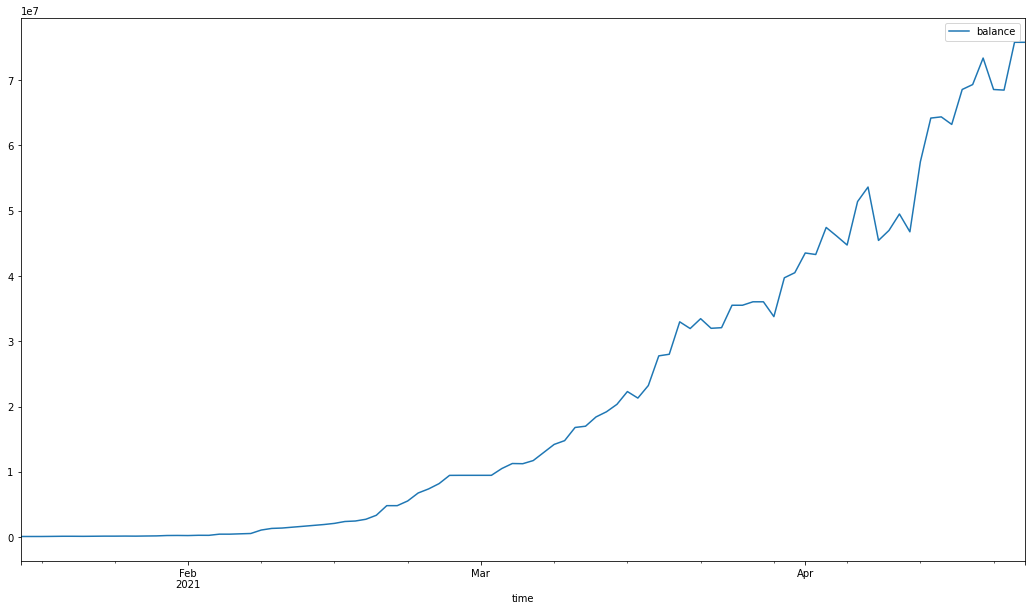

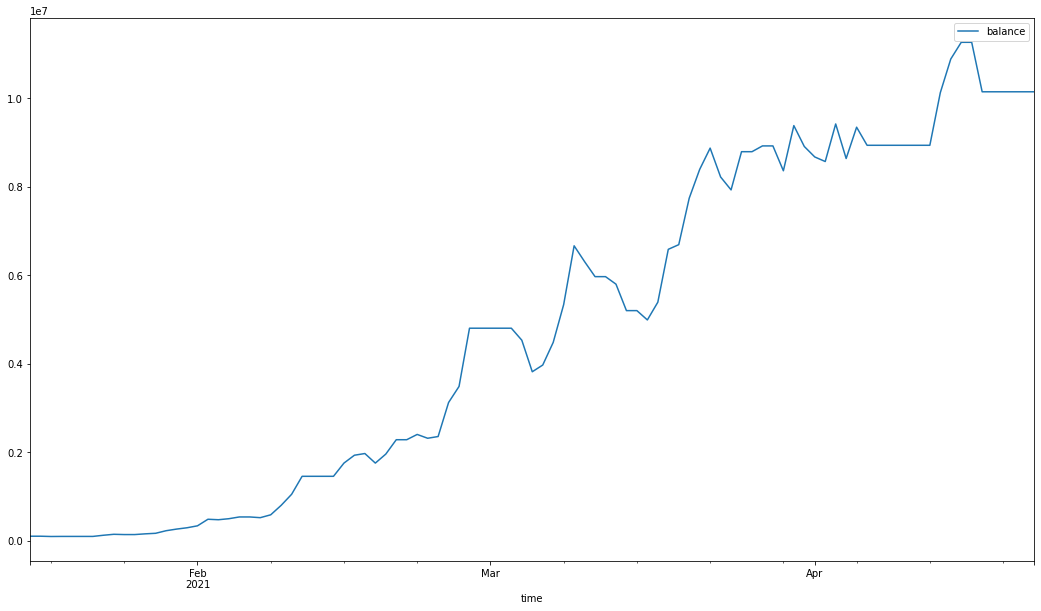

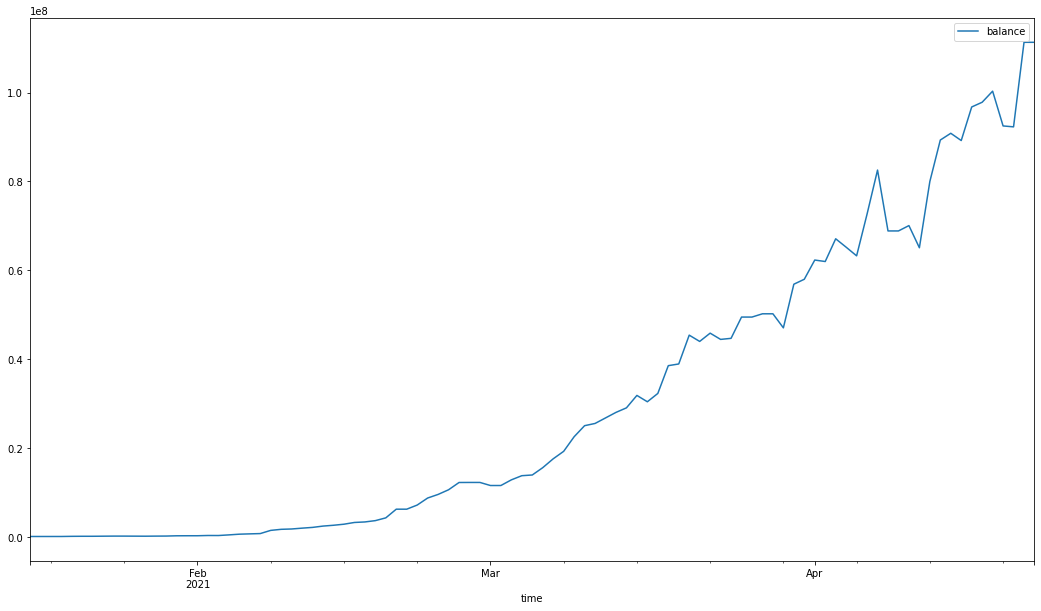

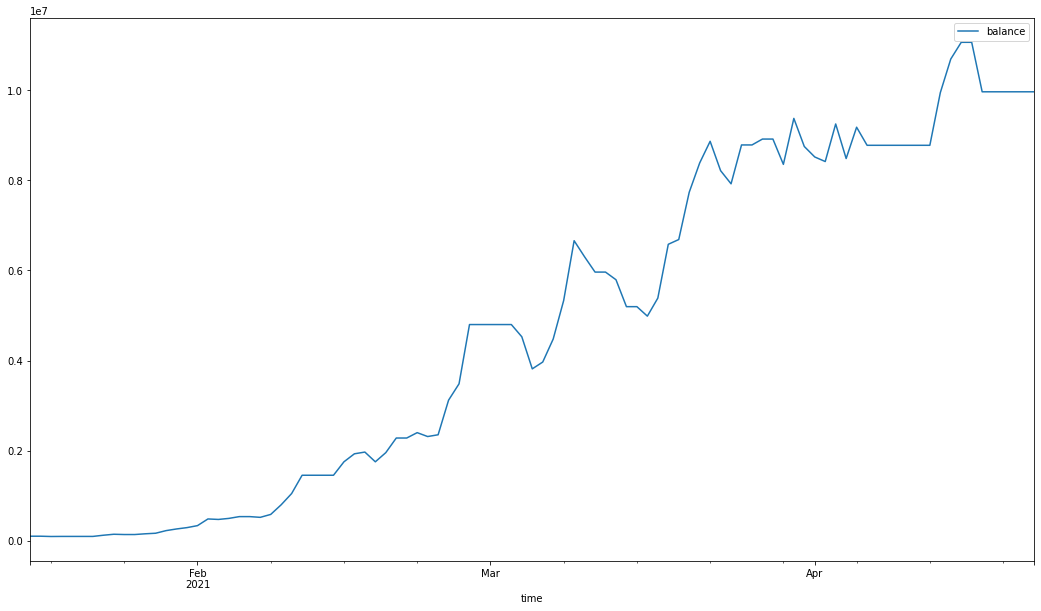

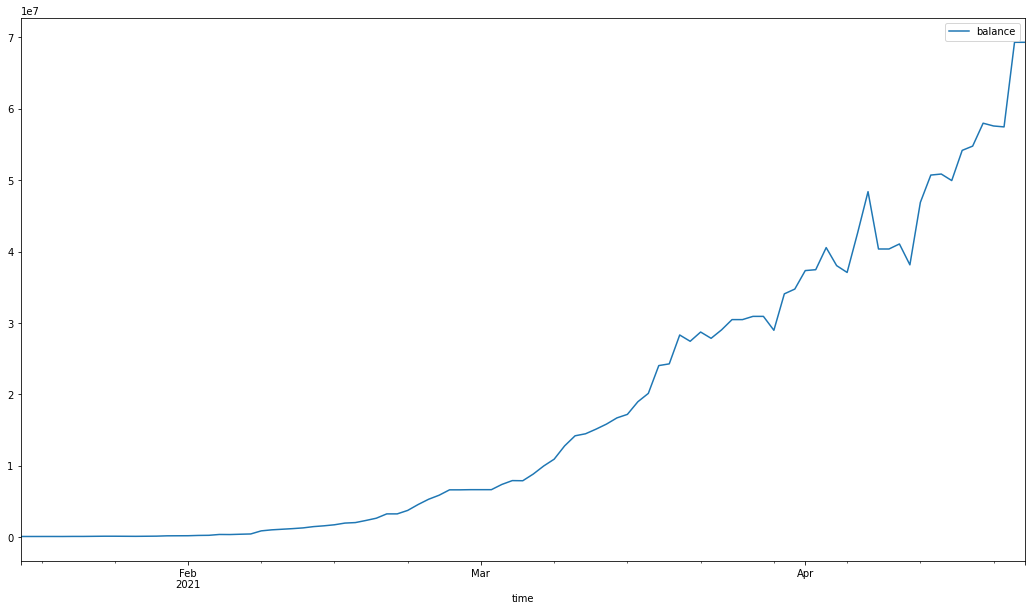

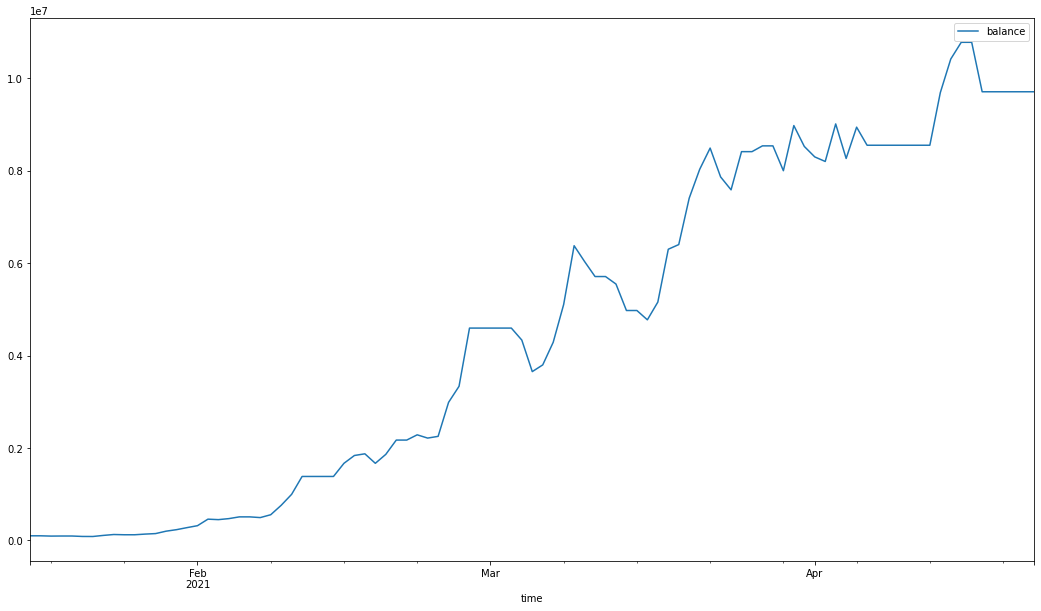

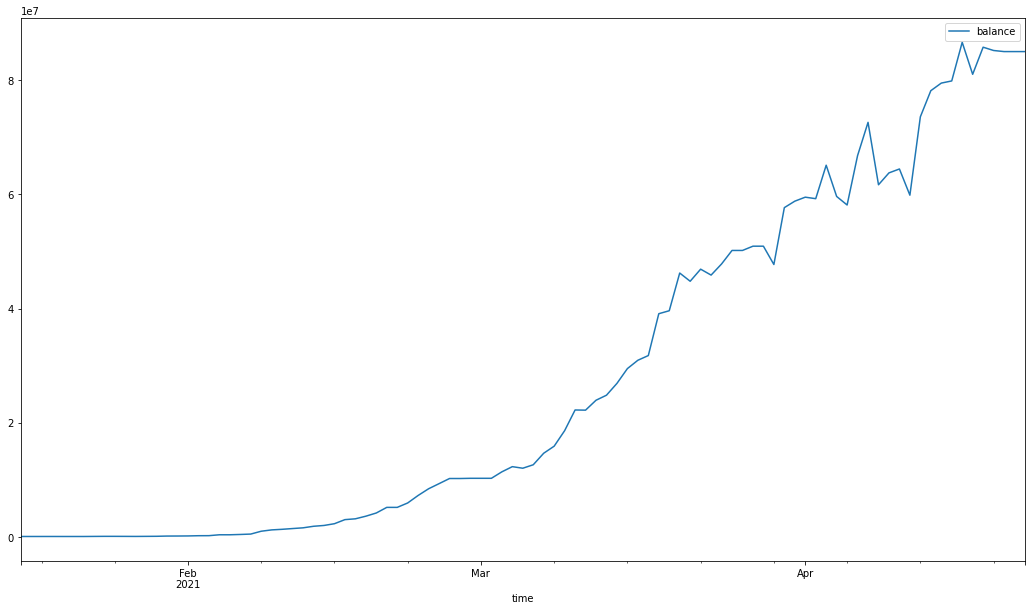

In [70]:
now = datetime.now()
start_date =  datetime(now.year, now.month, now.day - 8)
while start_date < now:
    tmp_df = tmp[tmp['date'] < start_date].copy()
    generate_defi_neg_div_score(tmp_df, start_date)
    start_date = datetime(start_date.year, start_date.month, start_date.day + 1)

In [71]:
neg_div_score_df = pd.read_sql_query('select * from defi_neg_div_score', __connect__())
neg_div_score_df['timestamp_dt'] = pd.to_datetime(neg_div_score_df['timestamp_dt'])
if 'price' in neg_div_score_df.columns:
    del neg_div_score_df['price']
neg_div_score_df

,timestamp_dt,symbol,name,3_Day_LB,5_Day_LB
0,2021-04-13,BAKE,BakeryToken,1,1
1,2021-04-13,DF,dForce,1,1
2,2021-04-13,NMR,Numeraire,0,1
3,2021-04-14,DFI,DeFiChain,0,0
4,2021-04-14,DOUGH,PieDAO DOUGH v2,1,1
5,2021-04-14,KP3R,Keep3rV1,1,1
6,2021-04-14,MARK,Benchmark Protocol,1,1
7,2021-04-14,NXM,NXM,0,0
8,2021-04-14,UQC,Uquid Coin,1,1
9,2021-04-15,AVAX,Avalanche,1,1


In [72]:
tmp_df_2 = pd.merge(tmp, neg_div_score_df, how = 'left', left_on=['date', 'Symbol', 'Name'], right_on = ['timestamp_dt','symbol','name'])
del tmp_df_2['symbol']
del tmp_df_2['name']
del tmp_df_2['timestamp_dt']

In [73]:
tmp_df_2

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,sidechain,solana-ecosystem,stablecoin,stablecoin-algorithmically-stabilized,staking,tron,yield-aggregator,yield-farming,3_Day_LB,5_Day_LB
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,,,,,,,,1,NaN,NaN
1,2020-12-21,5747.0,mStable USD,MUSD,0.994678,2.666081e+07,5.591558e+05,2.680346e+07,NaN,2.680346e+07,...,,,1,,,,,,NaN,NaN
2,2020-12-21,4172.0,Terra,LUNA,0.469171,1.799324e+08,2.403393e+07,3.835109e+08,NaN,9.951619e+08,...,,1,,1,,,,,NaN,NaN
3,2020-12-21,5566.0,Keep Network,KEEP,0.216681,9.678125e+07,1.328025e+06,4.466534e+08,1.000000e+09,9.998488e+08,...,,,,,,,,,NaN,NaN
4,2020-12-21,5488.0,JUST,JST,0.025701,5.809300e+07,6.149887e+07,2.260327e+09,9.900000e+09,9.900000e+09,...,,,,,,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,2021-04-22,9025.0,Tribe,TRIBE,1.342780,3.334987e+08,1.784841e+07,2.483644e+08,1.000000e+09,1.000000e+09,...,,,,,,,,,NaN,NaN
18935,2021-04-22,8104.0,1inch,1INCH,4.600837,7.208205e+08,1.915656e+08,1.566716e+08,NaN,1.500000e+09,...,,,,,,,,,NaN,NaN
18936,2021-04-22,4134.0,Akropolis,AKRO,0.043682,1.216256e+08,3.517399e+07,2.784328e+09,NaN,4.000000e+09,...,,,,,,,1,,NaN,NaN
18937,2021-04-22,6938.0,YFDAI.FINANCE,YF-DAI,3718.987322,1.482388e+07,4.575519e+06,3.986000e+03,2.100000e+04,2.100000e+04,...,,,,,,,,1,NaN,NaN


In [74]:
tmp_df_2.to_csv('master_data_ratios_and_percentages.csv')

In [75]:
tmp_df_2[tmp_df_2['5_Day_LB'] > 0]

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,sidechain,solana-ecosystem,stablecoin,stablecoin-algorithmically-stabilized,staking,tron,yield-aggregator,yield-farming,3_Day_LB,5_Day_LB
17340,2021-04-13,4758.0,dForce,DF,0.455109,5.223416e+07,1.346859e+07,1.147730e+08,NaN,9.999513e+08,...,,,,,,,,,1.0,1.0
17390,2021-04-13,1732.0,Numeraire,NMR,72.917550,3.581351e+08,2.403195e+07,4.911507e+06,1.100000e+07,1.097259e+07,...,,,,,,,,,0.0,1.0
17395,2021-04-13,7064.0,BakeryToken,BAKE,1.796959,3.357618e+08,5.699624e+07,1.868500e+08,2.772374e+08,2.772374e+08,...,,,,,,,,,1.0,1.0
17465,2021-04-14,7284.0,PieDAO DOUGH v2,DOUGH,1.953556,1.327503e+07,1.802418e+06,6.795315e+06,NaN,7.672901e+07,...,,,,,,,,1,1.0,1.0
17489,2021-04-14,2273.0,Uquid Coin,UQC,25.382141,2.538214e+08,2.966689e+07,1.000000e+07,NaN,4.000000e+07,...,,,,,,,,,1.0,1.0
17521,2021-04-14,7535.0,Keep3rV1,KP3R,254.861064,5.097247e+07,9.393936e+06,2.000010e+05,2.016430e+05,2.000010e+05,...,,,,,,,,,1.0,1.0
17523,2021-04-14,7765.0,Benchmark Protocol,MARK,1.285592,2.996524e+07,8.783568e+05,2.330851e+07,NaN,9.383790e+07,...,,,,,,,,1,1.0,1.0
17630,2021-04-15,7486.0,Rari Governance Token,RGT,26.213418,2.285730e+08,6.652944e+06,8.719693e+06,NaN,1.000000e+07,...,,,,,,,1,1,1.0,1.0
17632,2021-04-15,4157.0,THORChain,RUNE,14.605473,3.390745e+09,2.114024e+08,2.321558e+08,NaN,5.000000e+08,...,,,,,,,,,1.0,1.0
17643,2021-04-15,5830.0,NXM,NXM,96.362582,6.145036e+08,3.516437e+04,6.376994e+06,NaN,6.924030e+06,...,,,,,,,,,1.0,1.0


In [76]:
tmp.date.max()

Timestamp('2021-04-22 00:00:00')

In [77]:
tmp_df_2[tmp_df_2['Symbol'] == 'AAVE'][['Users life-to-date duneanlytics','date']]

,Users life-to-date duneanlytics,date
0,32549.0,2020-12-21
136,32624.0,2020-12-22
339,32697.0,2020-12-23
382,32781.0,2020-12-24
588,32907.0,2020-12-25
...,...,...
18229,47936.0,2021-04-18
18272,47936.0,2021-04-19
18563,47936.0,2021-04-20
18606,47936.0,2021-04-21


In [78]:
tmp_df_2

,date,Id,Name,Symbol,Price,Marketcap CMC,Volume CMC,Circulating supply CMC,MAX Supply CMC,Total Supply CMC,...,sidechain,solana-ecosystem,stablecoin,stablecoin-algorithmically-stabilized,staking,tron,yield-aggregator,yield-farming,3_Day_LB,5_Day_LB
0,2020-12-21,7278.0,Aave,AAVE,81.311937,9.757233e+08,2.154891e+08,1.199975e+07,1.600000e+07,1.600000e+07,...,,,,,,,,1,NaN,NaN
1,2020-12-21,5747.0,mStable USD,MUSD,0.994678,2.666081e+07,5.591558e+05,2.680346e+07,NaN,2.680346e+07,...,,,1,,,,,,NaN,NaN
2,2020-12-21,4172.0,Terra,LUNA,0.469171,1.799324e+08,2.403393e+07,3.835109e+08,NaN,9.951619e+08,...,,1,,1,,,,,NaN,NaN
3,2020-12-21,5566.0,Keep Network,KEEP,0.216681,9.678125e+07,1.328025e+06,4.466534e+08,1.000000e+09,9.998488e+08,...,,,,,,,,,NaN,NaN
4,2020-12-21,5488.0,JUST,JST,0.025701,5.809300e+07,6.149887e+07,2.260327e+09,9.900000e+09,9.900000e+09,...,,,,,,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,2021-04-22,9025.0,Tribe,TRIBE,1.342780,3.334987e+08,1.784841e+07,2.483644e+08,1.000000e+09,1.000000e+09,...,,,,,,,,,NaN,NaN
18935,2021-04-22,8104.0,1inch,1INCH,4.600837,7.208205e+08,1.915656e+08,1.566716e+08,NaN,1.500000e+09,...,,,,,,,,,NaN,NaN
18936,2021-04-22,4134.0,Akropolis,AKRO,0.043682,1.216256e+08,3.517399e+07,2.784328e+09,NaN,4.000000e+09,...,,,,,,,1,,NaN,NaN
18937,2021-04-22,6938.0,YFDAI.FINANCE,YF-DAI,3718.987322,1.482388e+07,4.575519e+06,3.986000e+03,2.100000e+04,2.100000e+04,...,,,,,,,,1,NaN,NaN


In [ ]:
def get_cmc_farming_yeild_data(defi_symbols):
    def get_pair_columns(size):
        columns = ['symbol']
        for i in range(1, size+1):
            columns.extend([f"poolname_{i}", f"tvl_{i}", f"apy_{i}"])
        return columns
    df = pd.read_csv("farming_data_cmc.csv", index_col=0)
    df = df[['pair', 'tvl', 'APY','pool_name']]
    # pairs = df['pair'].values.tolist()
    pair_symbols = []
    for index, row in df.iterrows():
        pair = row['pair']
        name = row['pool_name']
        symbols = pair.split('-')
        if len(symbols) == 2:
            pair_symbols.append([symbols[0], f"{symbols[1]}-{name}##{row['tvl']}##{row['APY']}"])
            pair_symbols.append([symbols[1], f"{symbols[0]}-{name}##{row['tvl']}##{row['APY']}"])
        elif len(symbols) == 1:
            pair_symbols.append([symbols[0], f"{symbols[0]}-{name}##{row['tvl']}##{row['APY']}"])
    pair_df = pd.DataFrame(pair_symbols, columns=['symbol', 'data'])
    grouped_df = pair_df.groupby(['symbol'])['data'].apply(lambda x: '$$'.join(x)).reset_index()
    max_pair_data = 0
    all_pairs_details = []
    for index, row in grouped_df.iterrows():
        symbol = row['symbol']
        if symbol not in defi_symbols:
            continue
        pair_data = row['data'].split("$$")
        if len(pair_data) > max_pair_data:
            max_pair_data = len(pair_data)
        print(symbol, max_pair_data, pair_data)
        all_pair_data = [symbol]
        for data in pair_data:
            pair_details = data.split("##")
            all_pair_data.extend(pair_details)
        all_pairs_details.append(all_pair_data)
    if len(all_pairs_details) > 0:
        df = pd.DataFrame(all_pairs_details, columns=get_pair_columns(max_pair_data))
    else:
        df = pd.Dataframe
    return df


defi_symbols = tmp_df_2['Symbol'].unique().tolist()
farming_yeild_df = get_cmc_farming_yeild_data(defi_symbols)
farming_yeild_df['date'] = pd.to_datetime("4/24/2021")

farming_yeild_df

tmp_df_3 = pd.merge(tmp_df_2, farming_yeild_df, how = 'left', left_on=['date','Symbol'], right_on = ['date','symbol'])
del tmp_df_3['symbol']